### Описание проекта  
Мы работаем в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными и изучим общую информацию.

In [1]:
#импортируем библиотеку и откроем файл
import pandas as pd

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://_________/datasets/games.csv')

In [2]:
#посмотрим общую информацию о данных файлах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#посмотрим первые 10 строк данных
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#построим гистограммы, для этого посмотрим какие есть столбцы и какие данные
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

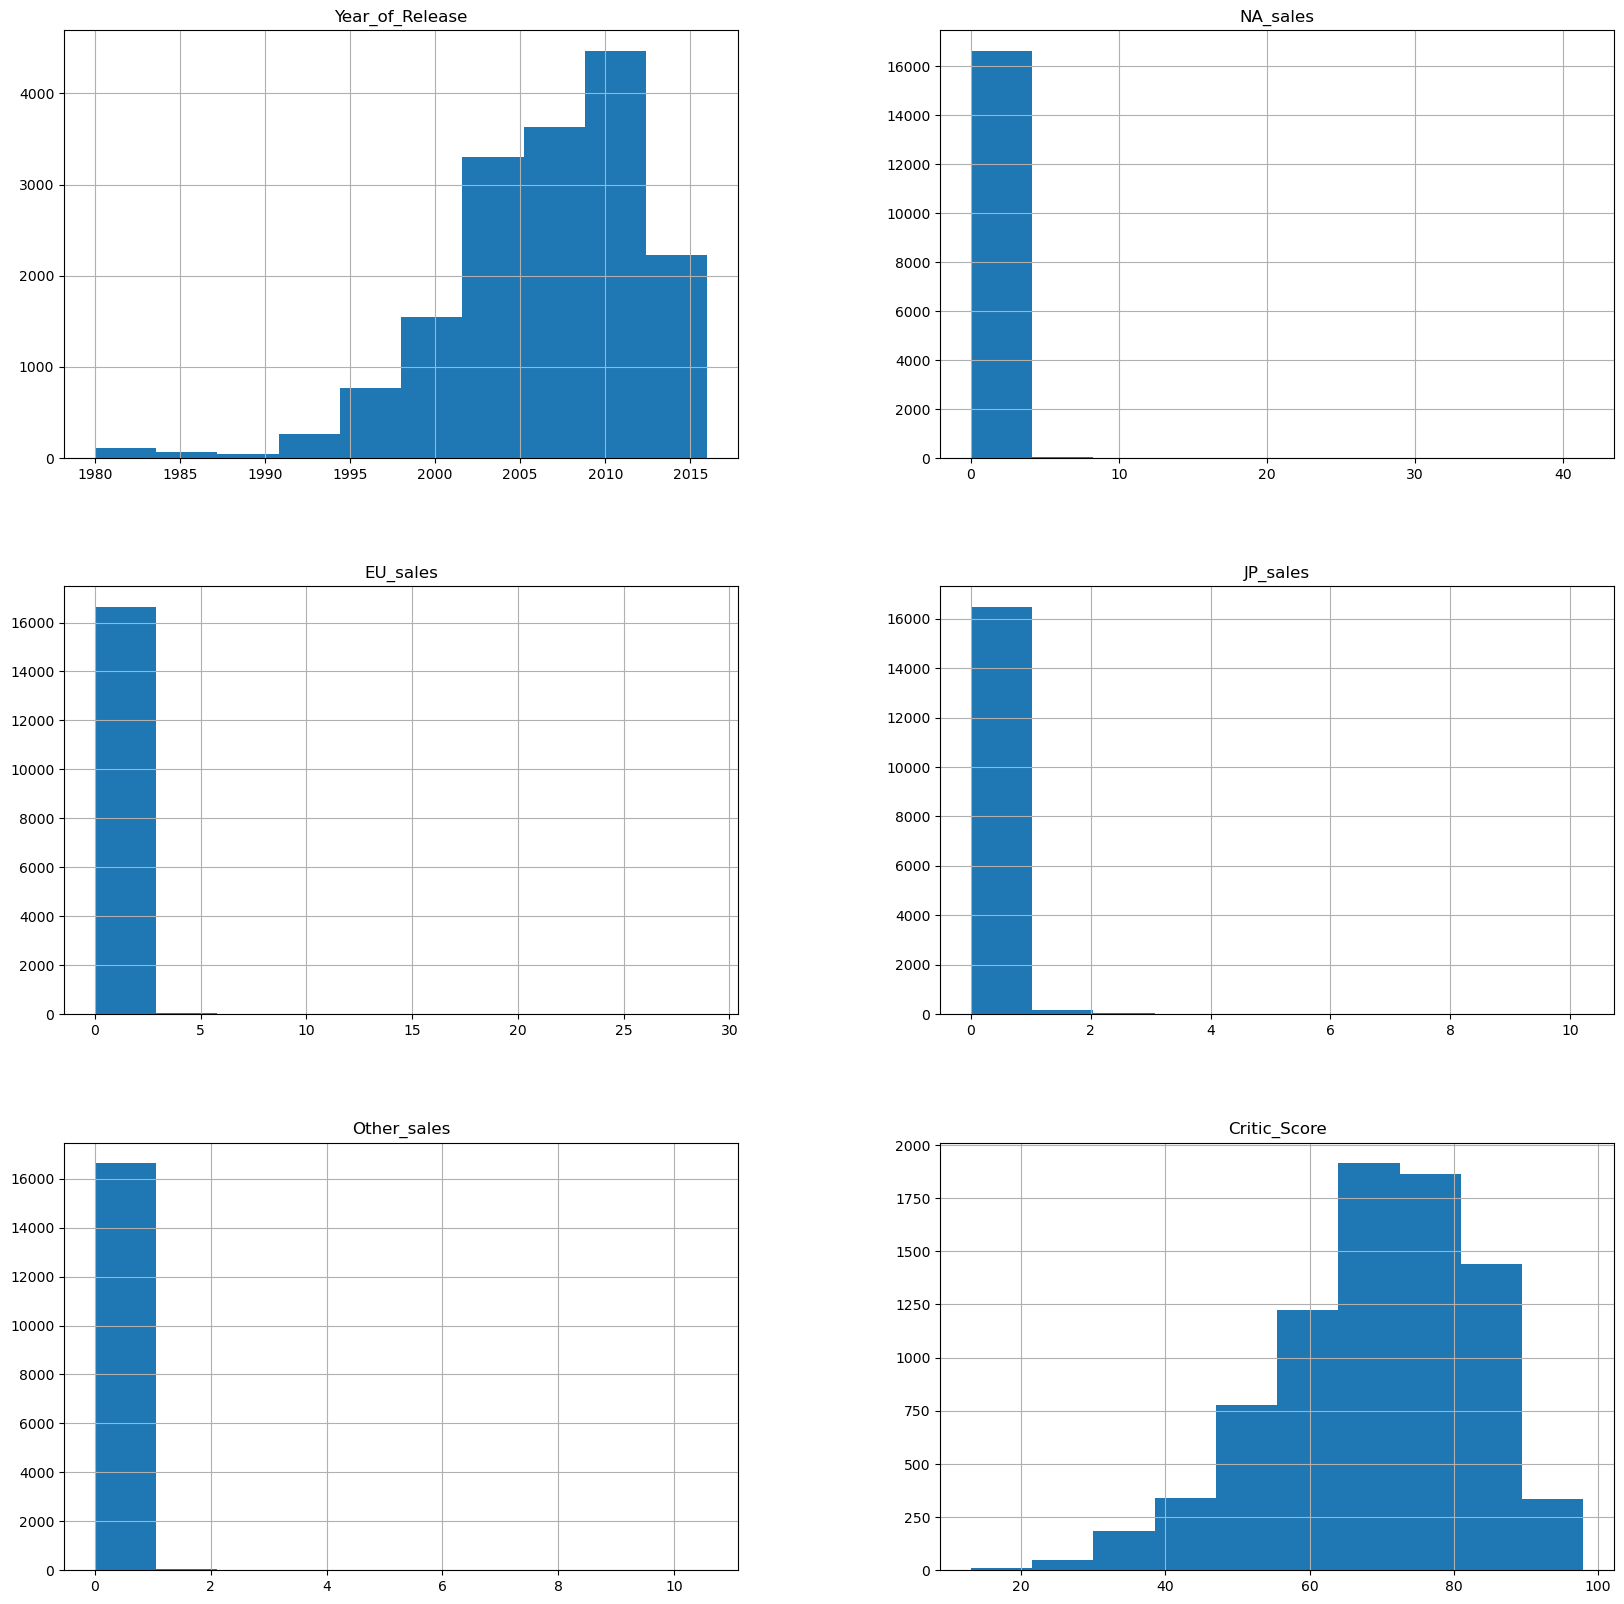

In [5]:
#построим графики для столбцов с числами
data.hist(figsize=(20,20))

In [6]:
#посмотрим пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#в процентах (также можно понять возможность удаления)
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


array([<Axes: ylabel='Platform'>], dtype=object)

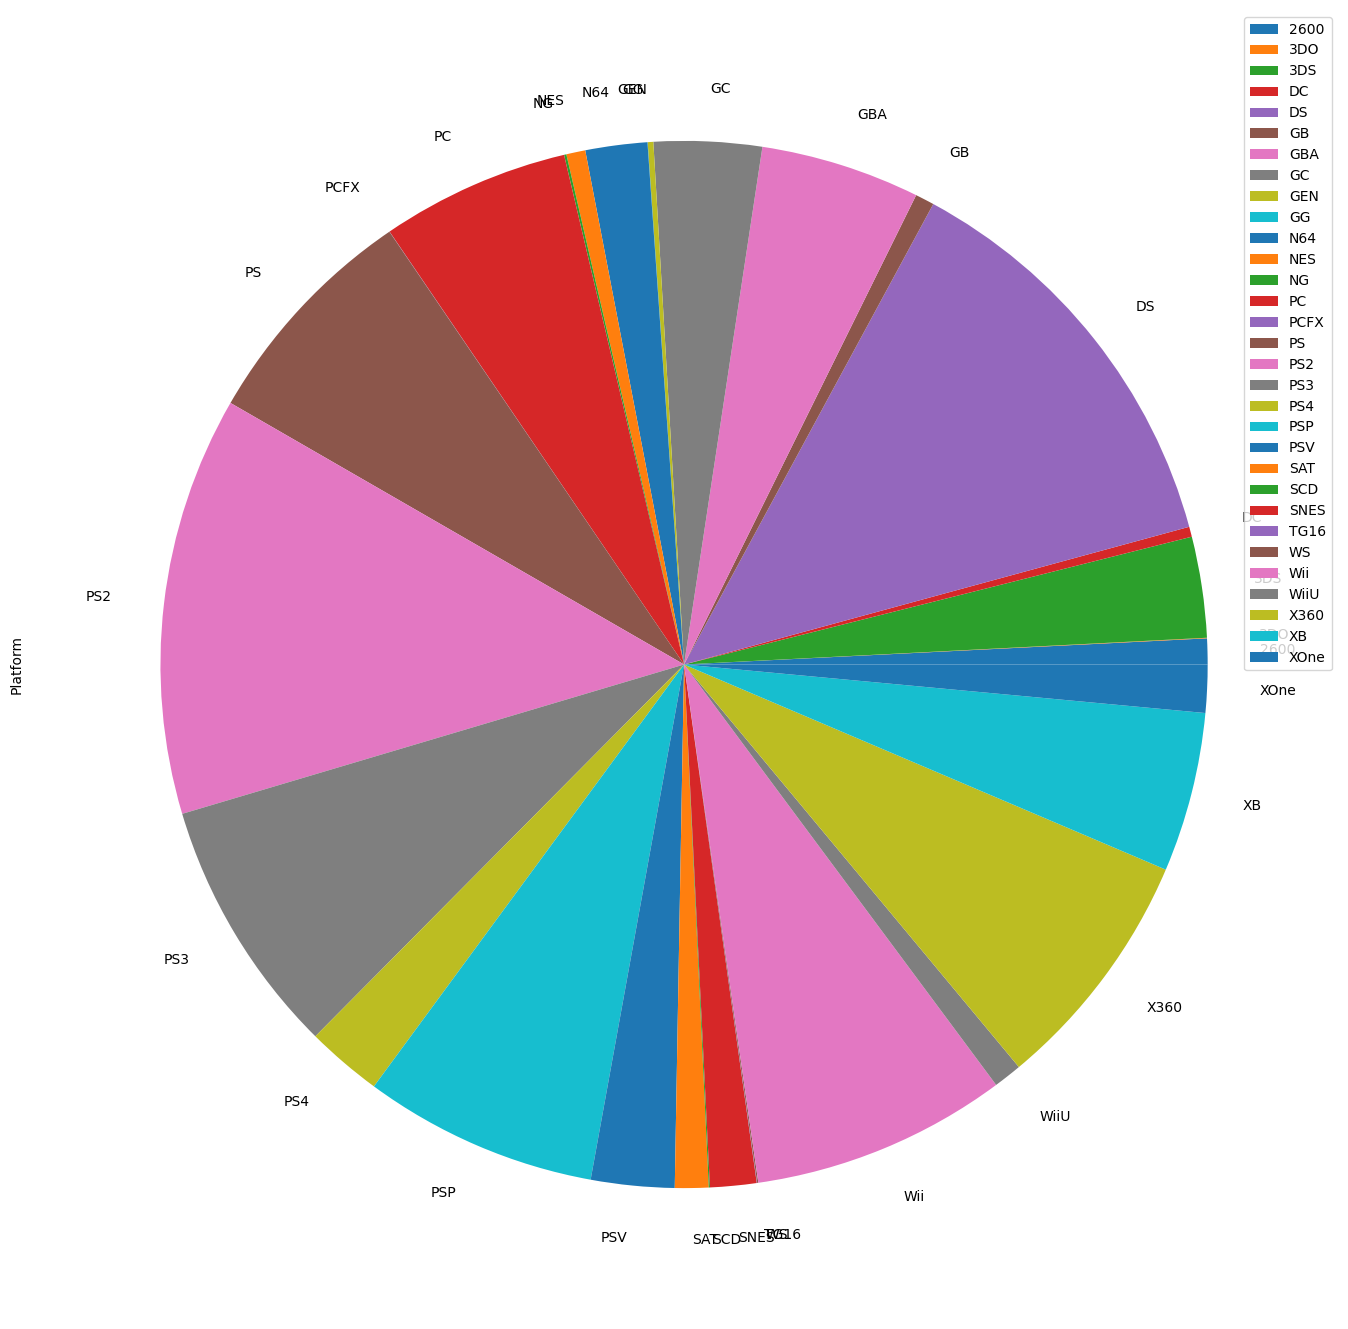

In [8]:
data.groupby('Platform').agg({'Platform':'count'}).plot(kind='pie',subplots=True, figsize=(17,17))

array([<Axes: ylabel='Rating'>], dtype=object)

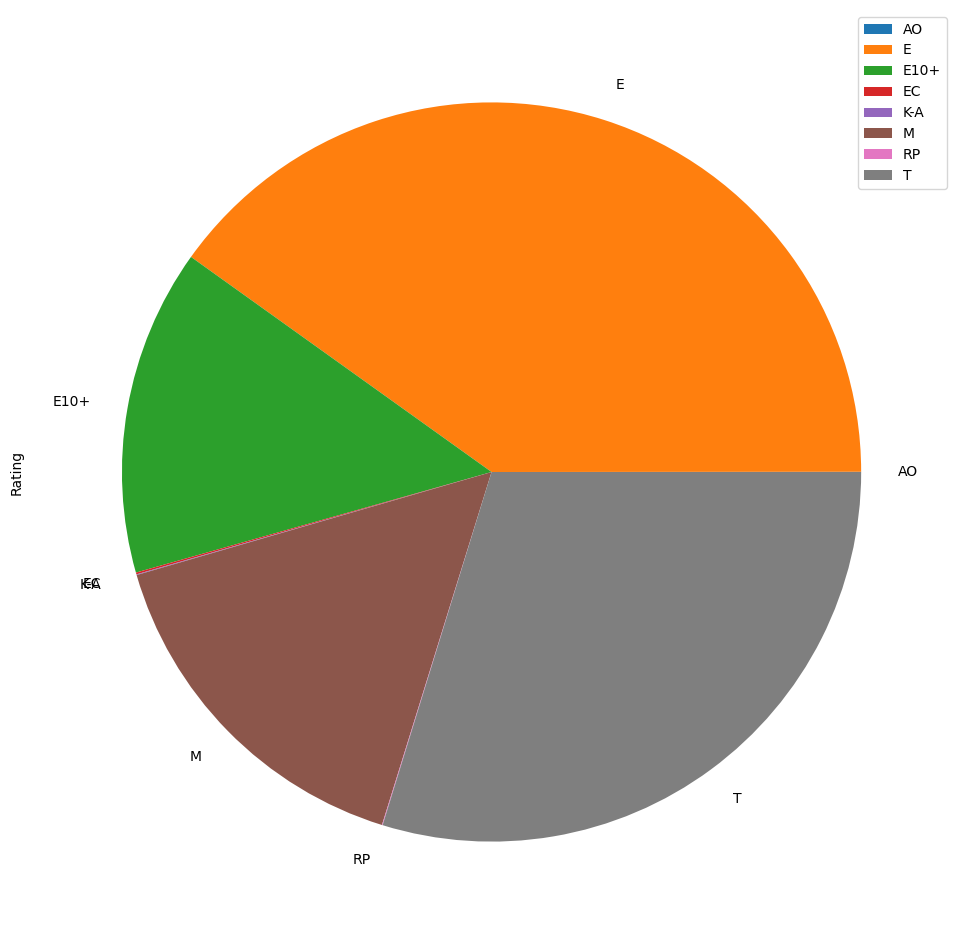

In [9]:
data.groupby('Rating').agg({'Rating':'count'}).plot(kind='pie',subplots=True, figsize=(12,12))

Вывод: посмотрев данные и общую информацию о данных, можно обозначить необходимые действия: 1) нужно привести к нижнему регистру названия столбцов, 2) нужно поработать с пропусками, 3) нужно поработать с типами данных: год привести к целым числам, оценку критиков и пользователей возможно тоже нужно привести к целым числам, сначала посмотрим, какие там есть значения перед принятием решения, 4) данные по годам, для планирования компании 2017 года нужно взять актуальные данные, в таблице есть данные с 1980, предлагаю взять на изучение данные за последние 3 года, 5) гистограмма по оценке пользователей не построилась, так как не числовой тип данных, нужно исправить, посмотрим значения и решим, исправлять на float или int.

### Предобработка данных

In [10]:
# исправим названия столбцов
data.columns = data.columns.str.lower()

In [11]:
# проверяем
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
#пропуски
#годы, учитывая небольшое количество, предлагаю удалить данные
#также поступим с пропусками в наименованиях и в жанре
data = data.dropna(subset=['year_of_release', 'name', 'genre'], axis='rows')

In [13]:
#также исправим тип данных
data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
#заполним пропуски на Unknown, потому что чем-то другим не представляется возможным заменить 
#и удалить в связи с количеством невозможно
#можно было попробовать заменить на RP (рейтинг не определен), 
#но вдруг пропуски связаны не с тем, что рейтинг не определен, а с неправильным переносом данных
data['rating'].fillna('Unknown')

0              E
1        Unknown
2              E
3              E
4        Unknown
          ...   
16710    Unknown
16711    Unknown
16712    Unknown
16713    Unknown
16714    Unknown
Name: rating, Length: 16444, dtype: object

In [15]:
#user_score
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [16]:
#заменим TBD пропусками
import numpy as np

data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan

In [17]:
#проверим изменение
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [18]:
#заменим тип данных на float
data['user_score'] = data['user_score'].astype('float64')

In [19]:
#critic_score
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [20]:
#есть пропуски, не получится заменить на целочисленный тип

In [21]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [22]:
#проверим новый столбец
data['total_sales'].head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

Вывод: провели предобработку данных, заменили типы данных, где нужно, столбцы привели к нижнему регистру, поработали с пропусками. Пропуски могли появиться из-за человеческого фактора, не все данные могли быть внесены, либо из-за технических проблем, при переносе данных не все выгрузилось, не тот формат.

In [23]:
#контрольно проверим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

<Axes: title={'center': 'Количество игр в год'}, xlabel='year_of_release'>

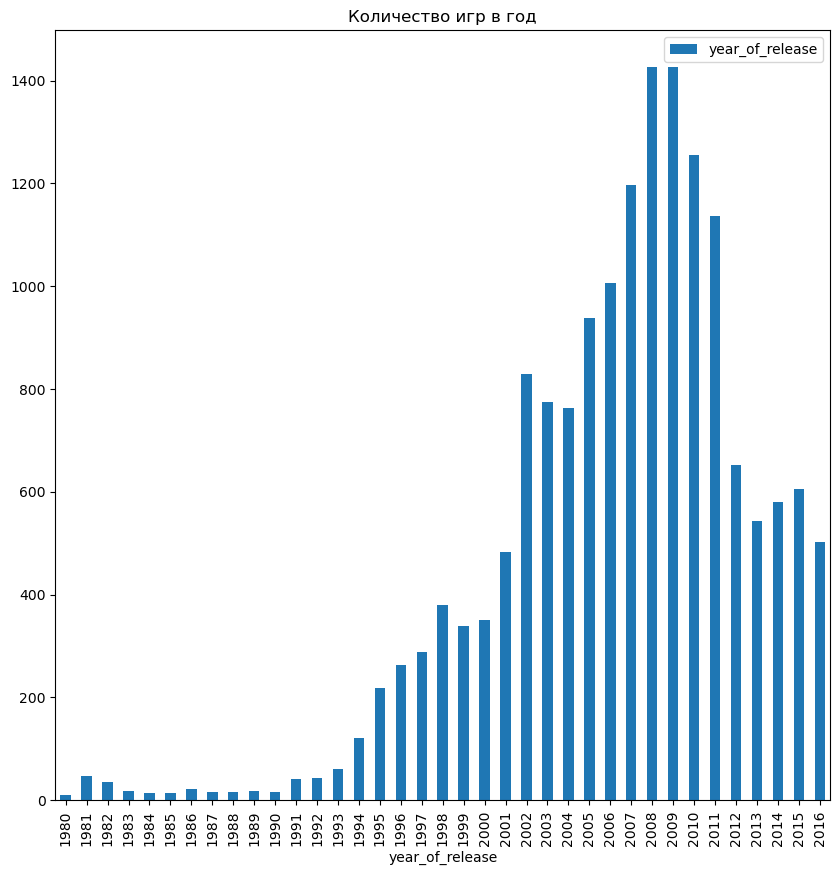

In [24]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
data.groupby('year_of_release').agg({'year_of_release':'count'}).plot(kind='bar', figsize=(10,10), title='Количество игр в год')

Вывод: увеличение по количеству начинается с 2000-х годов, это объяснимо развитием отрасли и технологий, пик приходится на 2008 и 2009 годы. Однако для дальнейших исследований предлагаю брать данные за 3 года, с 2014 года, данные более однородны по количеству.

#Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
#определим пятерку платформ с наибольшим числом продаж
top = data.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5)

In [26]:
top_5 = data.query('platform in @top.index')

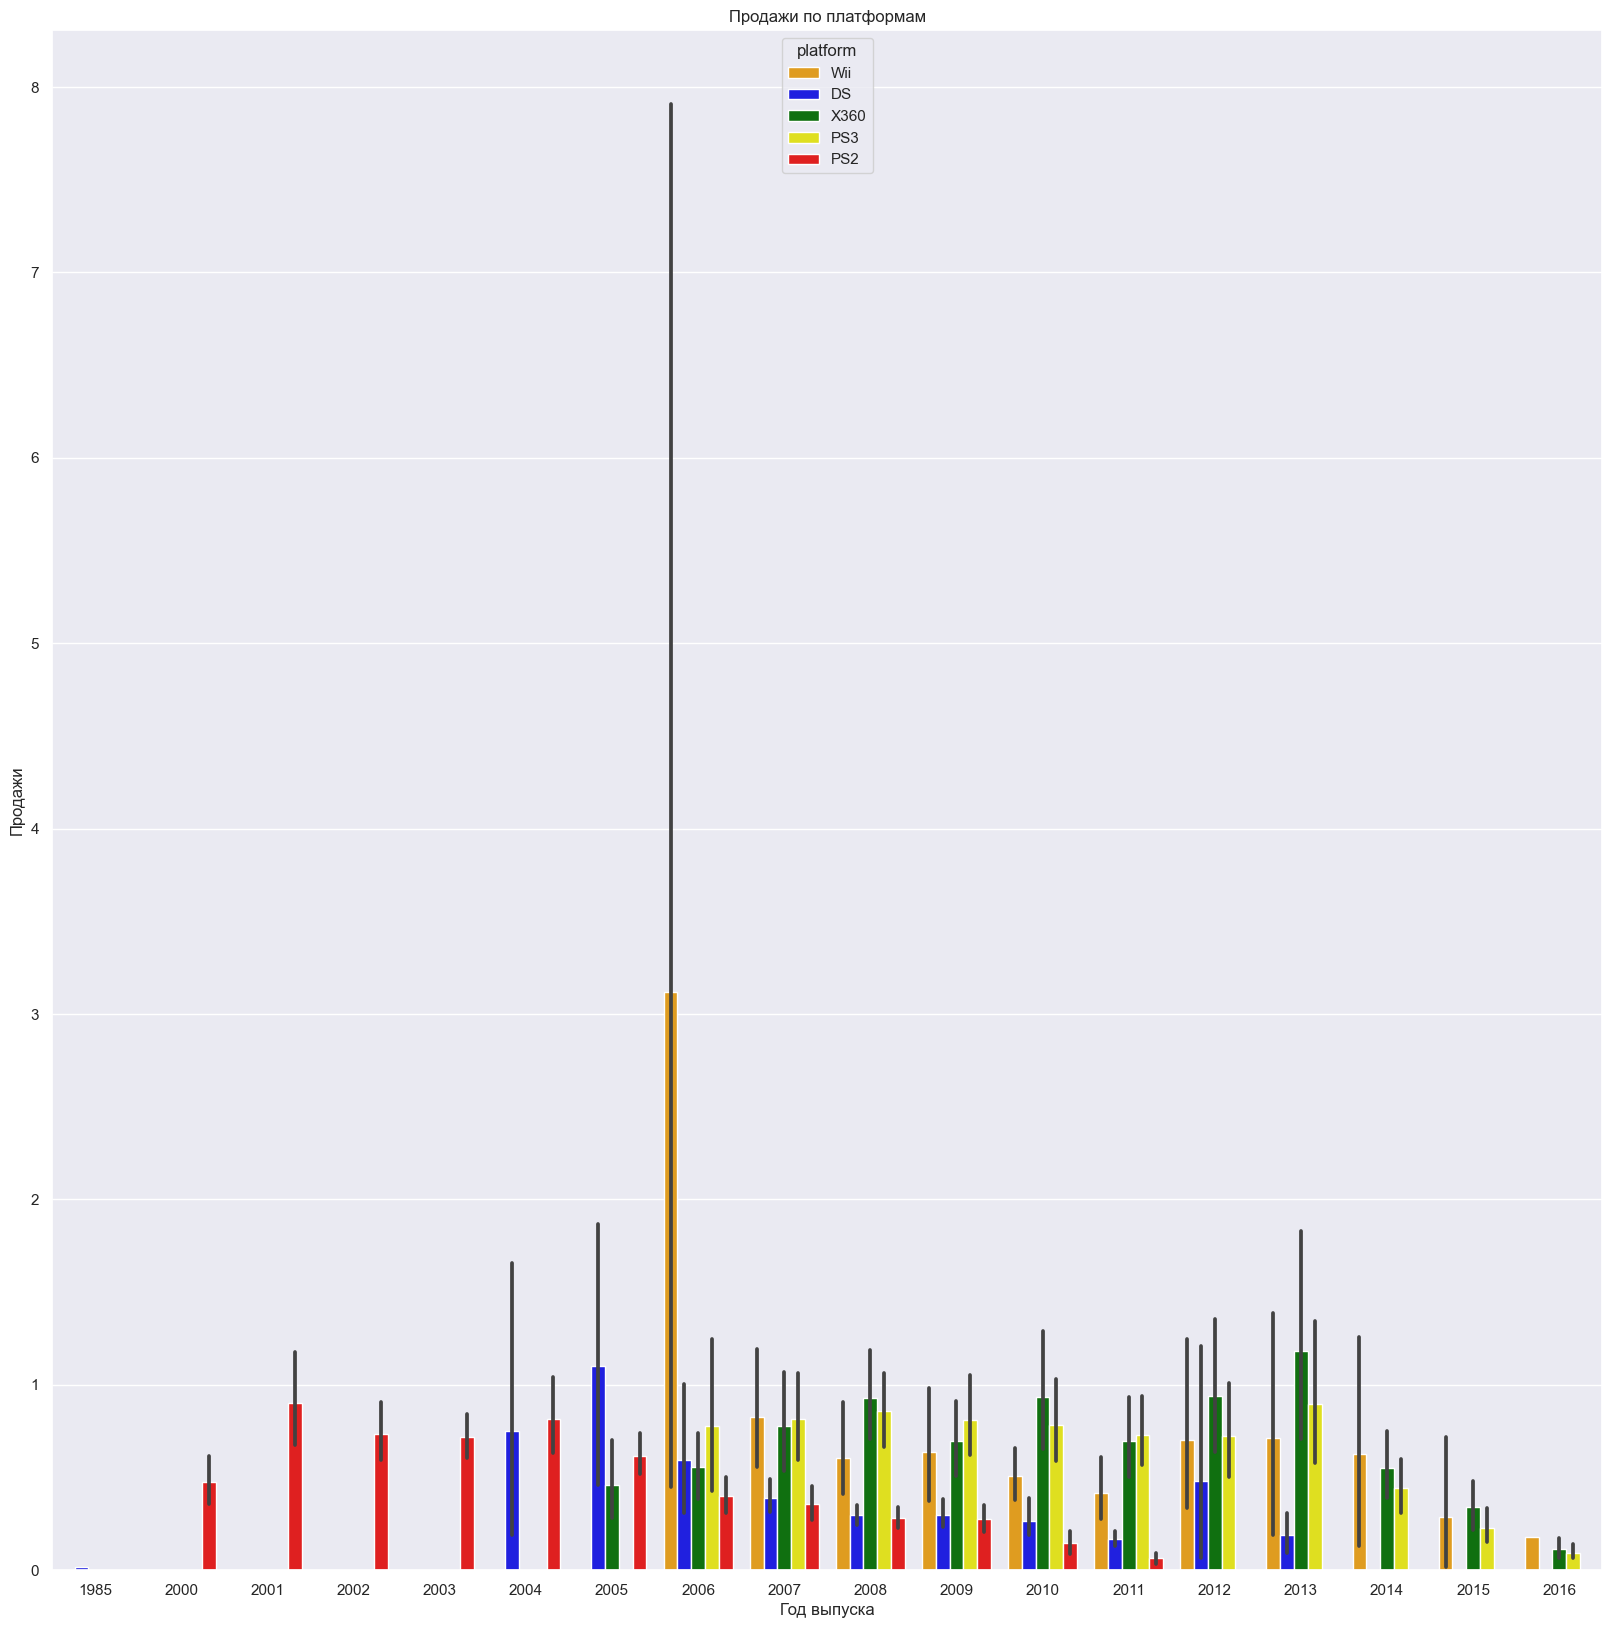

In [27]:
import seaborn as sns

sns.set(rc={"figure.figsize":( 20 , 20 )})

ax = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=top_5,
            palette=['orange', 'blue', 'green', 'yellow', 'red']
)

ax.set_title('Продажи по платформам')
ax.set(xlabel='Год выпуска', ylabel='Продажи');

Вывод: мы выбрали топ 5 платформ с наибольшими суммарными продажами, далее был построено распределение по годам. Срок продаж платформы примерно 9-10 лет, каждые 5 лет проиходят изменения, уходят какие-то платформы, появляются новые, самые пиковые продажи во 1,2-3 год появления платформы.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [28]:
#выделим данные, которые будет изучать, берем три года
data_actual = data.query('year_of_release >= 2014').reset_index()
data_actual.head(5)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<Axes: title={'center': 'Продажи по платформам за 3 года'}, xlabel='platform'>

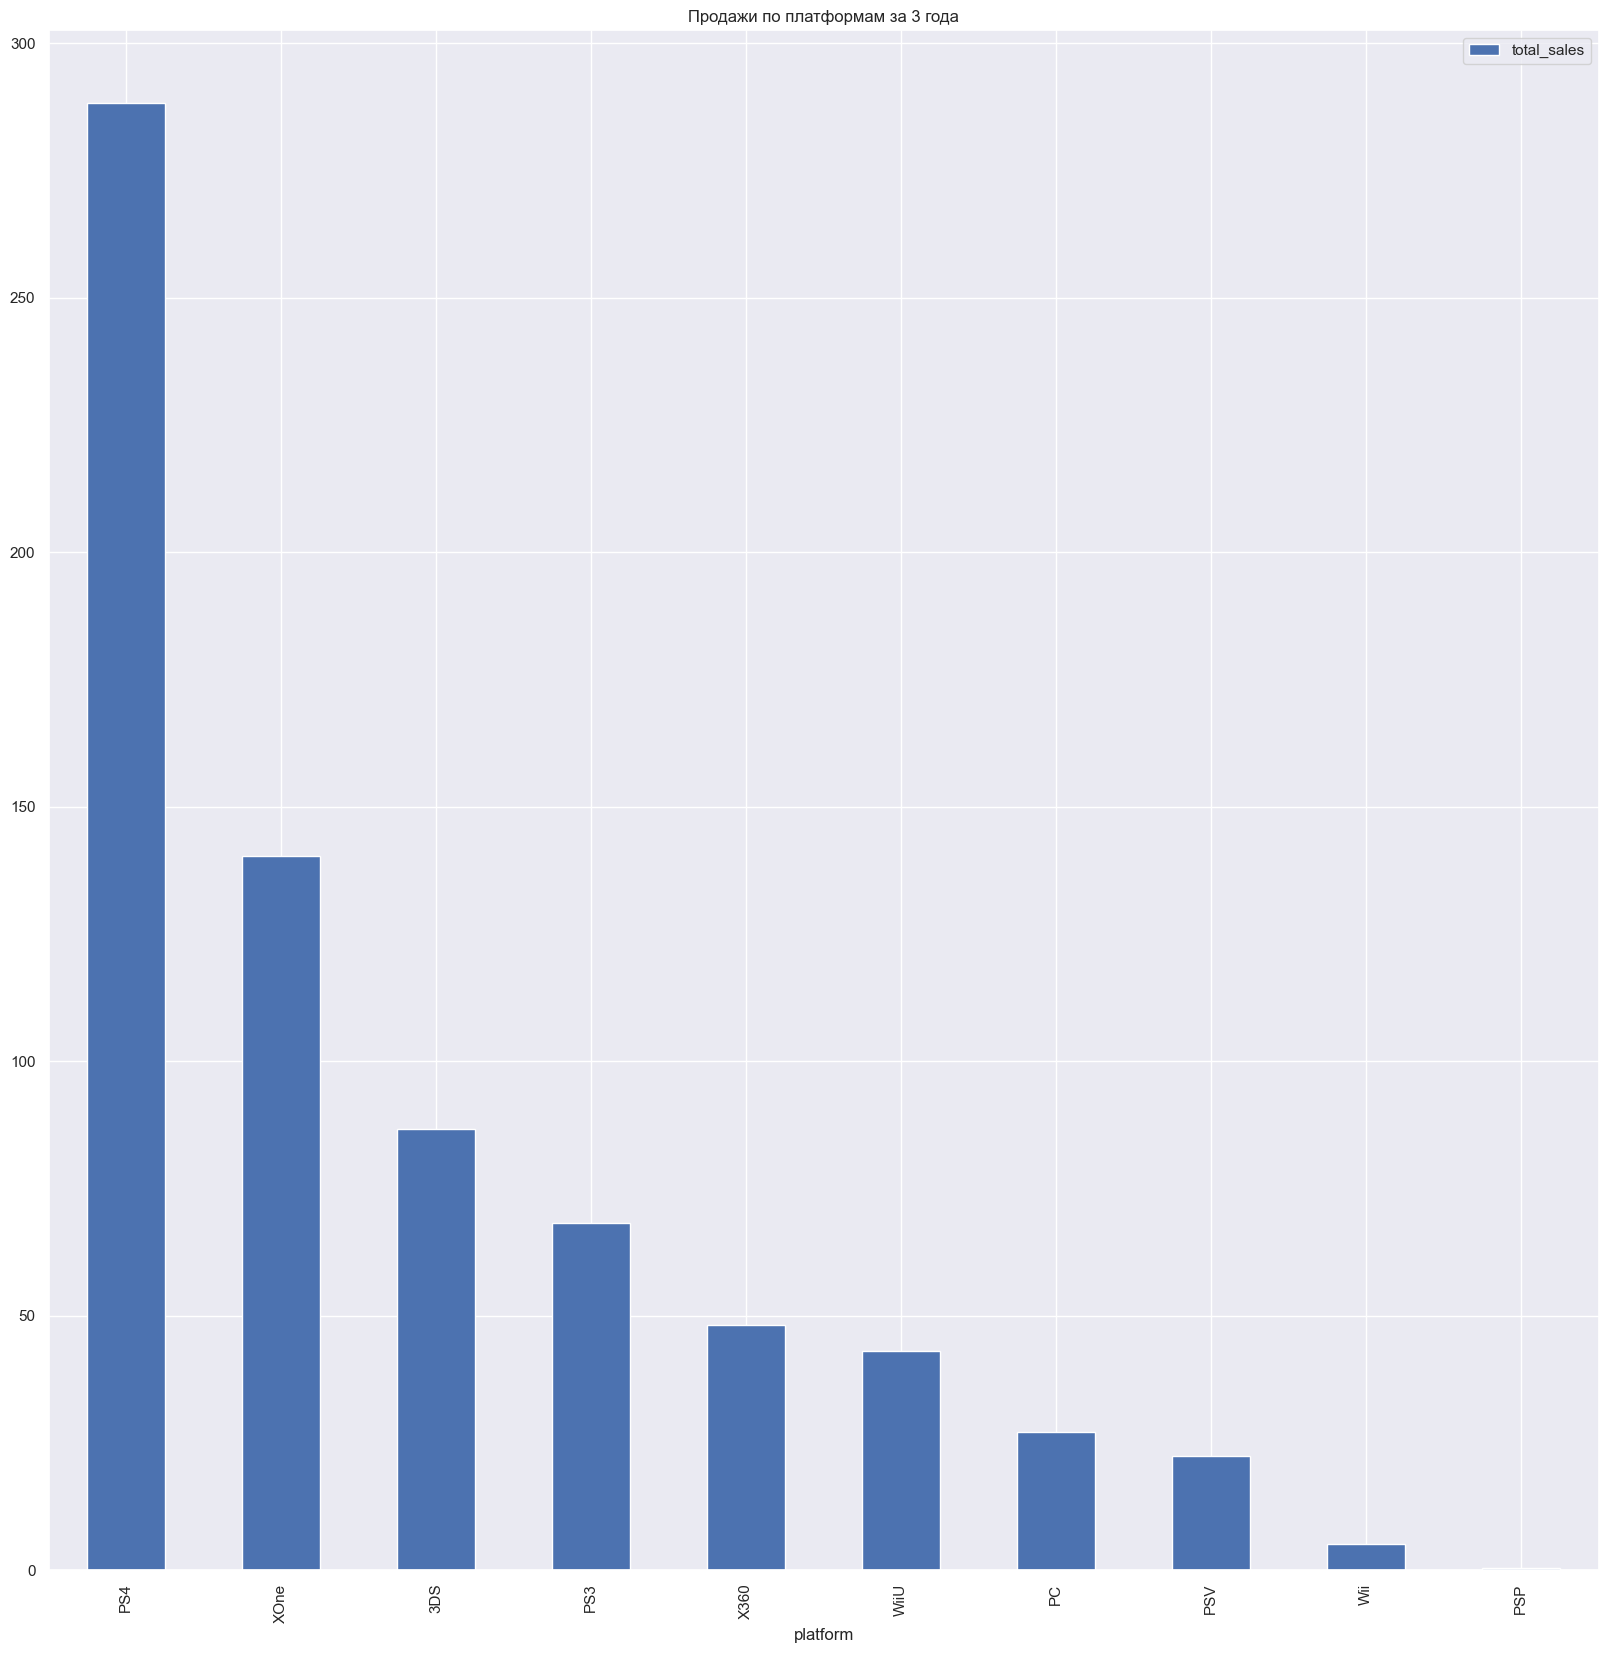

In [29]:
#сделаем выборку для определения потенциально прибыльных платформ
data_actual.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).plot(kind='bar', title='Продажи по платформам за 3 года')

Вывод: набирающие количество продаж платформы и потенциально прибыльные PS4, XOne, 3DS, падающие продажи у Wii и PSP.

#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [30]:
#будем изучать данные по трем потенциально прибыльным платформам
top_3 = data_actual.query('platform == "PS4" or platform == "XOne" or platform == "3DS"')
top_3.head(3)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


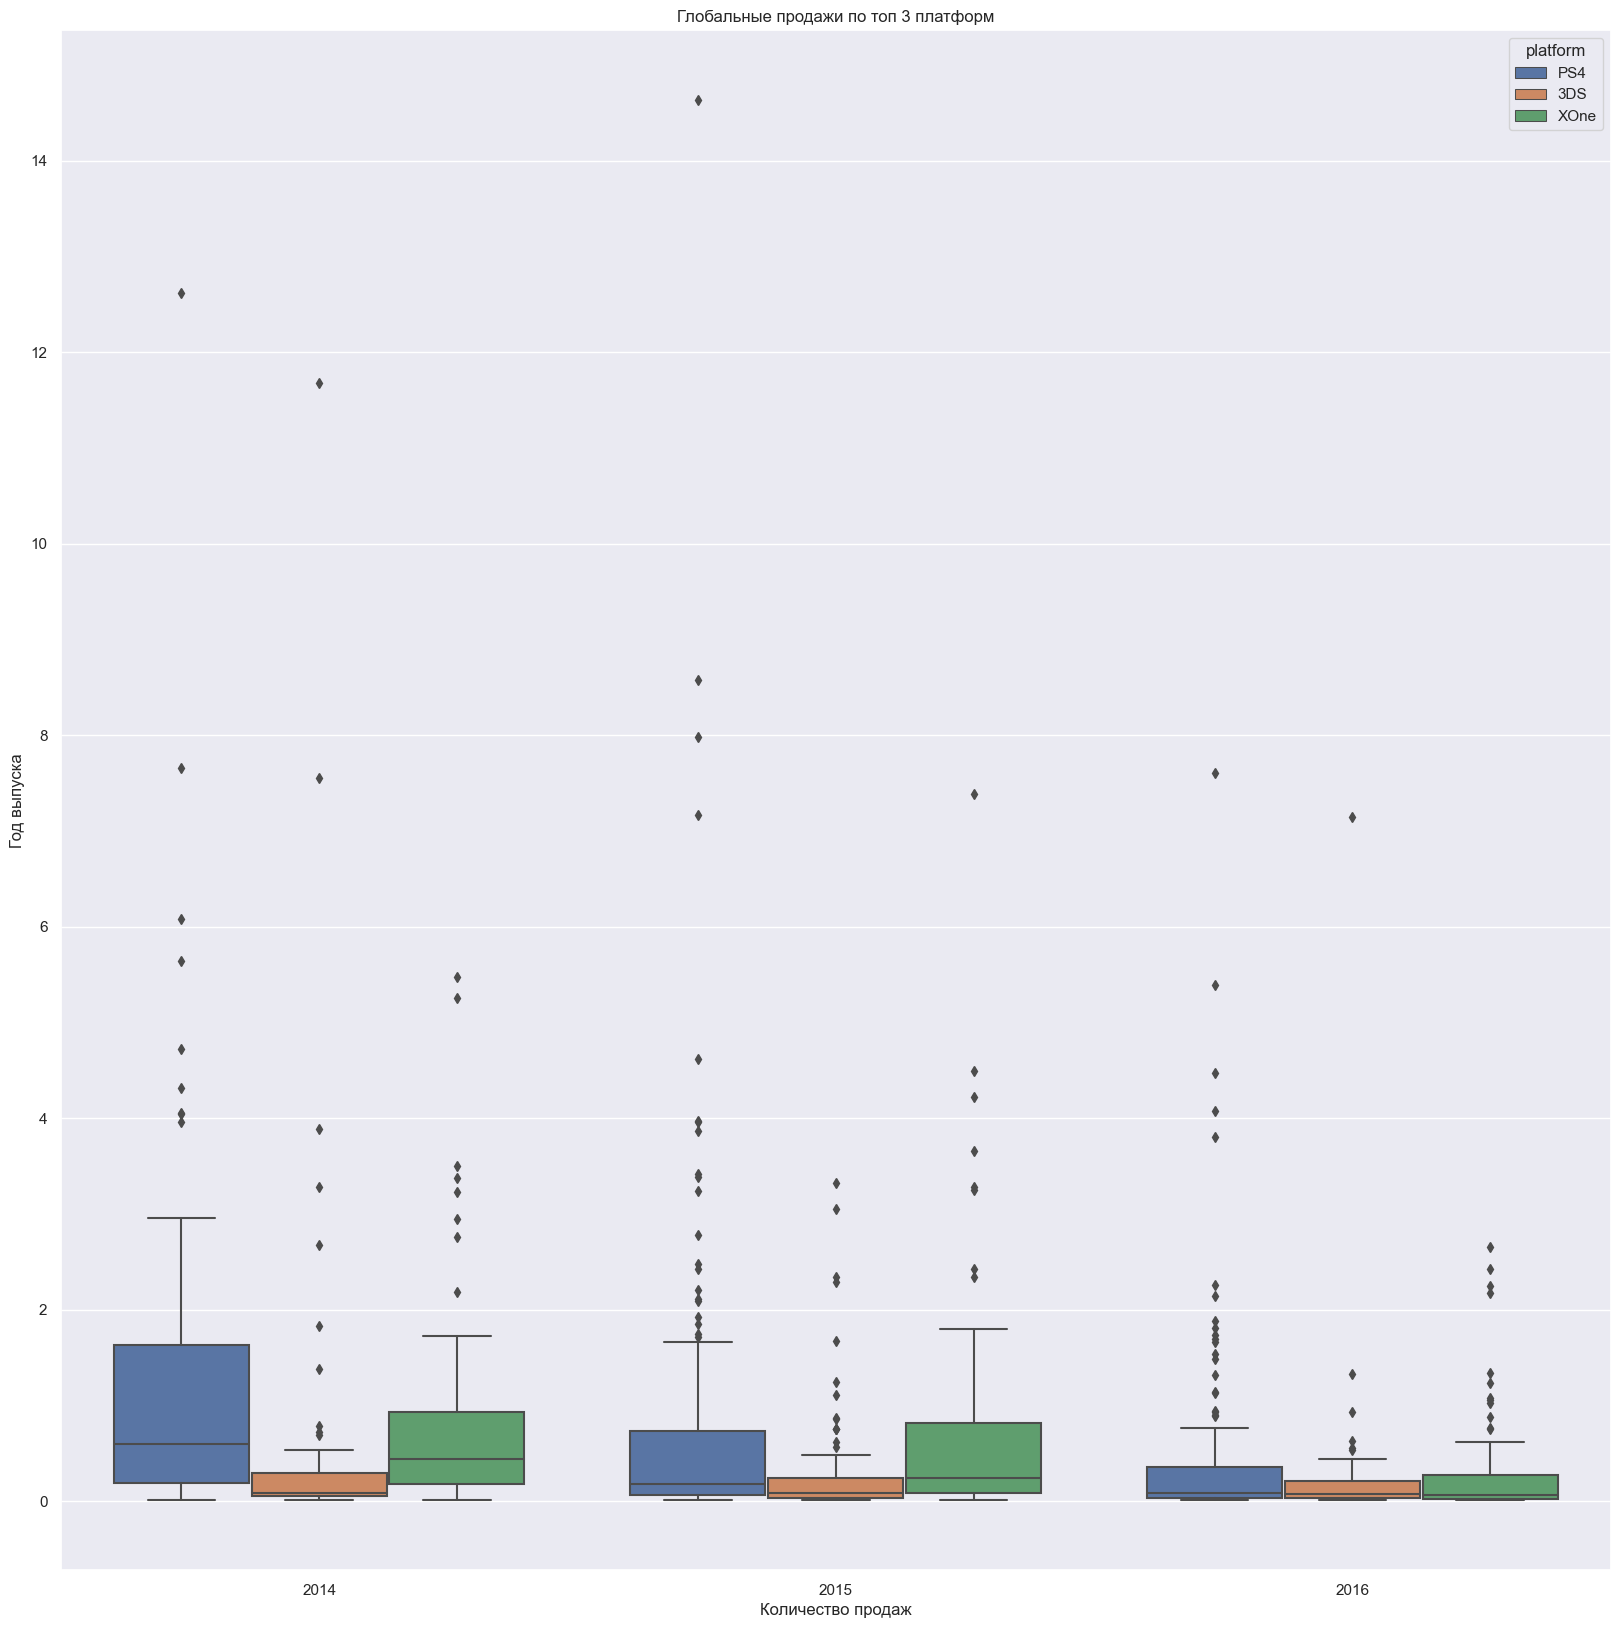

In [31]:
ax = sns.boxplot(data=top_3, x='year_of_release', y='total_sales', hue='platform')

ax.set_title('Глобальные продажи по топ 3 платформ')
ax.set(xlabel='Количество продаж', ylabel='Год выпуска');

Вывод: в 2014 году медиана разная у платформ, в 2015 медина близкая по уровню, в 2016 году почти совпадает, в 2014 и 2015 году наблюдаются максимумы, распределение смещено влево во все годы, больше всего аномальных значений у PS4

(0.0, 3.0)

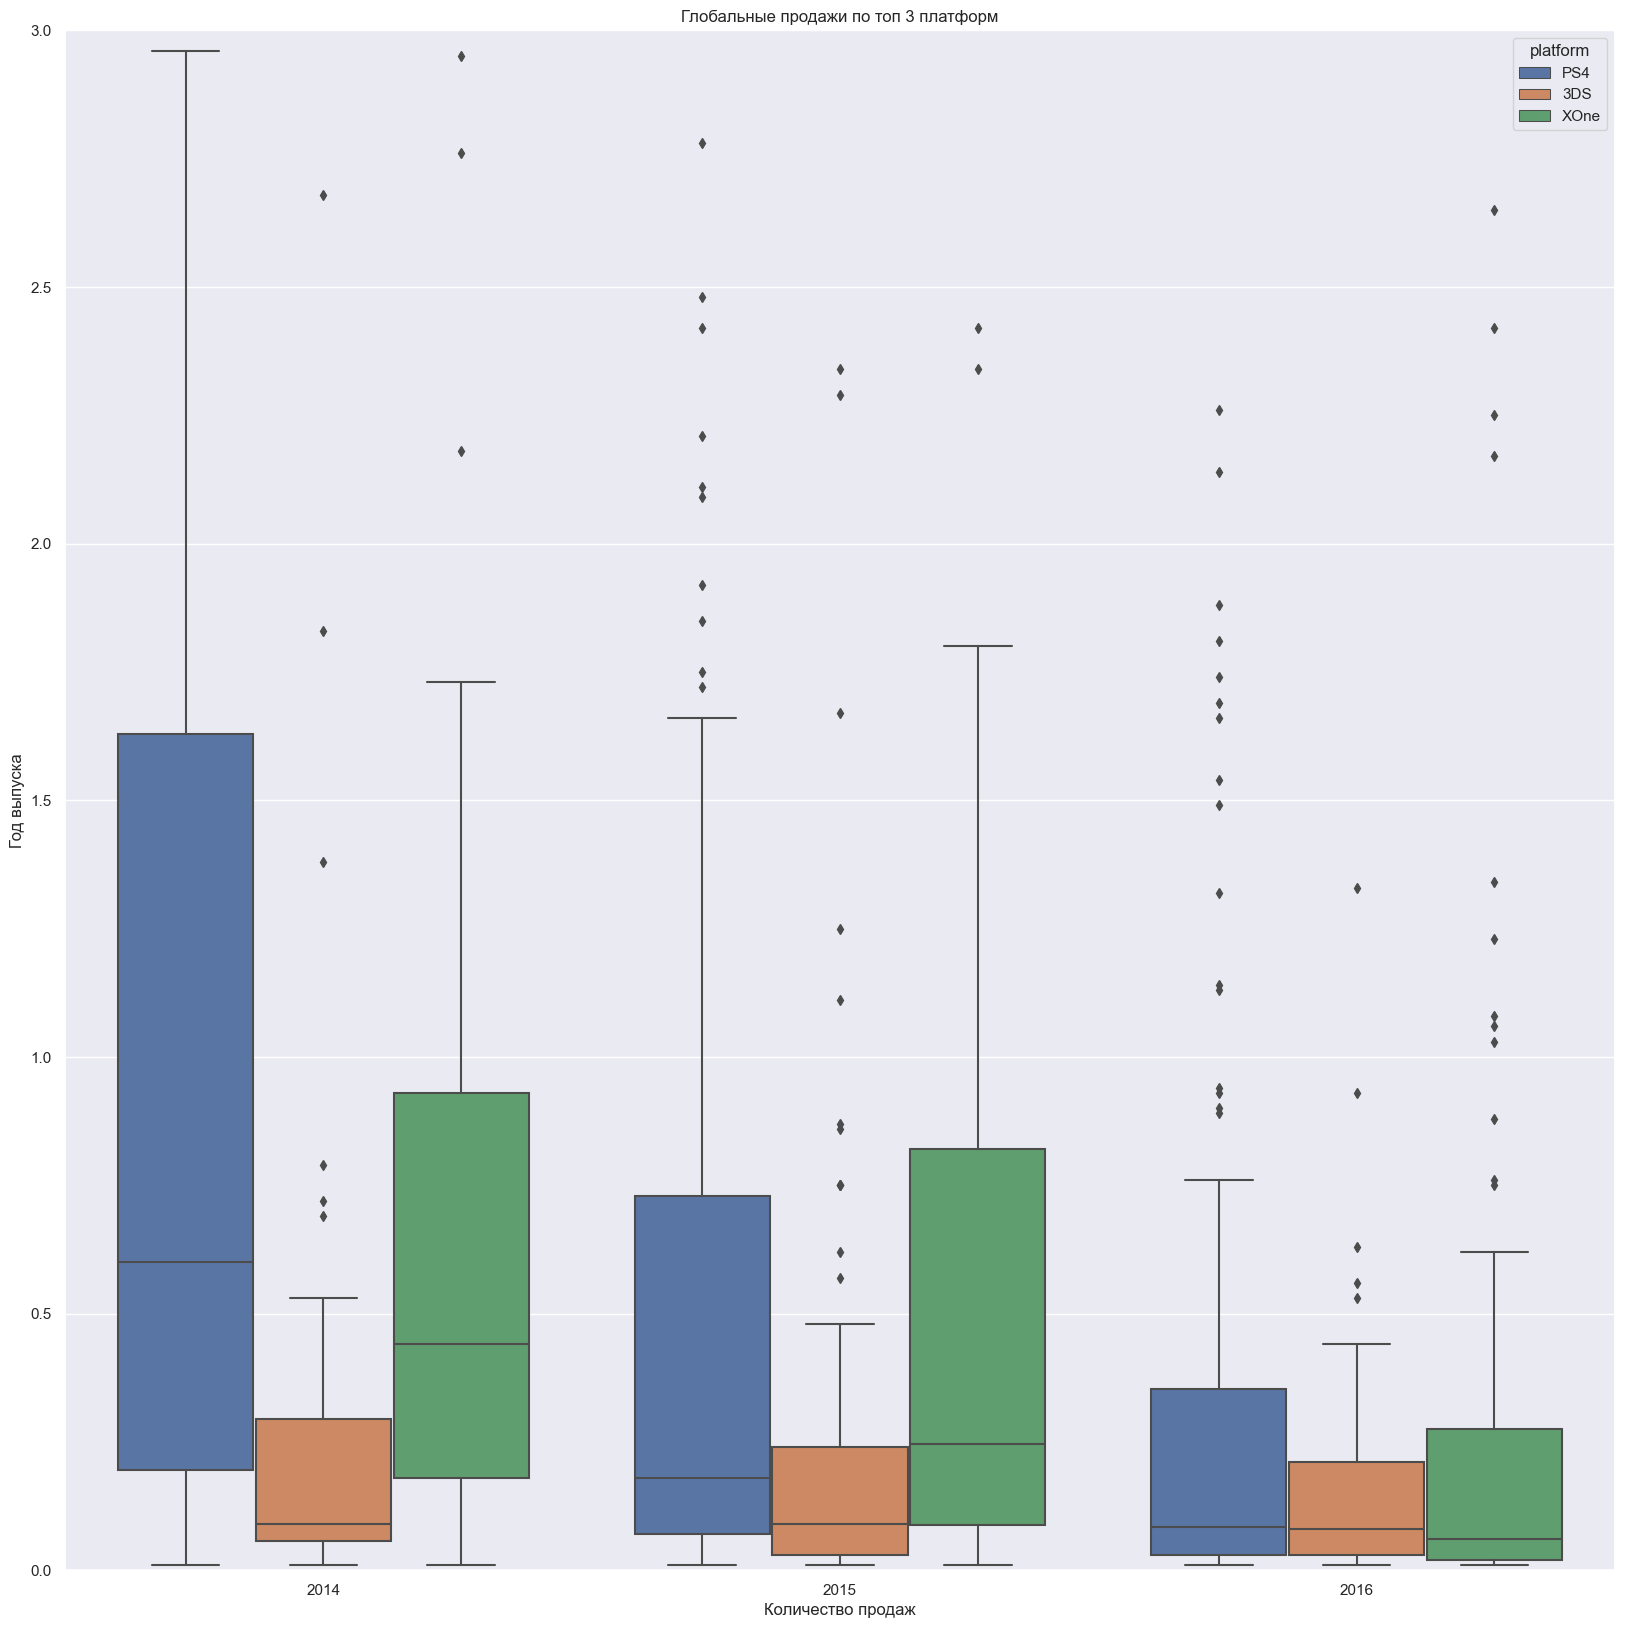

In [32]:
#новый график с ylim
ax = sns.boxplot(data=top_3, x='year_of_release', y='total_sales', hue='platform')

ax.set_title('Глобальные продажи по топ 3 платформ')
ax.set(xlabel='Количество продаж', ylabel='Год выпуска');
ax.set_ylim([0, 3]) 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [33]:
# уберем все пропуски в top_3 для анализа данных без учета пропусков
top_3_for_analysis = top_3.dropna(subset=['critic_score', 'user_score'], axis='rows')

In [34]:
# проверим удаление
top_3_for_analysis.isna().sum()

index               0
name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             16
total_sales         0
dtype: int64

<Axes: title={'center': 'Зависимость продаж от оценок критиков у PS4'}, xlabel='critic_score', ylabel='total_sales'>

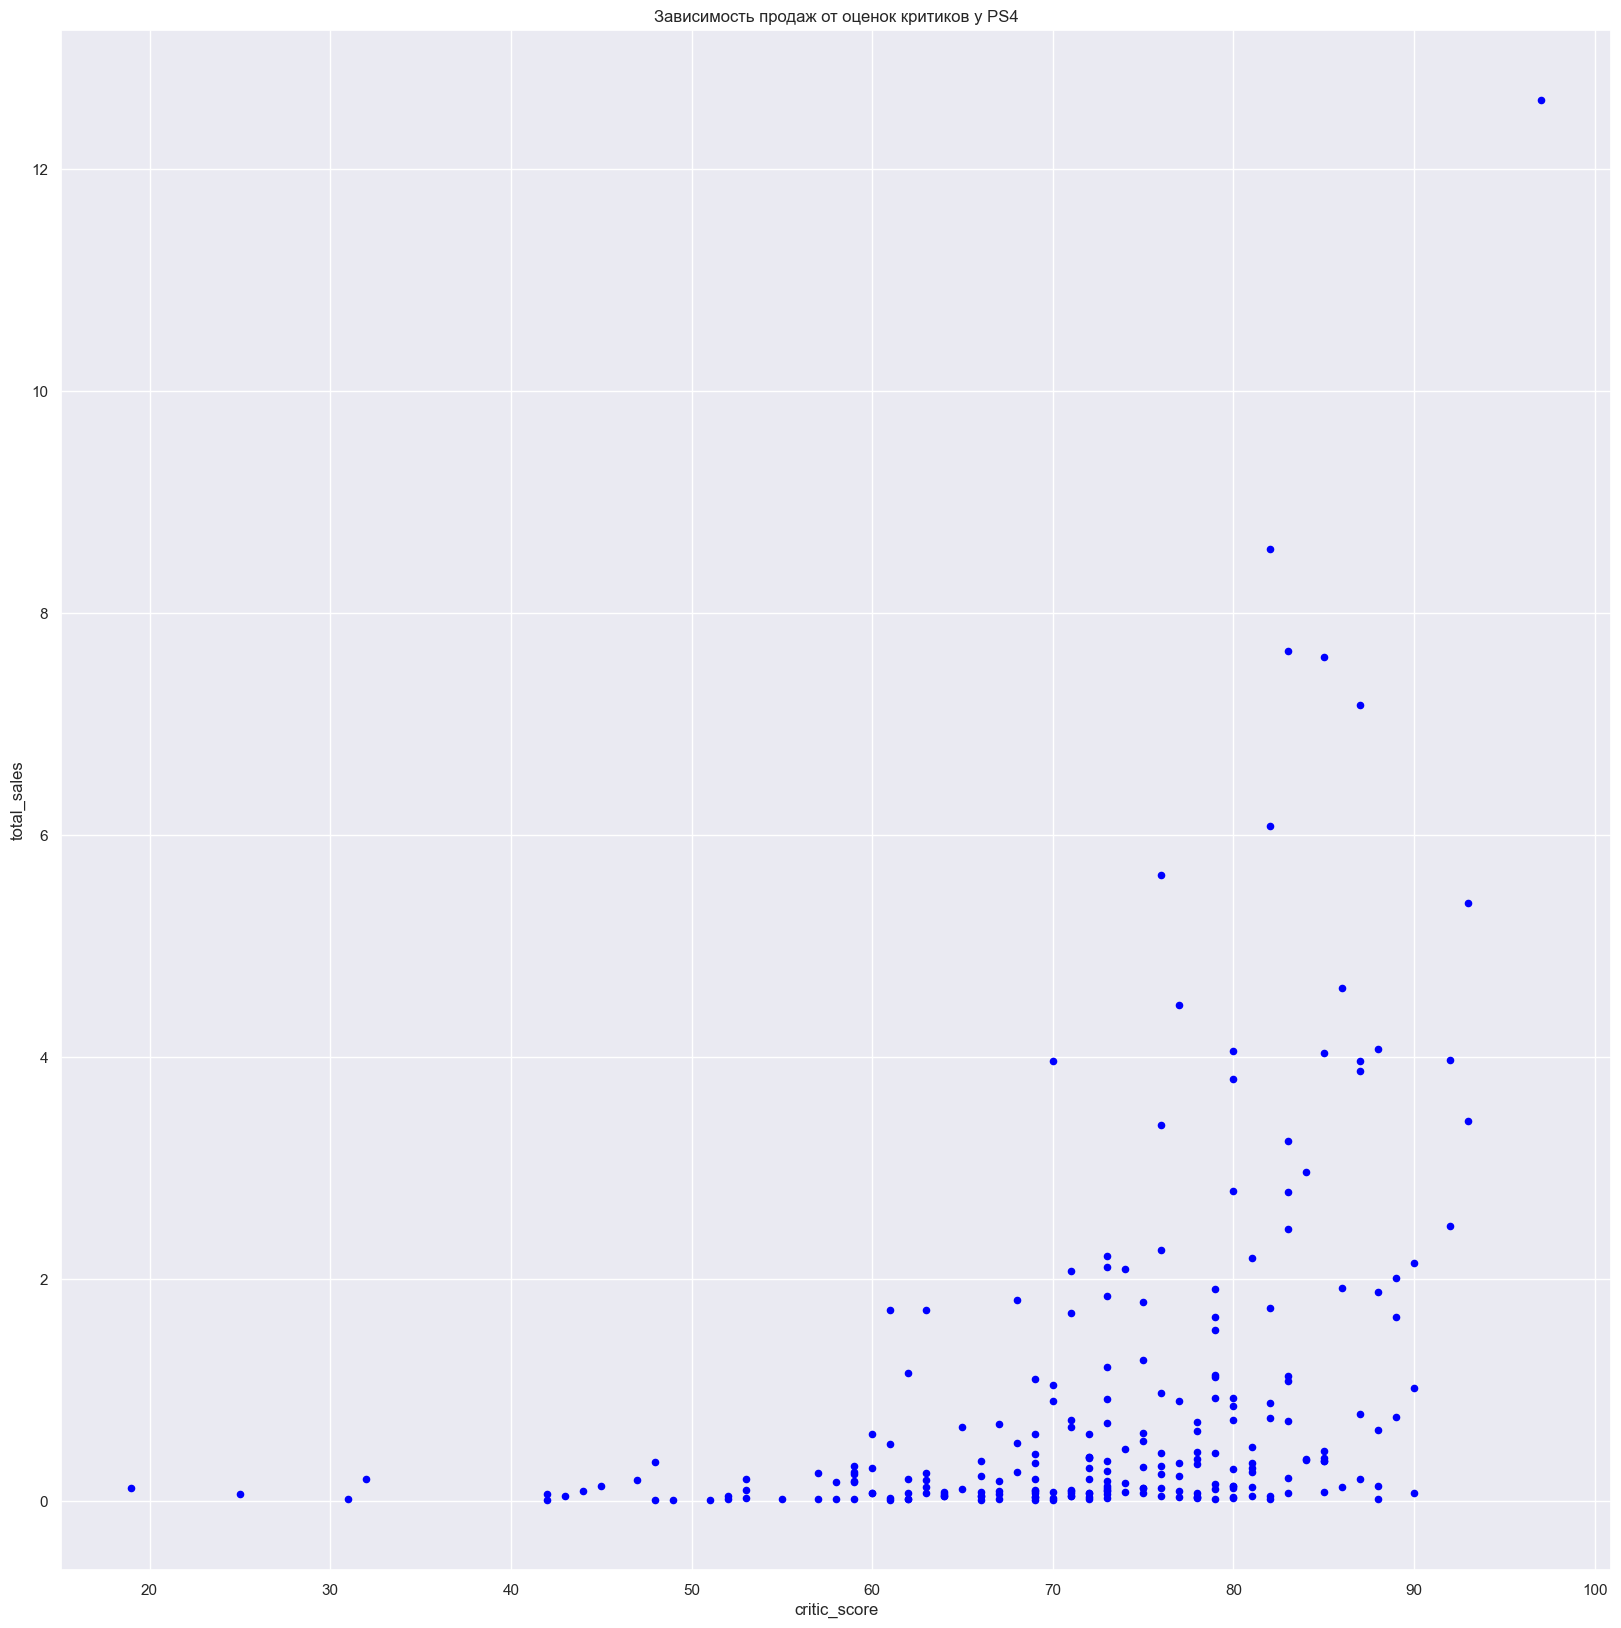

In [35]:
top_3_for_analysis.query('platform =="PS4"').plot(x='critic_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок критиков у PS4')

<Axes: title={'center': 'Зависимость продаж от оценок игроков у PS4'}, xlabel='user_score', ylabel='total_sales'>

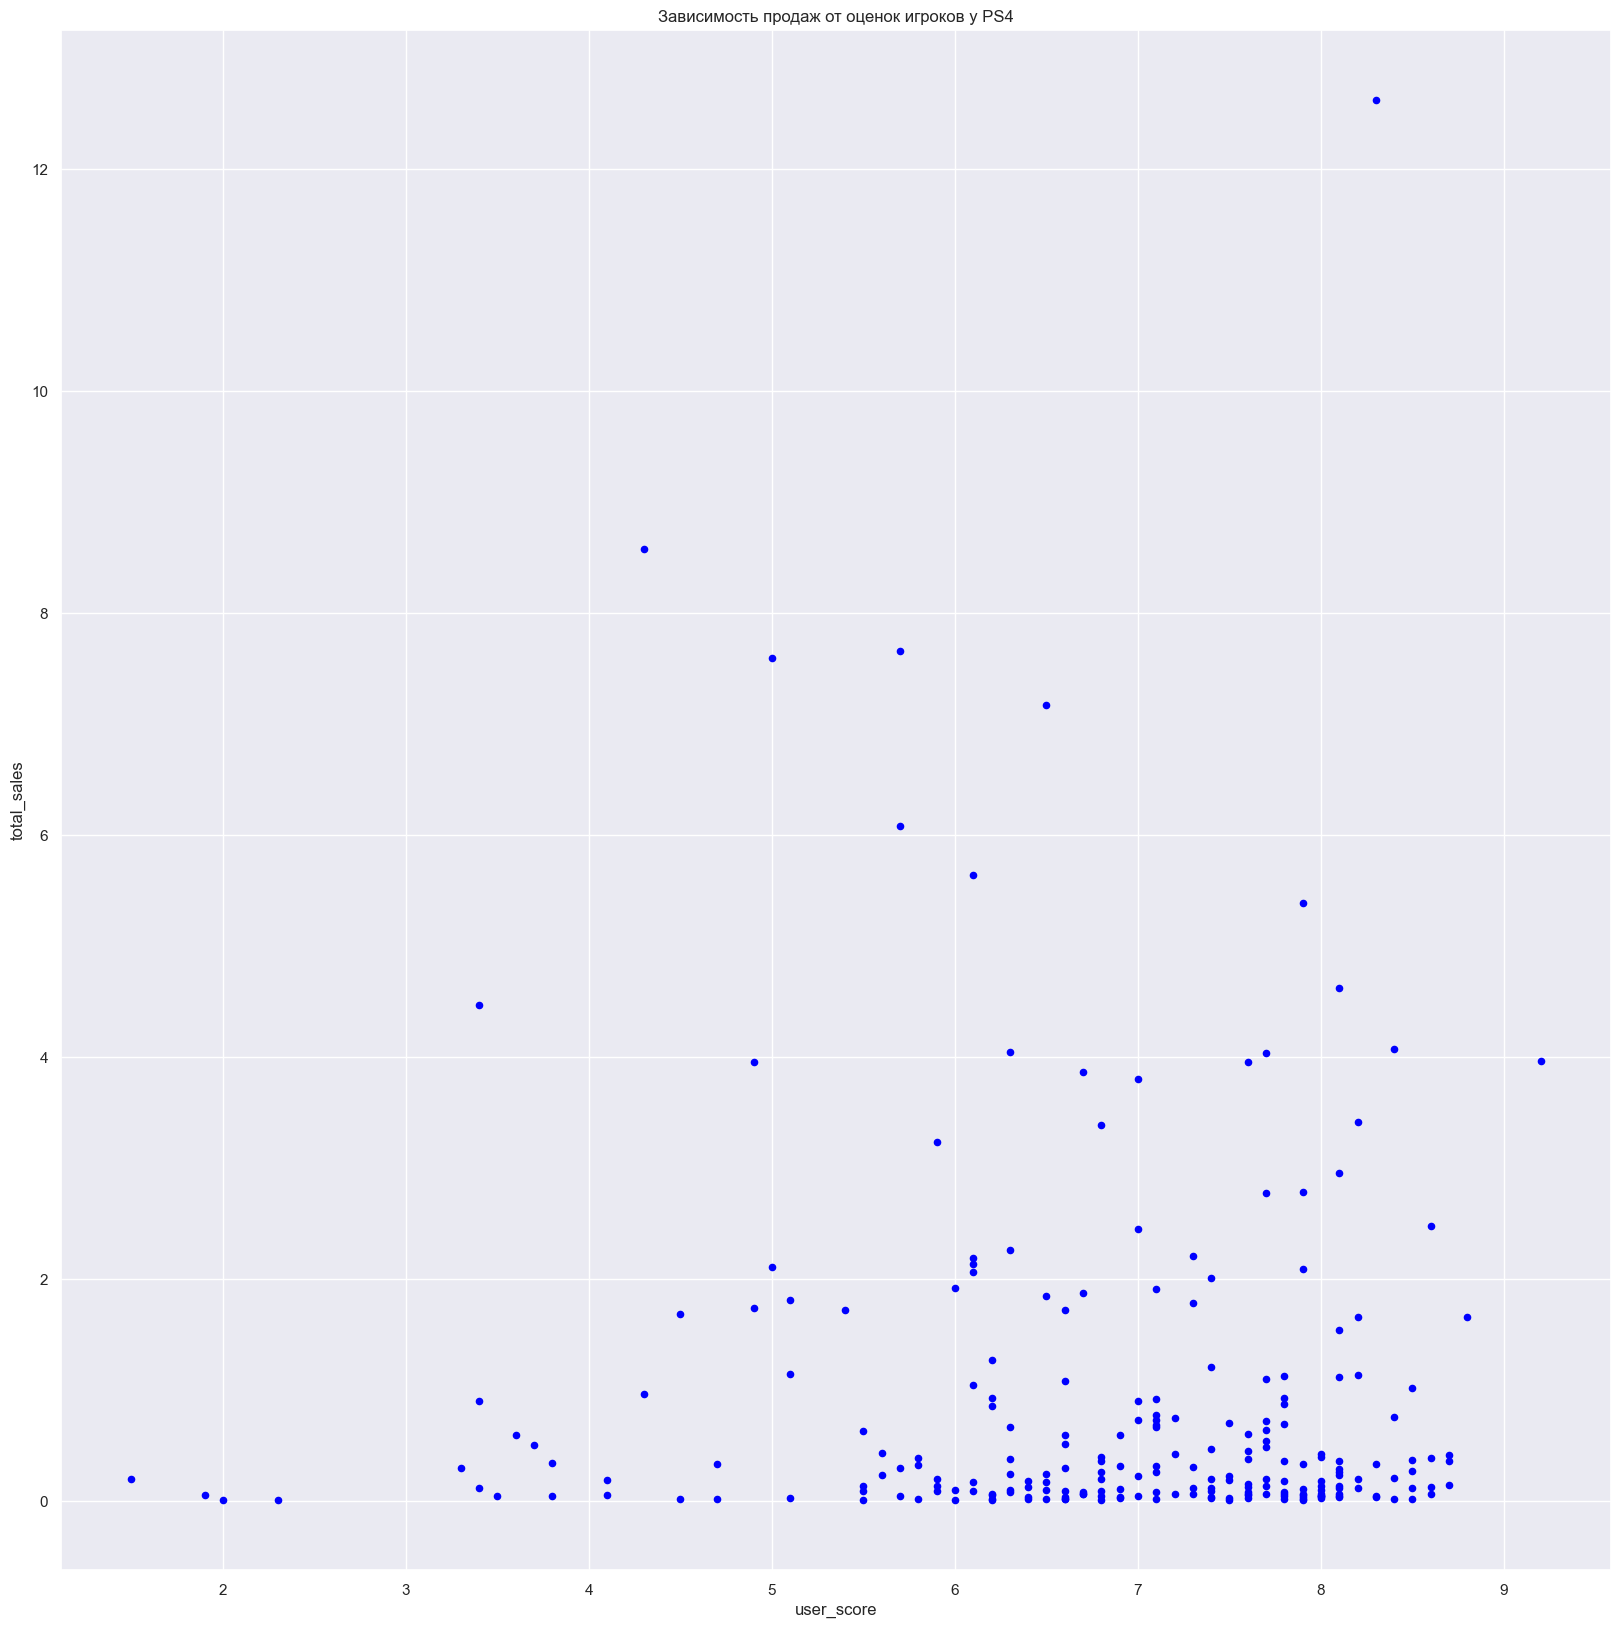

In [36]:
top_3_for_analysis.query('platform =="PS4"').plot(x='user_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок игроков у PS4')

In [37]:
#посмотрим корреляцию в цифрах
top_3_for_analysis.corr()

C:\Users\X751L\AppData\Local\Temp\ipykernel_2392\1201190888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_3_for_analysis.corr()


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000000,0.312452,-0.630706,-0.507662,-0.225261,-0.561923,-0.469309,-0.022541,-0.624731
year_of_release,0.312452,1.000000,-0.222964,-0.150316,-0.114937,-0.170260,-0.008016,0.009930,-0.205922
na_sales,-0.630706,-0.222964,1.000000,0.636114,0.147051,0.803833,0.399850,-0.050404,0.867787
eu_sales,-0.507662,-0.150316,0.636114,1.000000,0.176571,0.920891,0.307711,-0.063001,0.924344
jp_sales,-0.225261,-0.114937,0.147051,0.176571,1.000000,0.169418,0.126268,0.159264,0.289681
other_sales,-0.561923,-0.170260,0.803833,0.920891,0.169418,1.000000,0.347171,-0.046669,0.963567
critic_score,-0.469309,-0.008016,0.399850,0.307711,0.126268,0.347171,1.000000,0.520694,0.385646
user_score,-0.022541,0.009930,-0.050404,-0.063001,0.159264,-0.046669,0.520694,1.000000,-0.041241
total_sales,-0.624731,-0.205922,0.867787,0.924344,0.289681,0.963567,0.385646,-0.041241,1.000000


Вывод: по графикам нет сильной взаимосвязи между продажами и отзывами критиков и игроков, по расчету также не большие зависимости, посмотрим другие платформы из топ 3

Соотнесите выводы с продажами игр на других платформах.

<Axes: title={'center': 'Зависимость продаж от оценок критиков у XOne'}, xlabel='critic_score', ylabel='total_sales'>

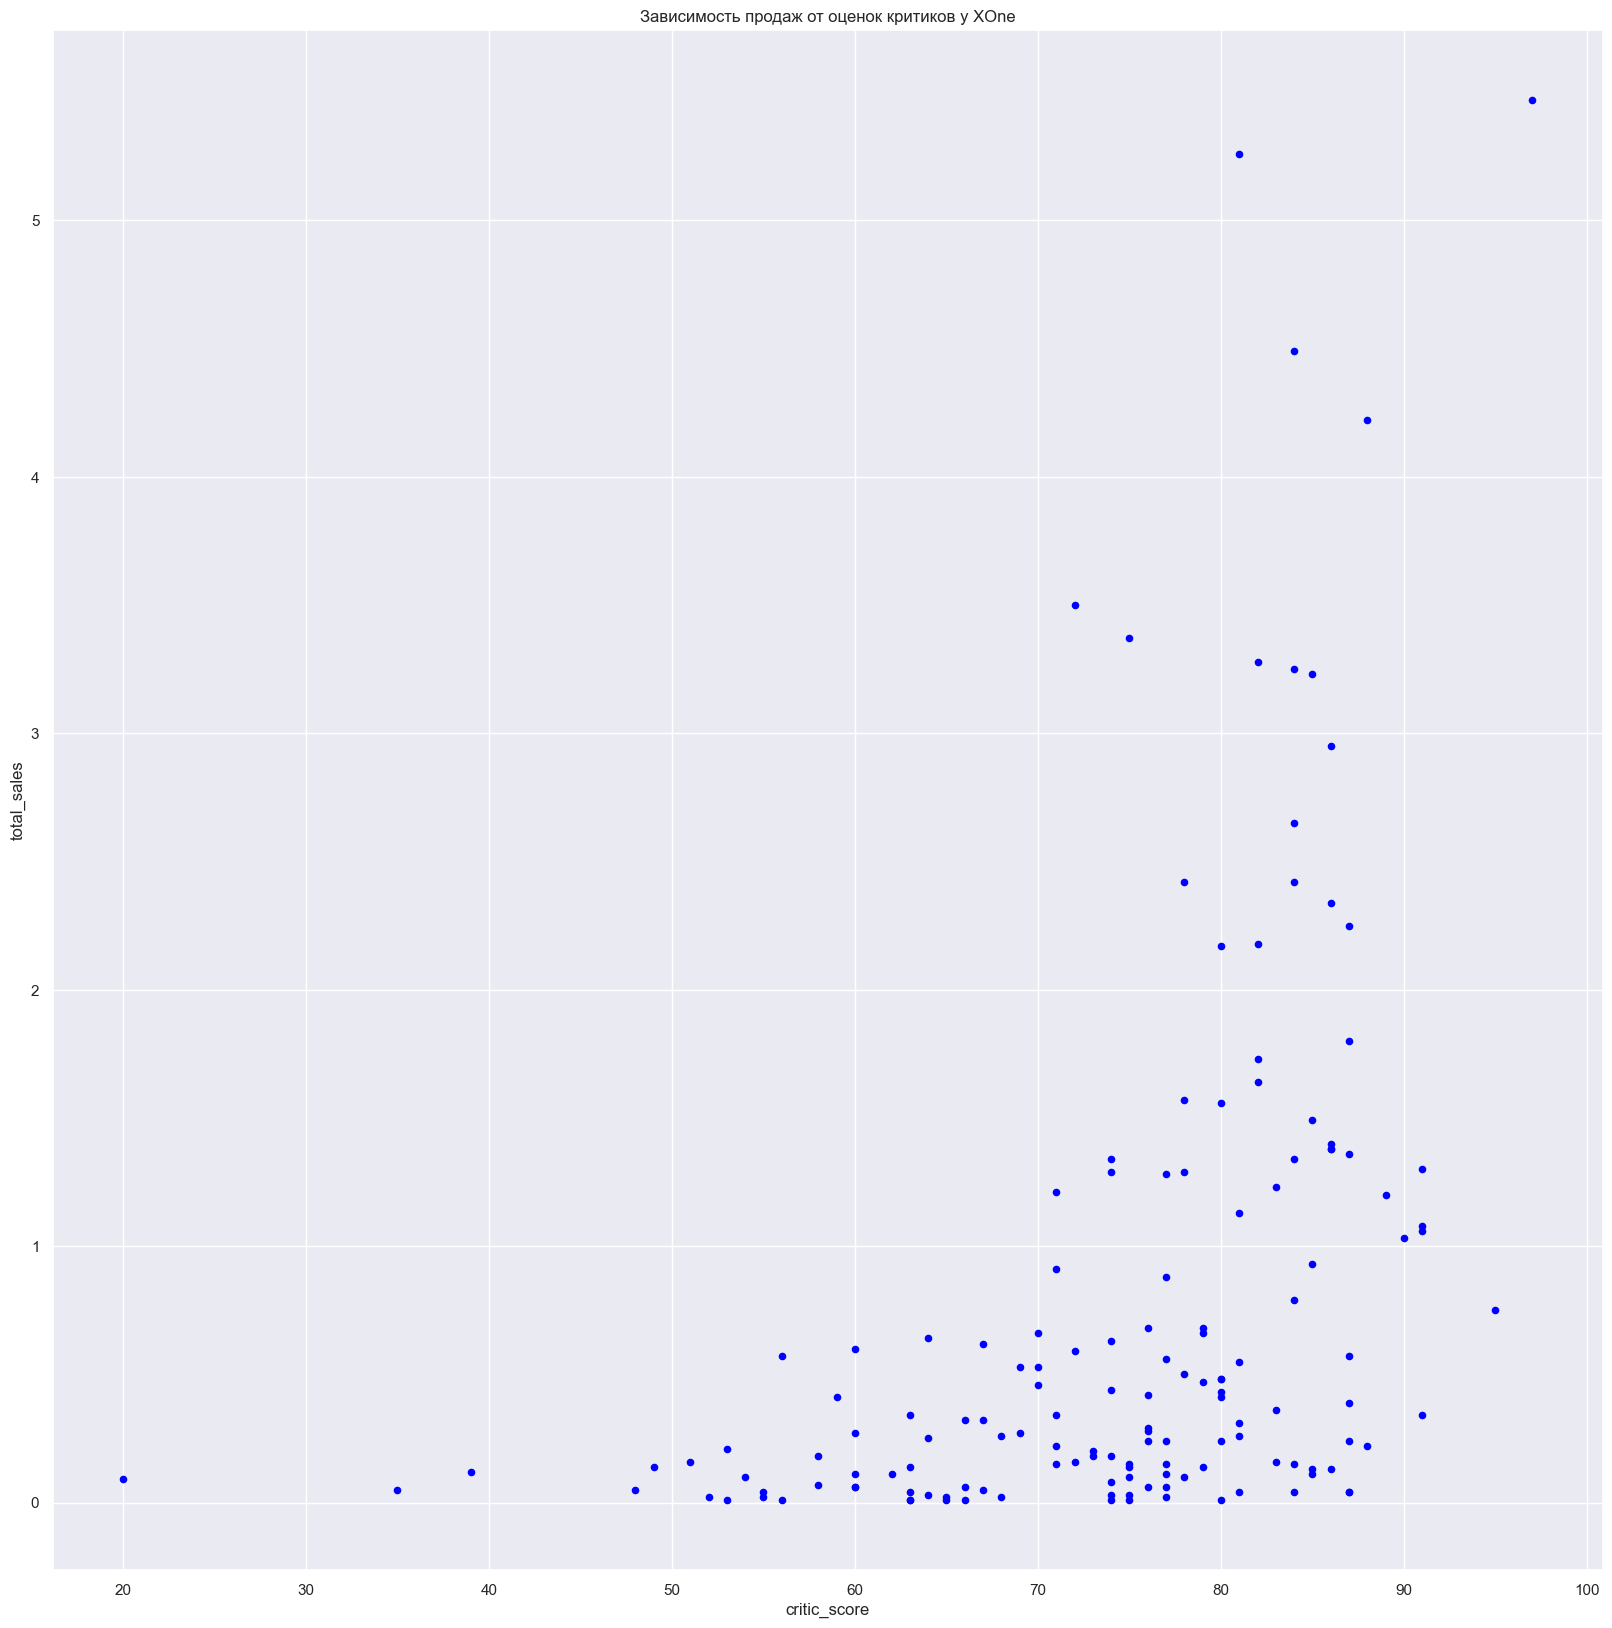

In [38]:
top_3_for_analysis.query('platform =="XOne"').plot(x='critic_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок критиков у XOne')

<Axes: title={'center': 'Зависимость продаж от оценок игроков у XOne'}, xlabel='user_score', ylabel='total_sales'>

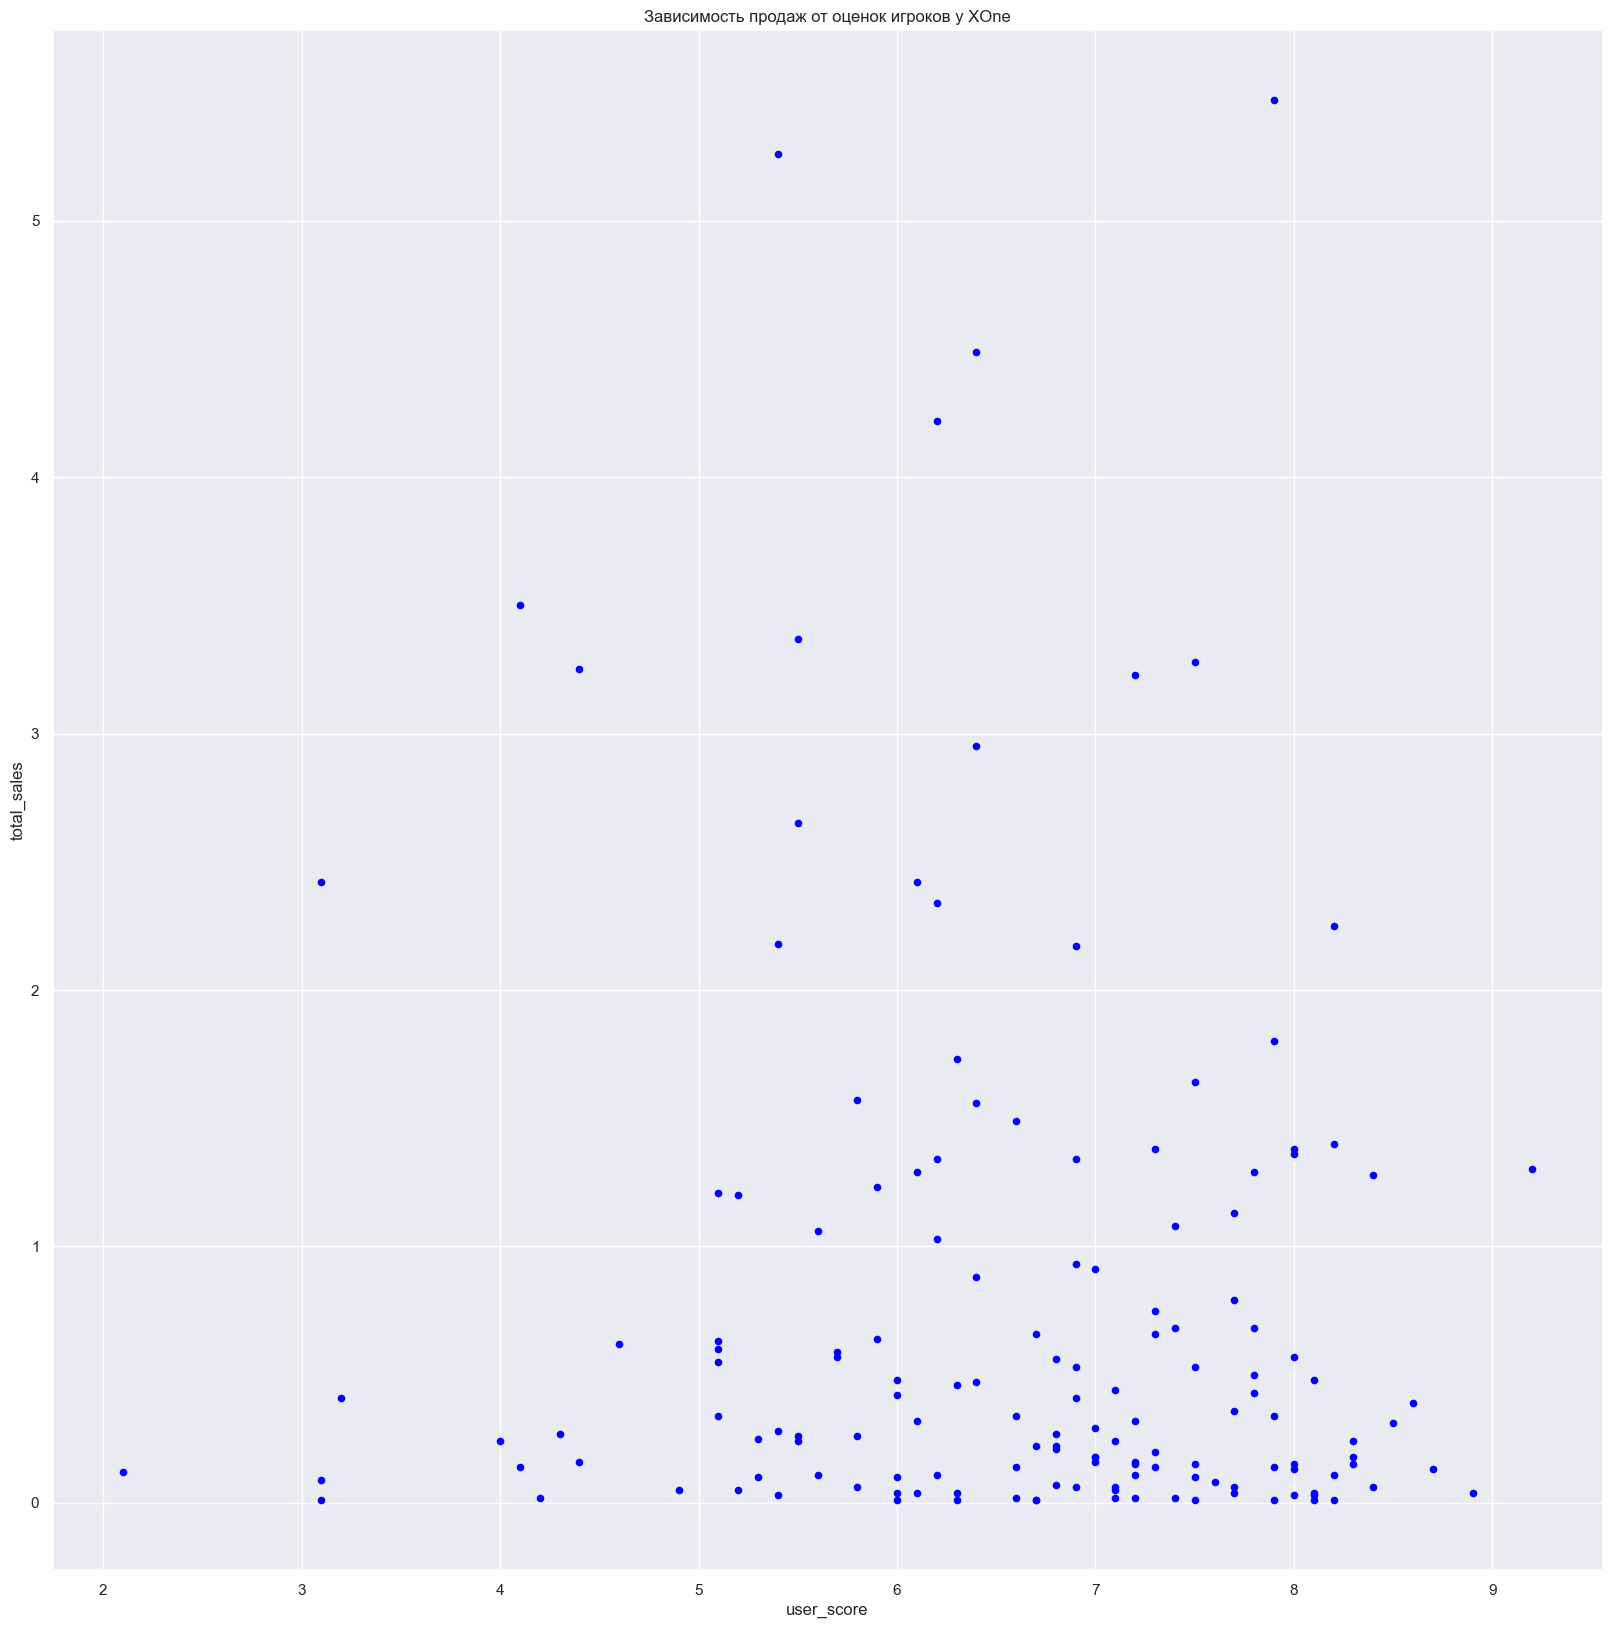

In [39]:
top_3_for_analysis.query('platform =="XOne"').plot(x='user_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок игроков у XOne')

<Axes: title={'center': 'Зависимость продаж от оценок критиков у 3DS'}, xlabel='critic_score', ylabel='total_sales'>

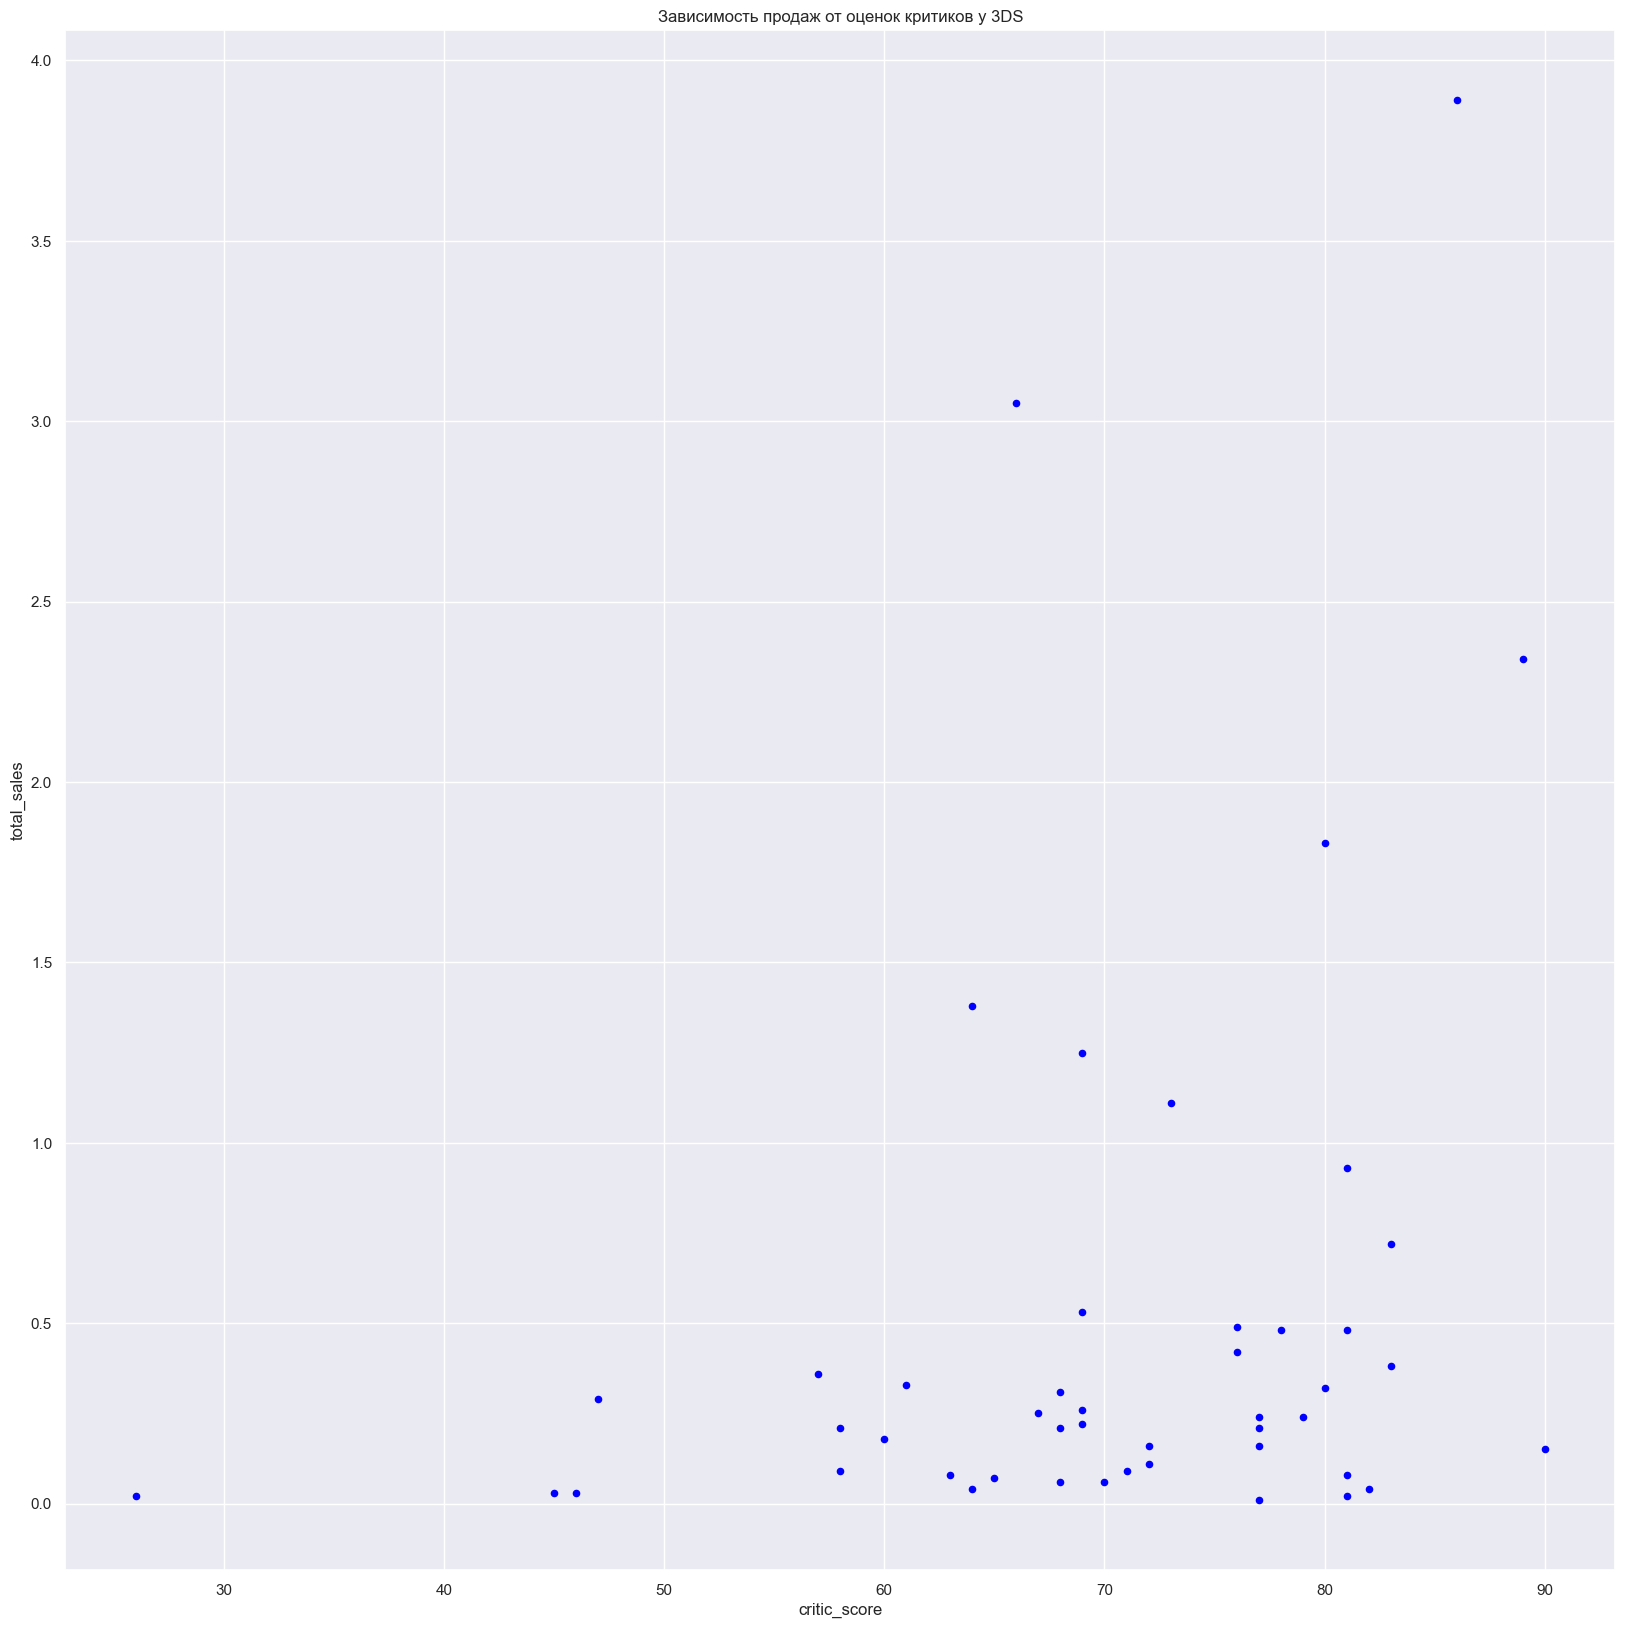

In [40]:
top_3_for_analysis.query('platform =="3DS"').plot(x='critic_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок критиков у 3DS')

<Axes: title={'center': 'Зависимость продаж от оценок игроков у 3DS'}, xlabel='user_score', ylabel='total_sales'>

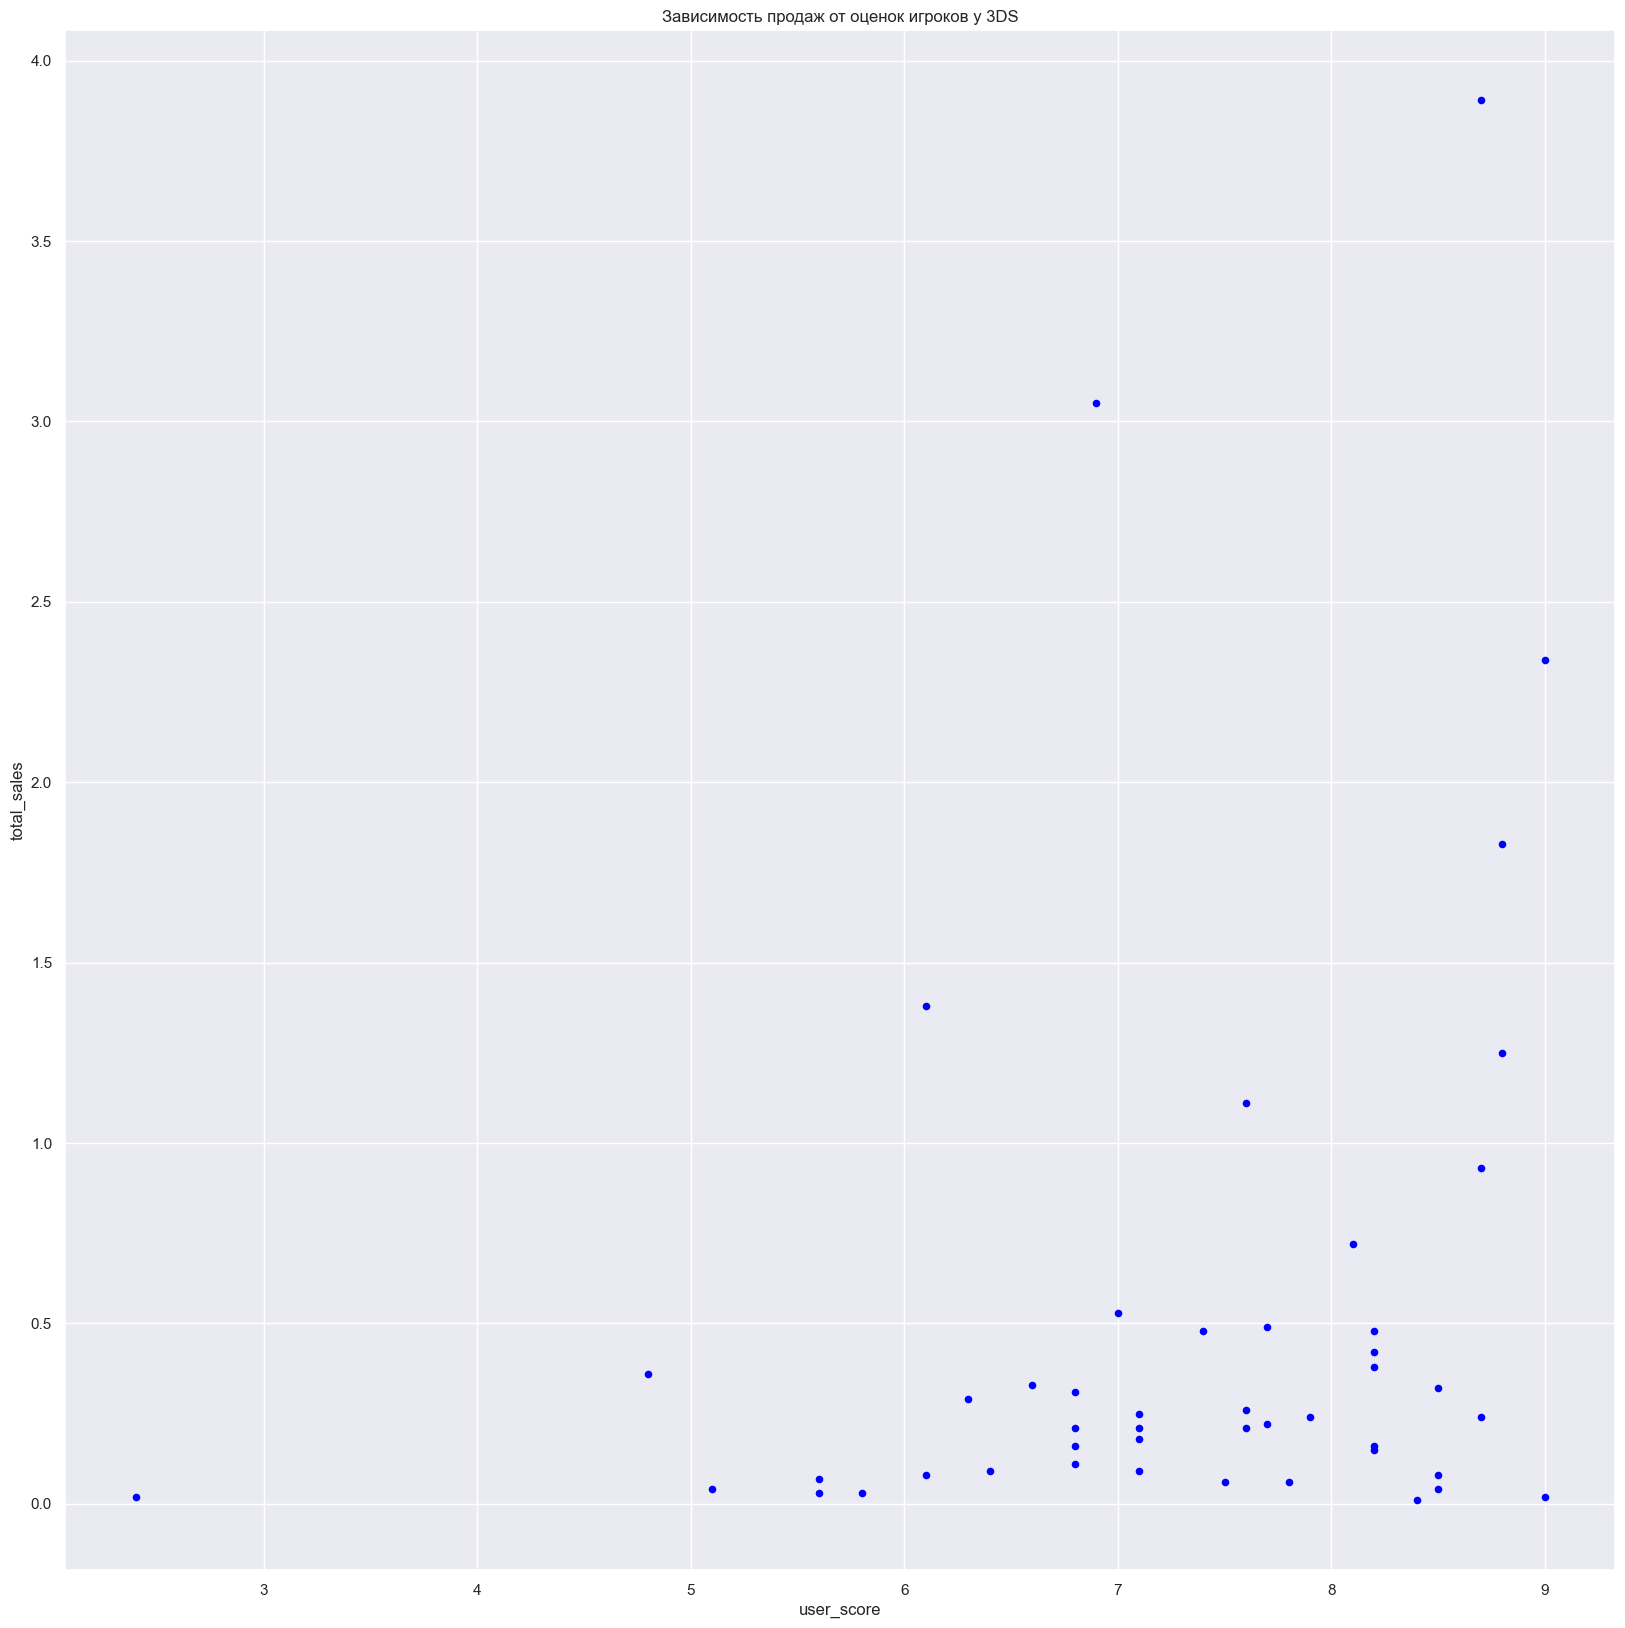

In [41]:
top_3_for_analysis.query('platform =="3DS"').plot(x='user_score', y='total_sales', kind='scatter', color='blue', title='Зависимость продаж от оценок игроков у 3DS')

Вывод: по другим платформам тоже особой связи не видно, только наблюдается небольшая зависимость между оценками критиков и продажами XOne

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<Axes: title={'center': 'Топ 5 прибыльных жанров'}, xlabel='genre'>

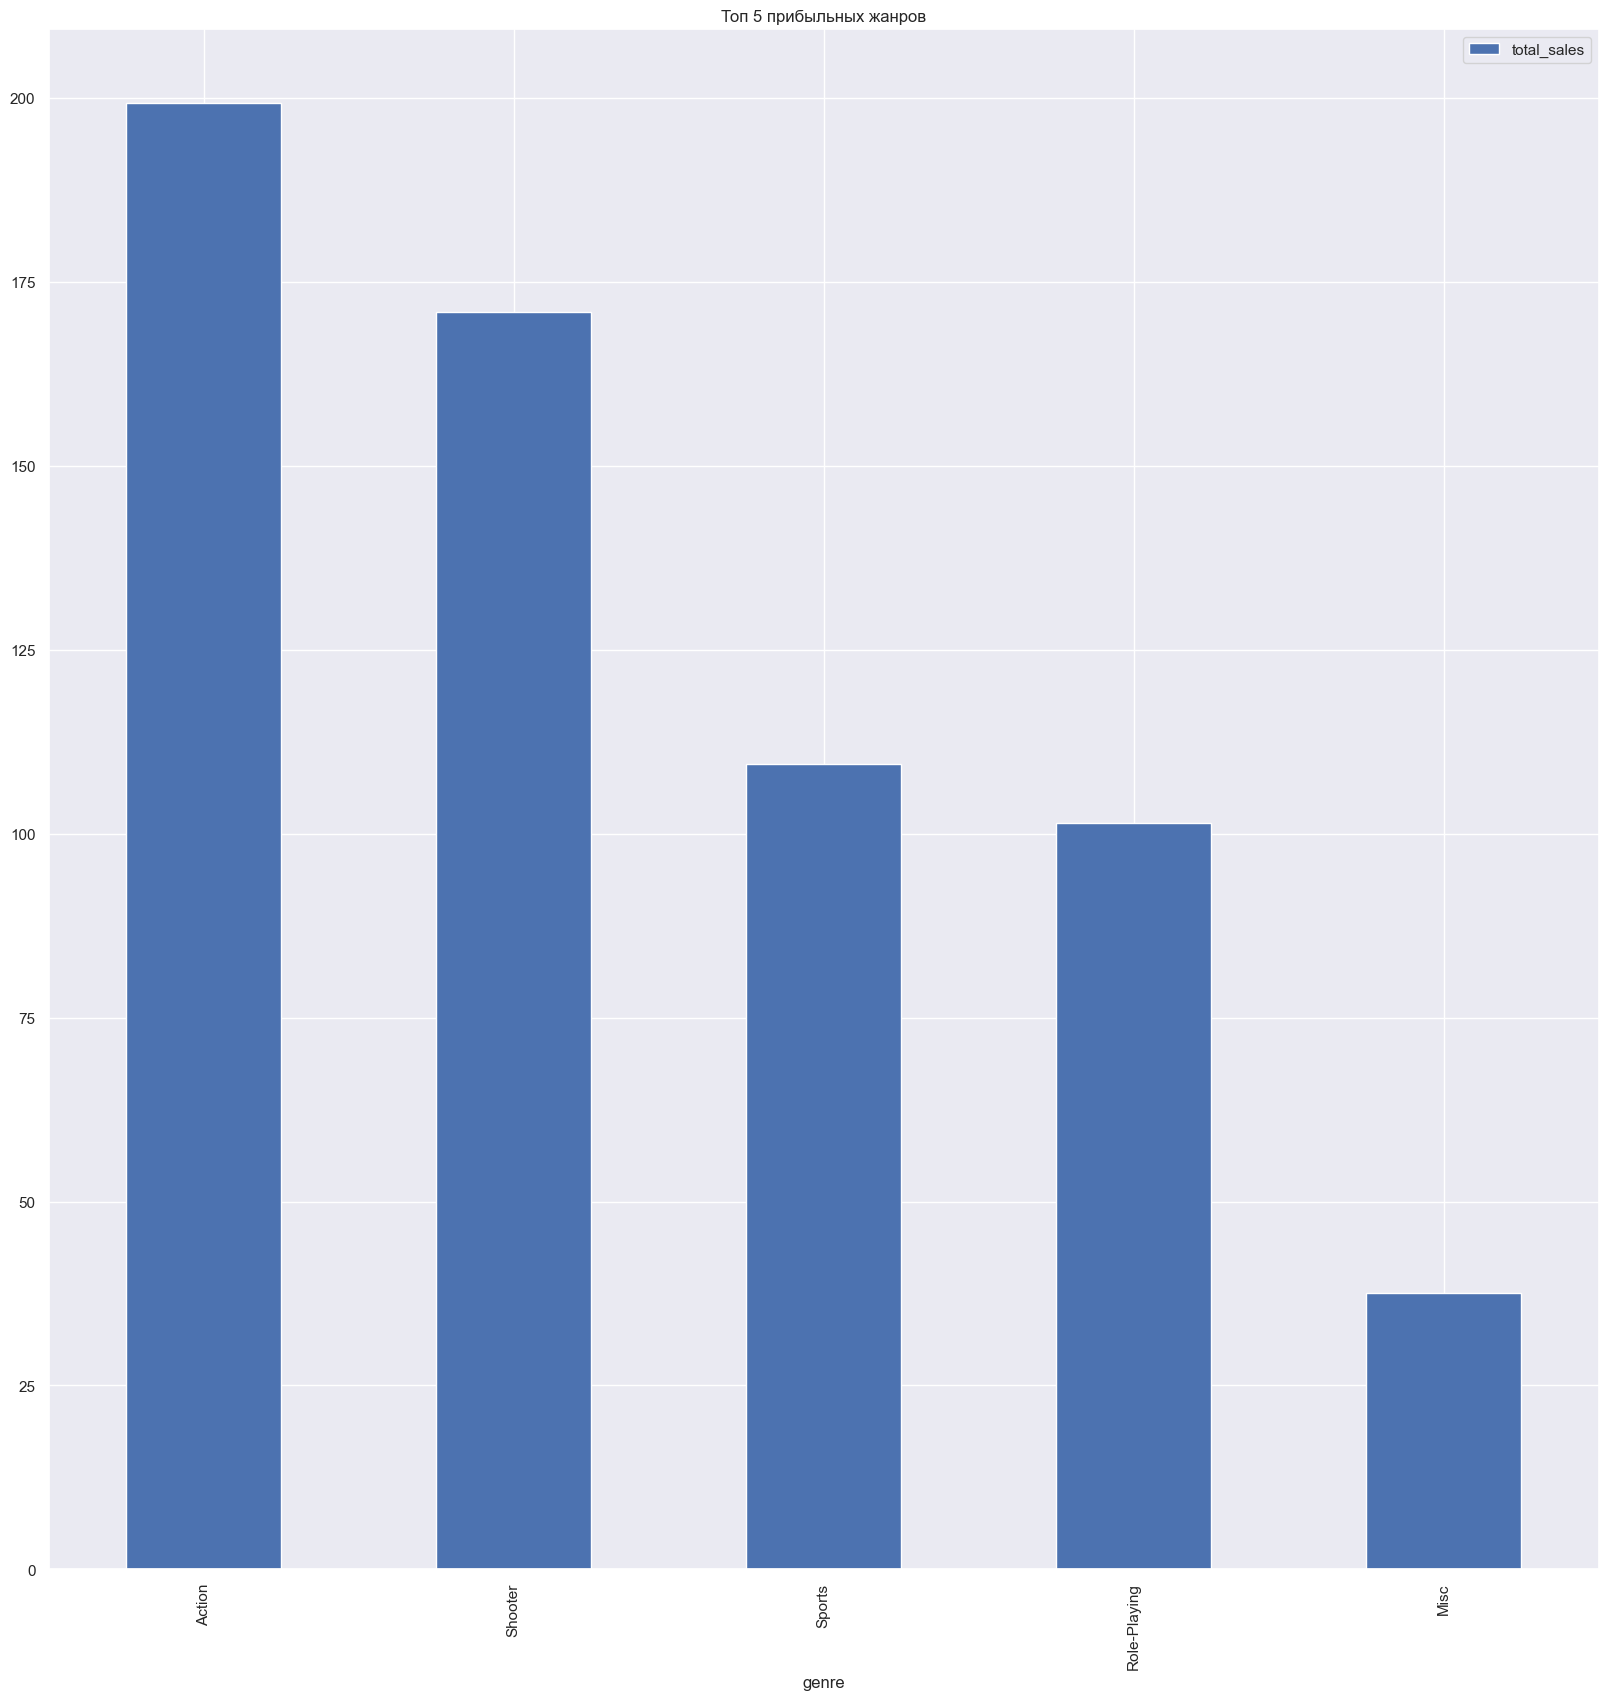

In [42]:
data_actual.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5).plot(kind='bar', title='Топ 5 прибыльных жанров')

Вывод: самые популярные жанры Action, Shooter, Sports, Role-Playing, Misc

<Axes: title={'center': '5 жанров с наименьшими продажами'}, xlabel='genre'>

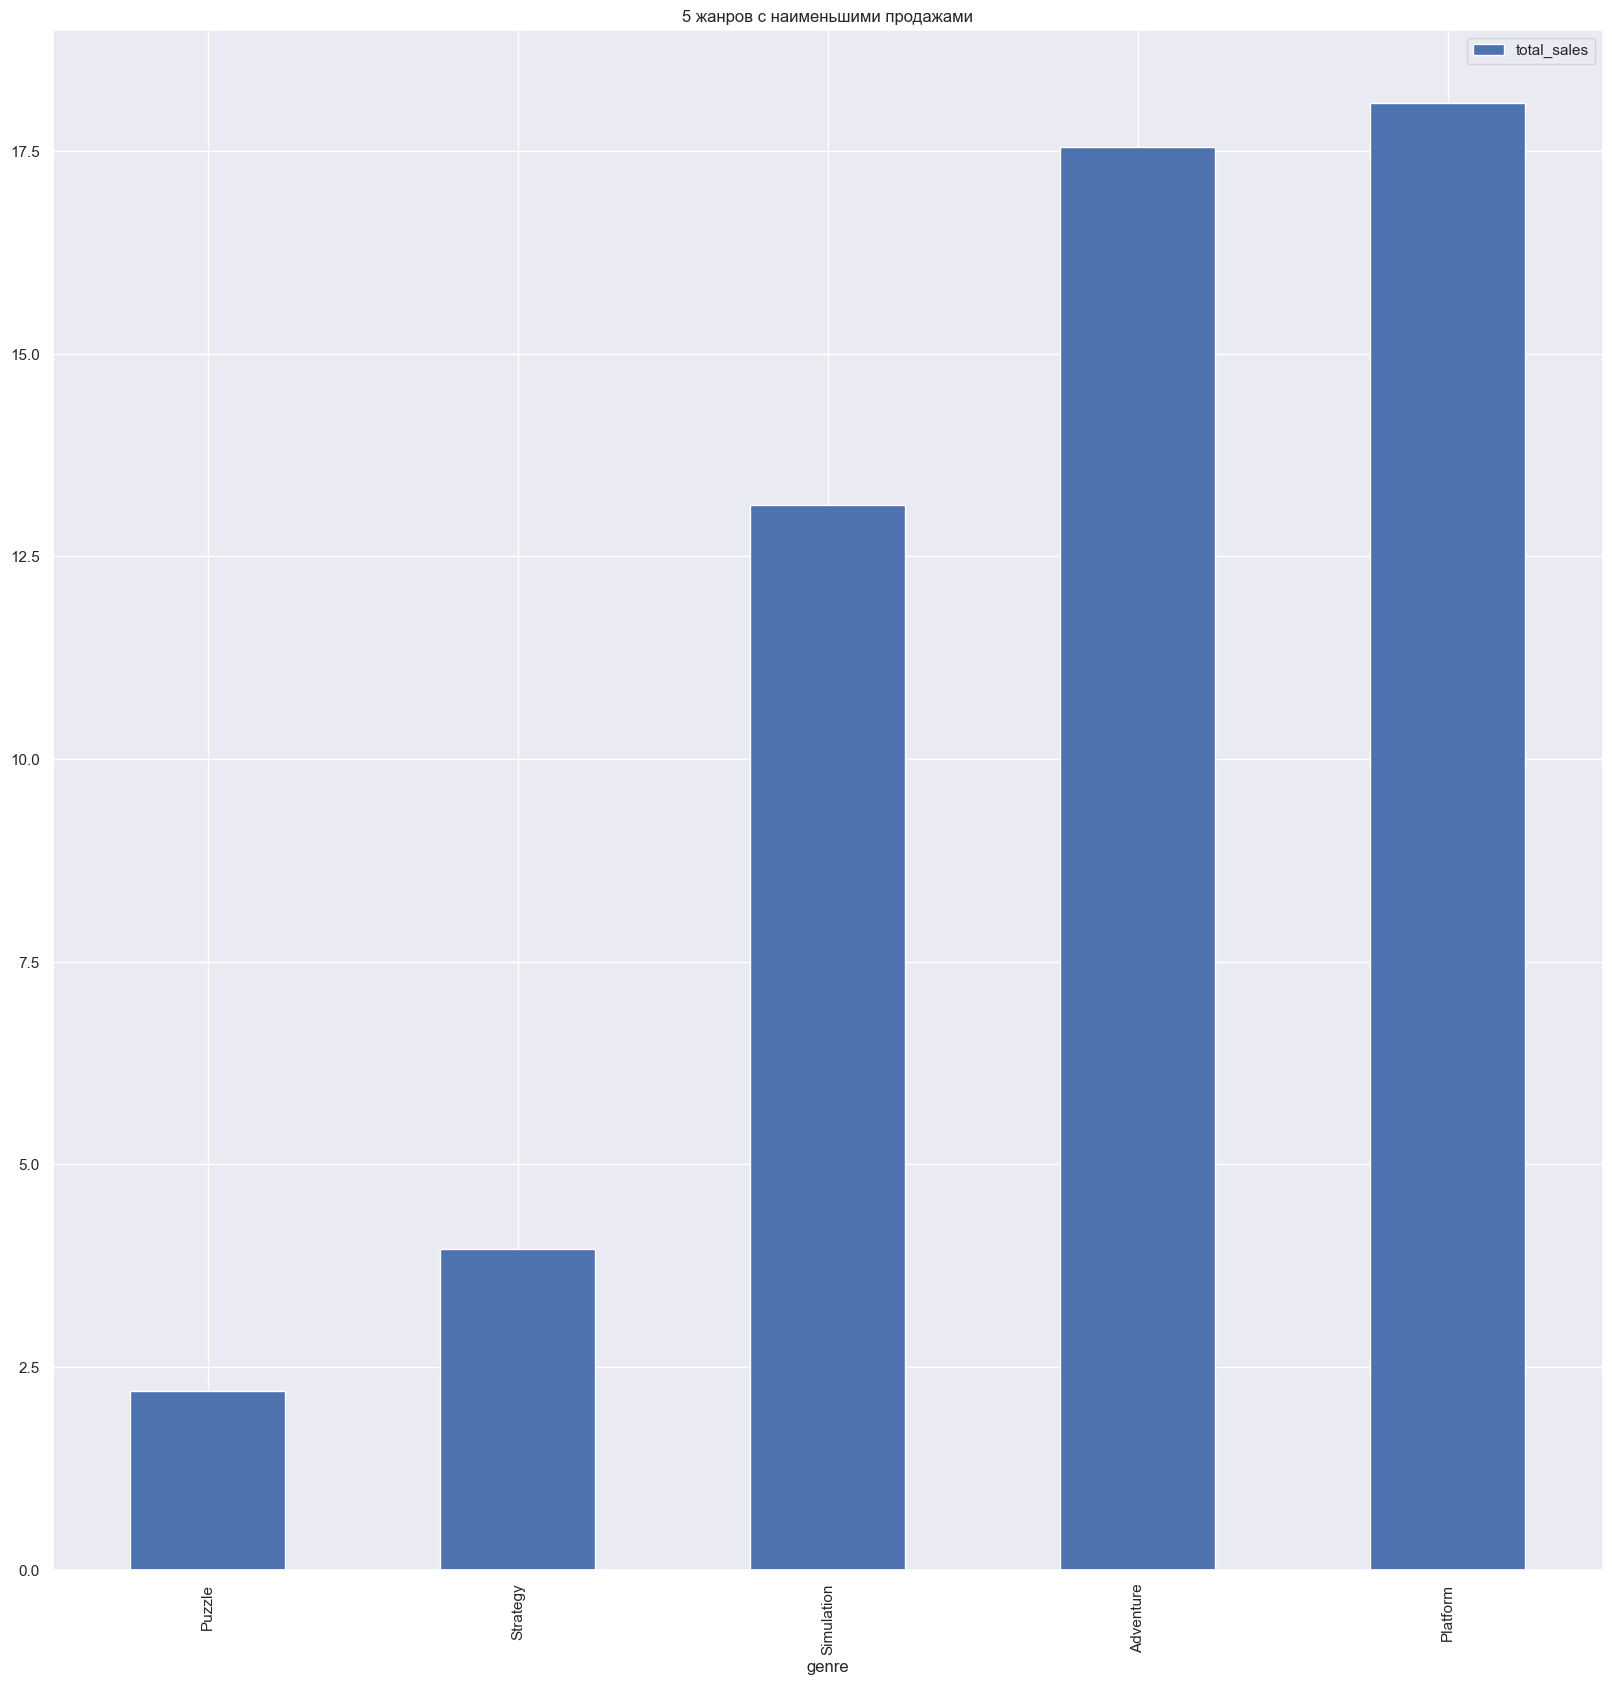

In [43]:
data_actual.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(by='total_sales').head(5).plot(kind='bar', title='5 жанров с наименьшими продажами')

Вывод: наименьшие продажи у Puzzle, Strategy, Simulation, Adventure, Platform

<Axes: title={'center': 'Топ 5 прибыльных жанров'}, xlabel='genre'>

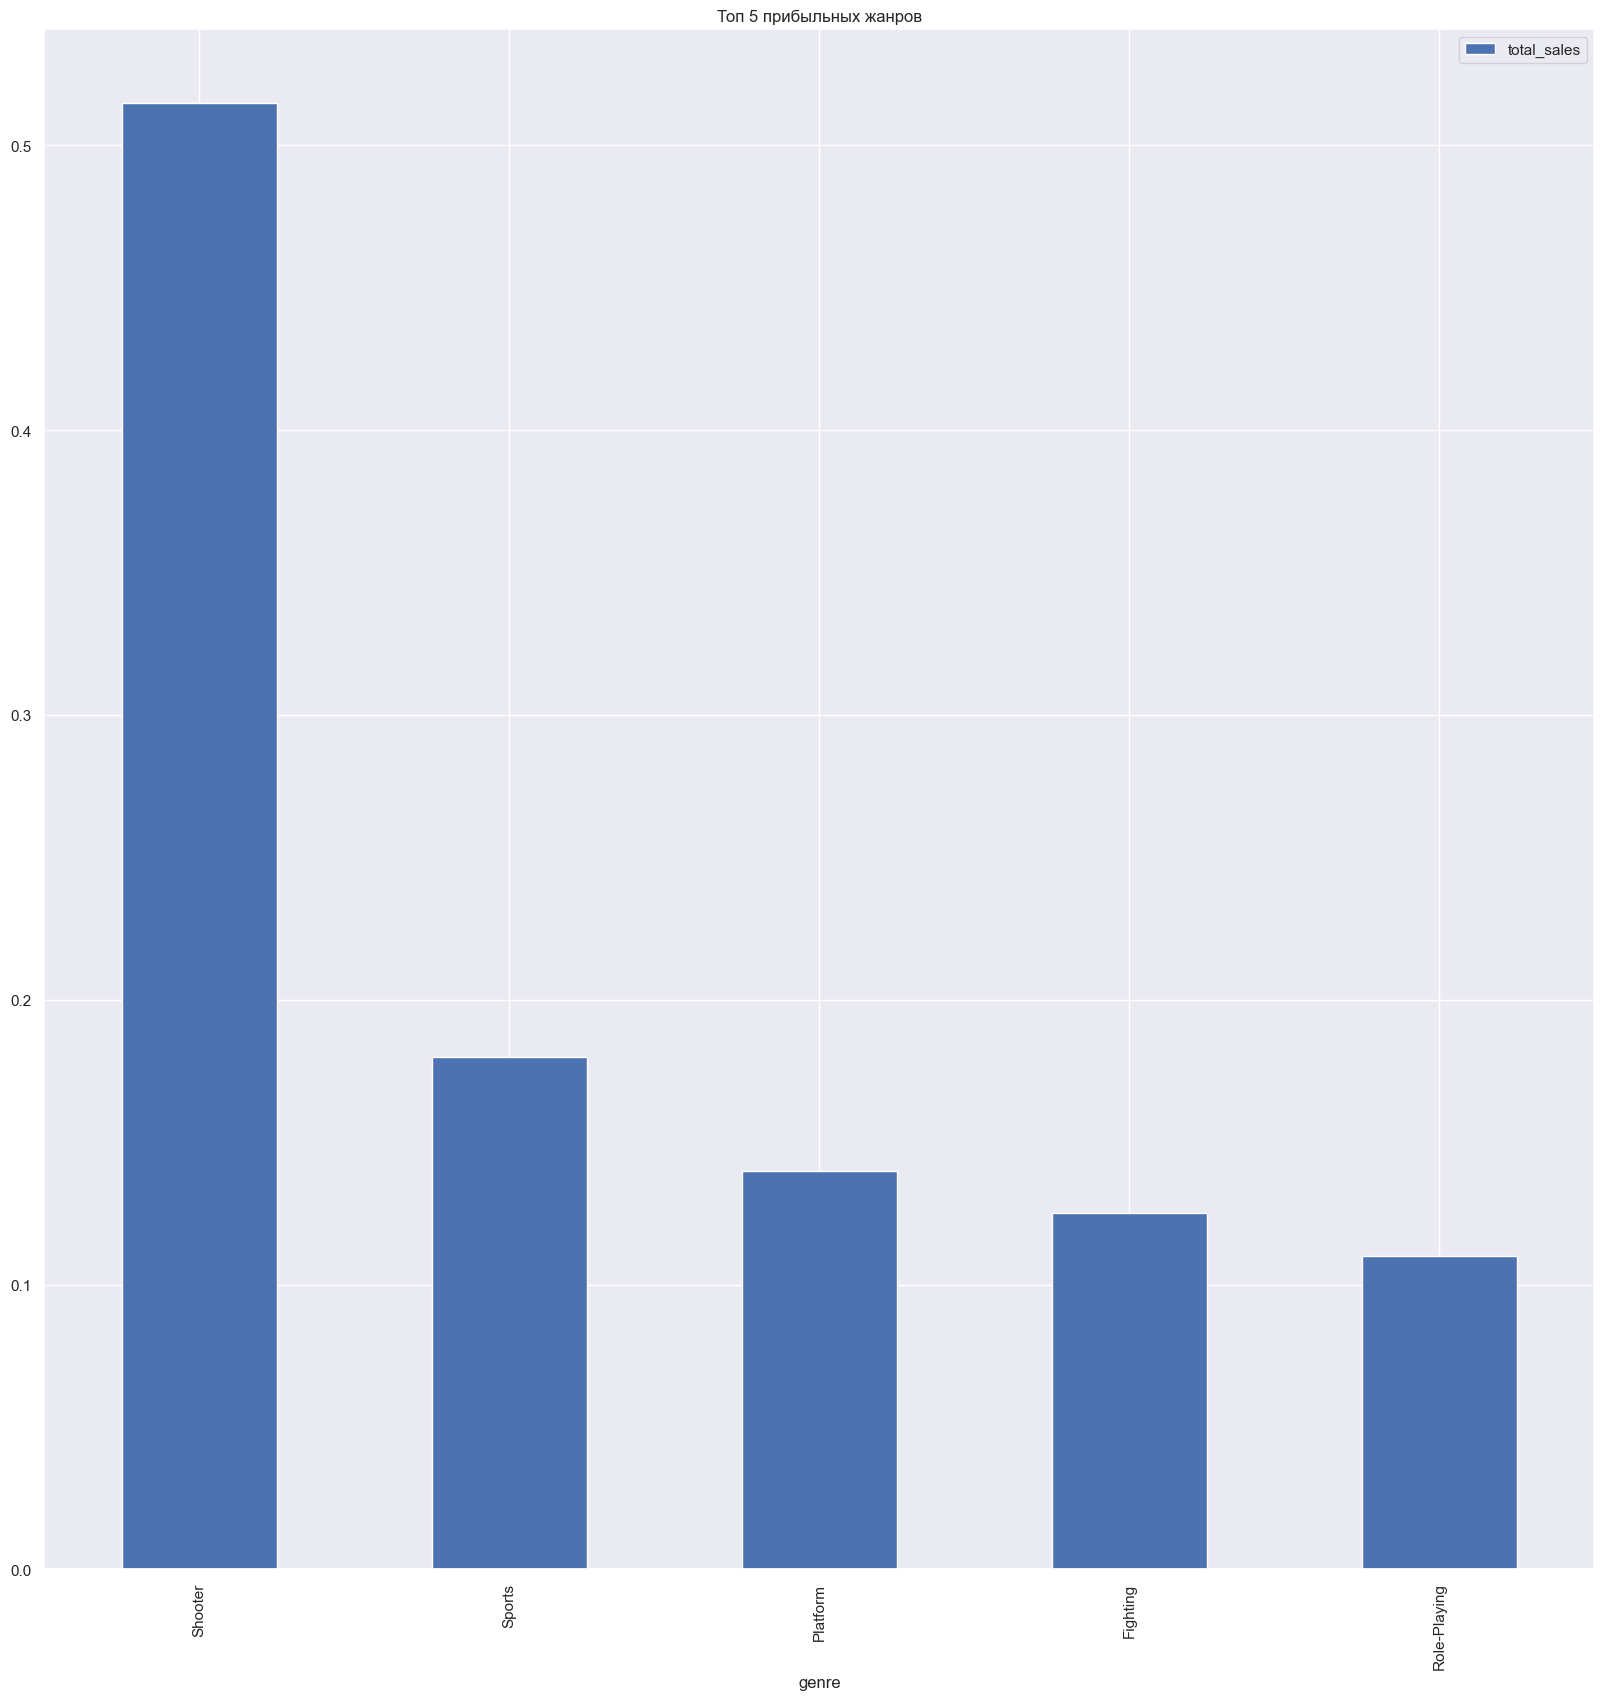

In [44]:
#возьмем для графиков медианные продажи
data_actual.groupby(['genre']).agg({'total_sales':'median'}).sort_values(by='total_sales', ascending=False).head(5).plot(kind='bar', title='Топ 5 прибыльных жанров')

<Axes: title={'center': '5 жанров с наименьшими продажами'}, xlabel='genre'>

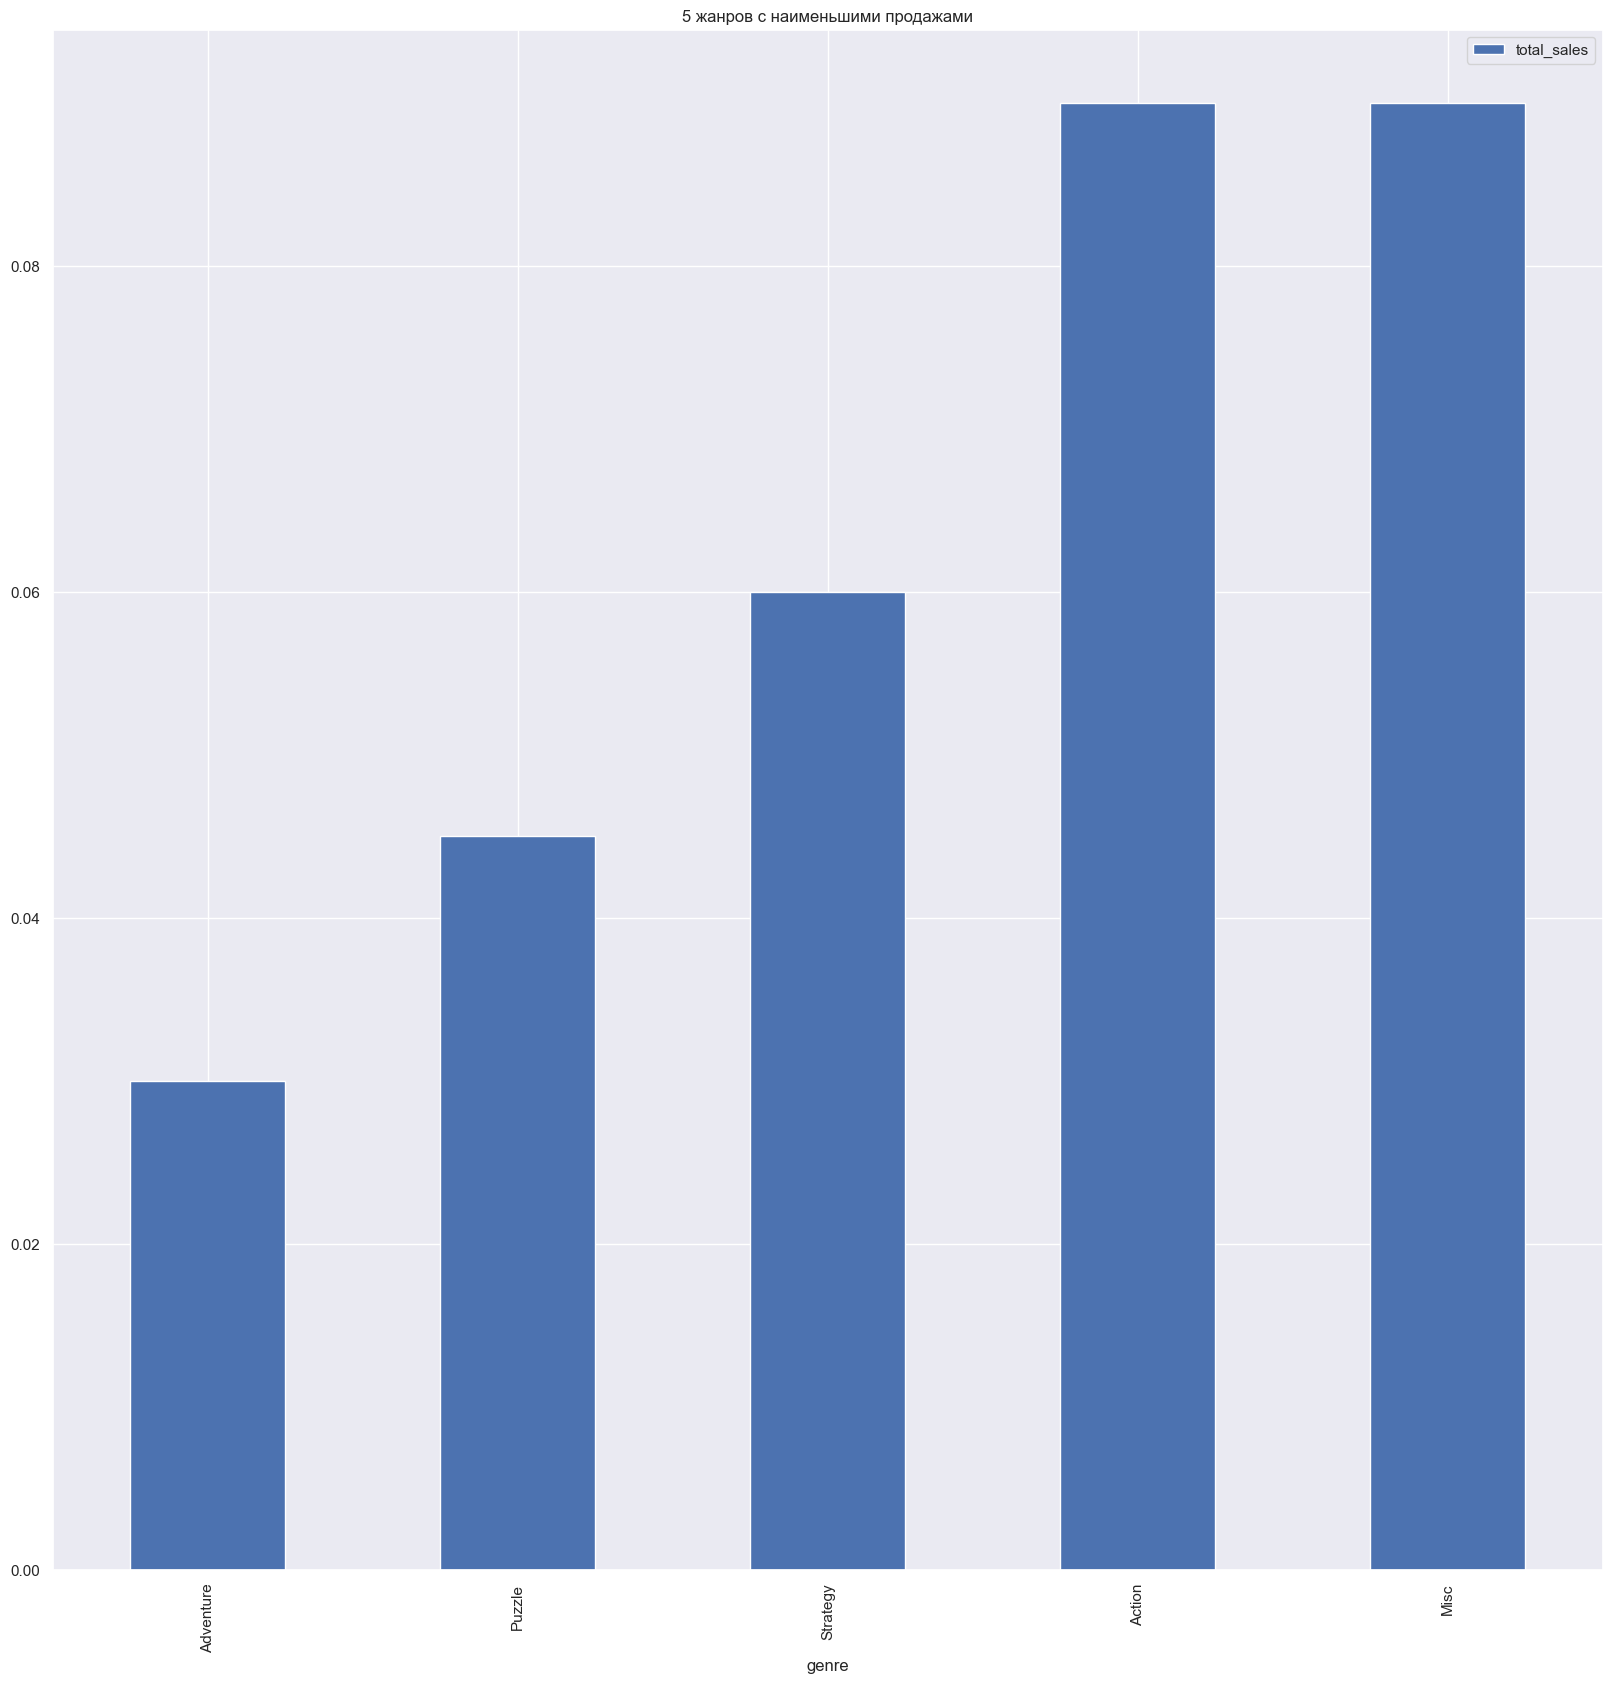

In [45]:
data_actual.groupby(['genre']).agg({'total_sales':'median'}).sort_values(by='total_sales').head(5).plot(kind='bar', title='5 жанров с наименьшими продажами')

Составьте портрет пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

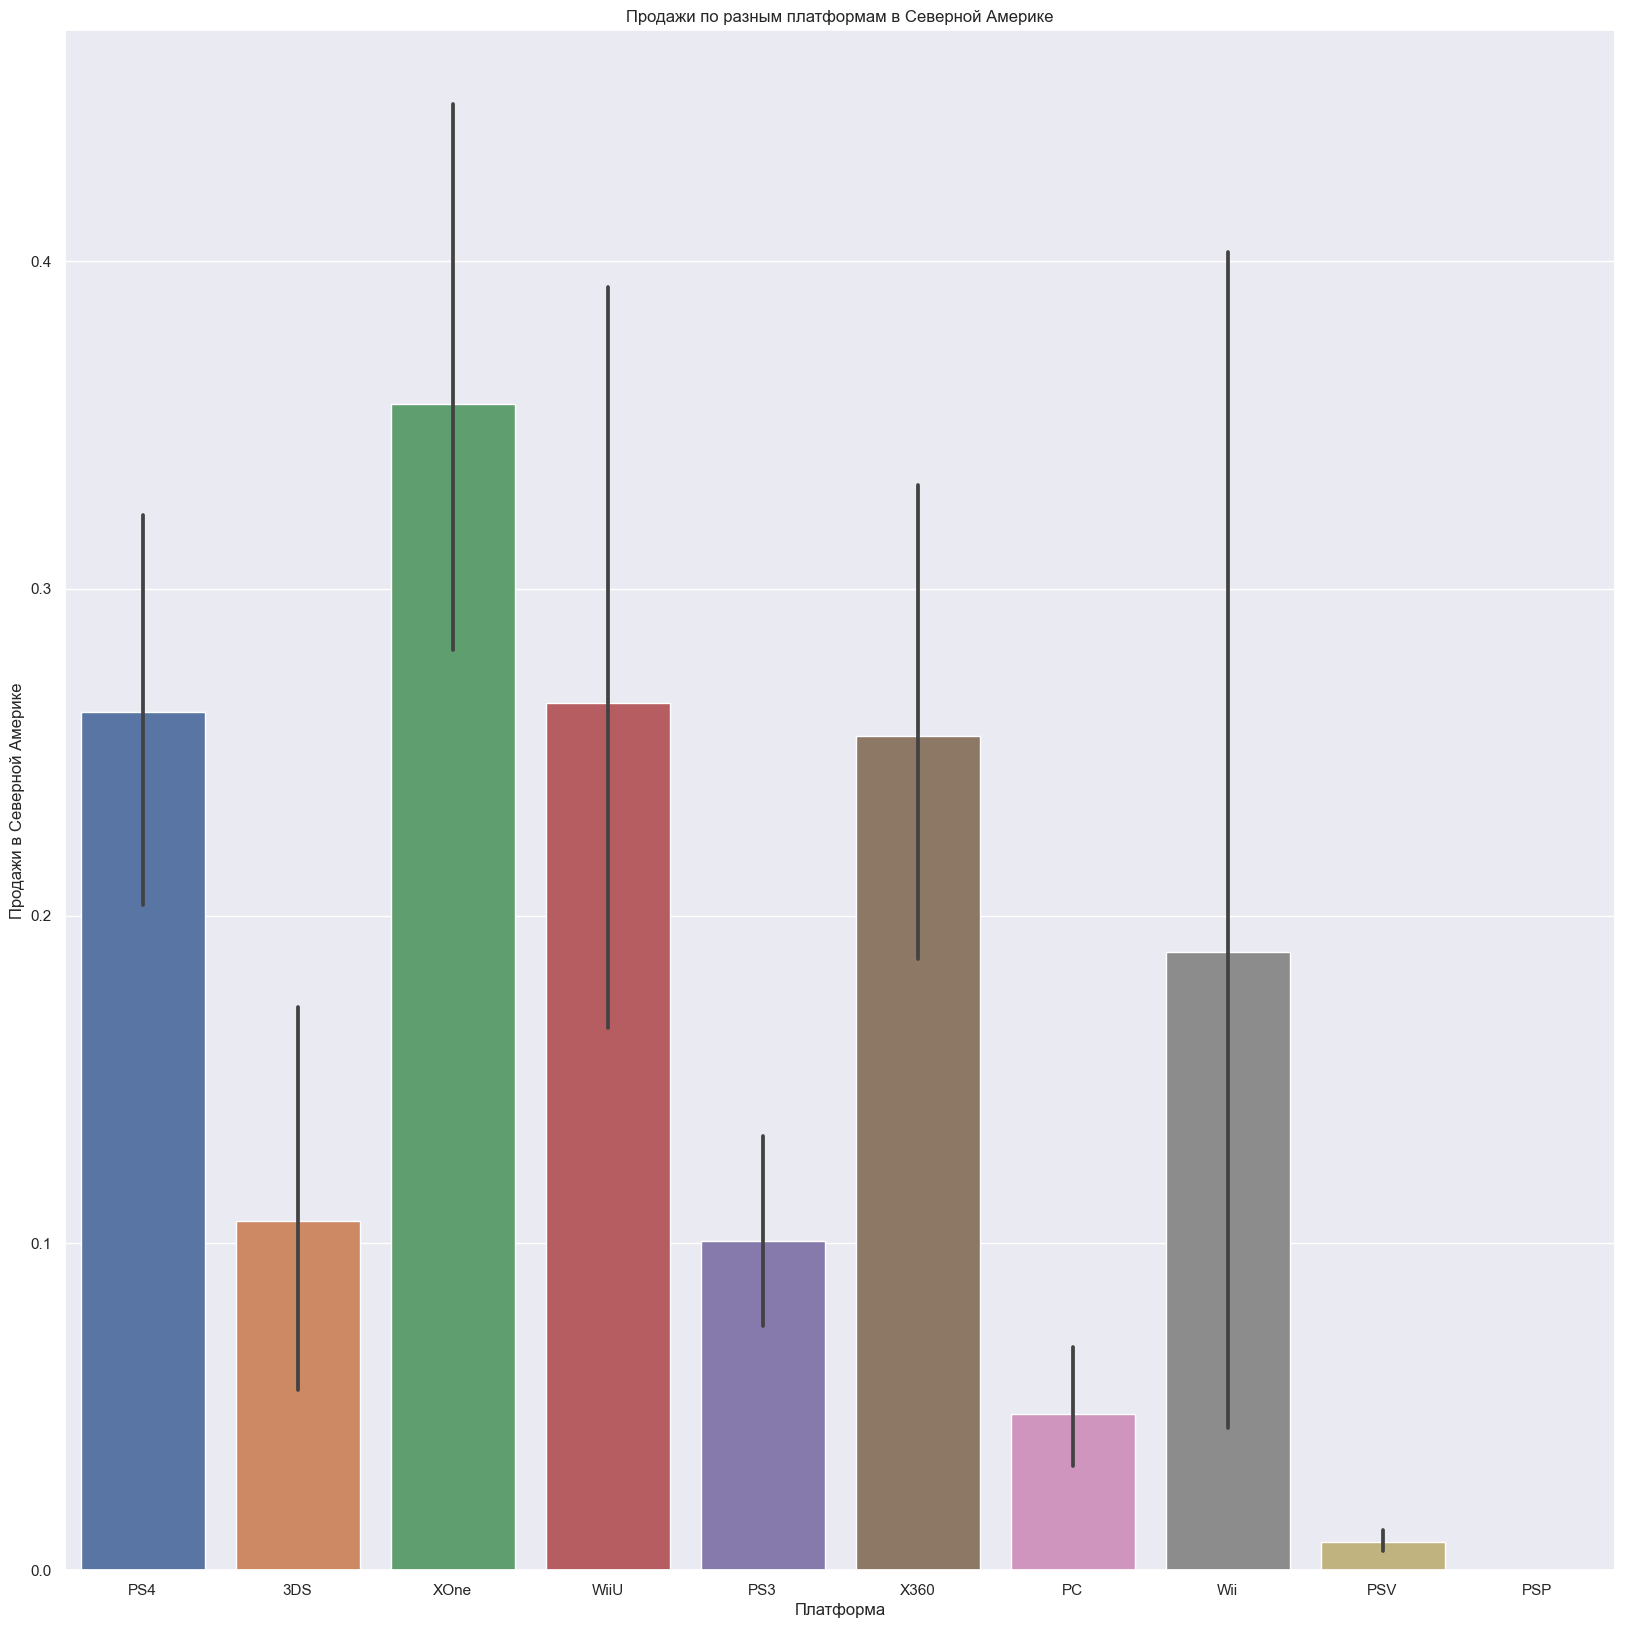

In [46]:
ax = sns.barplot(data=data_actual,x='platform', y='na_sales')

ax.set_title('Продажи по разным платформам в Северной Америке')
ax.set(xlabel='Платформа', ylabel='Продажи в Северной Америке');

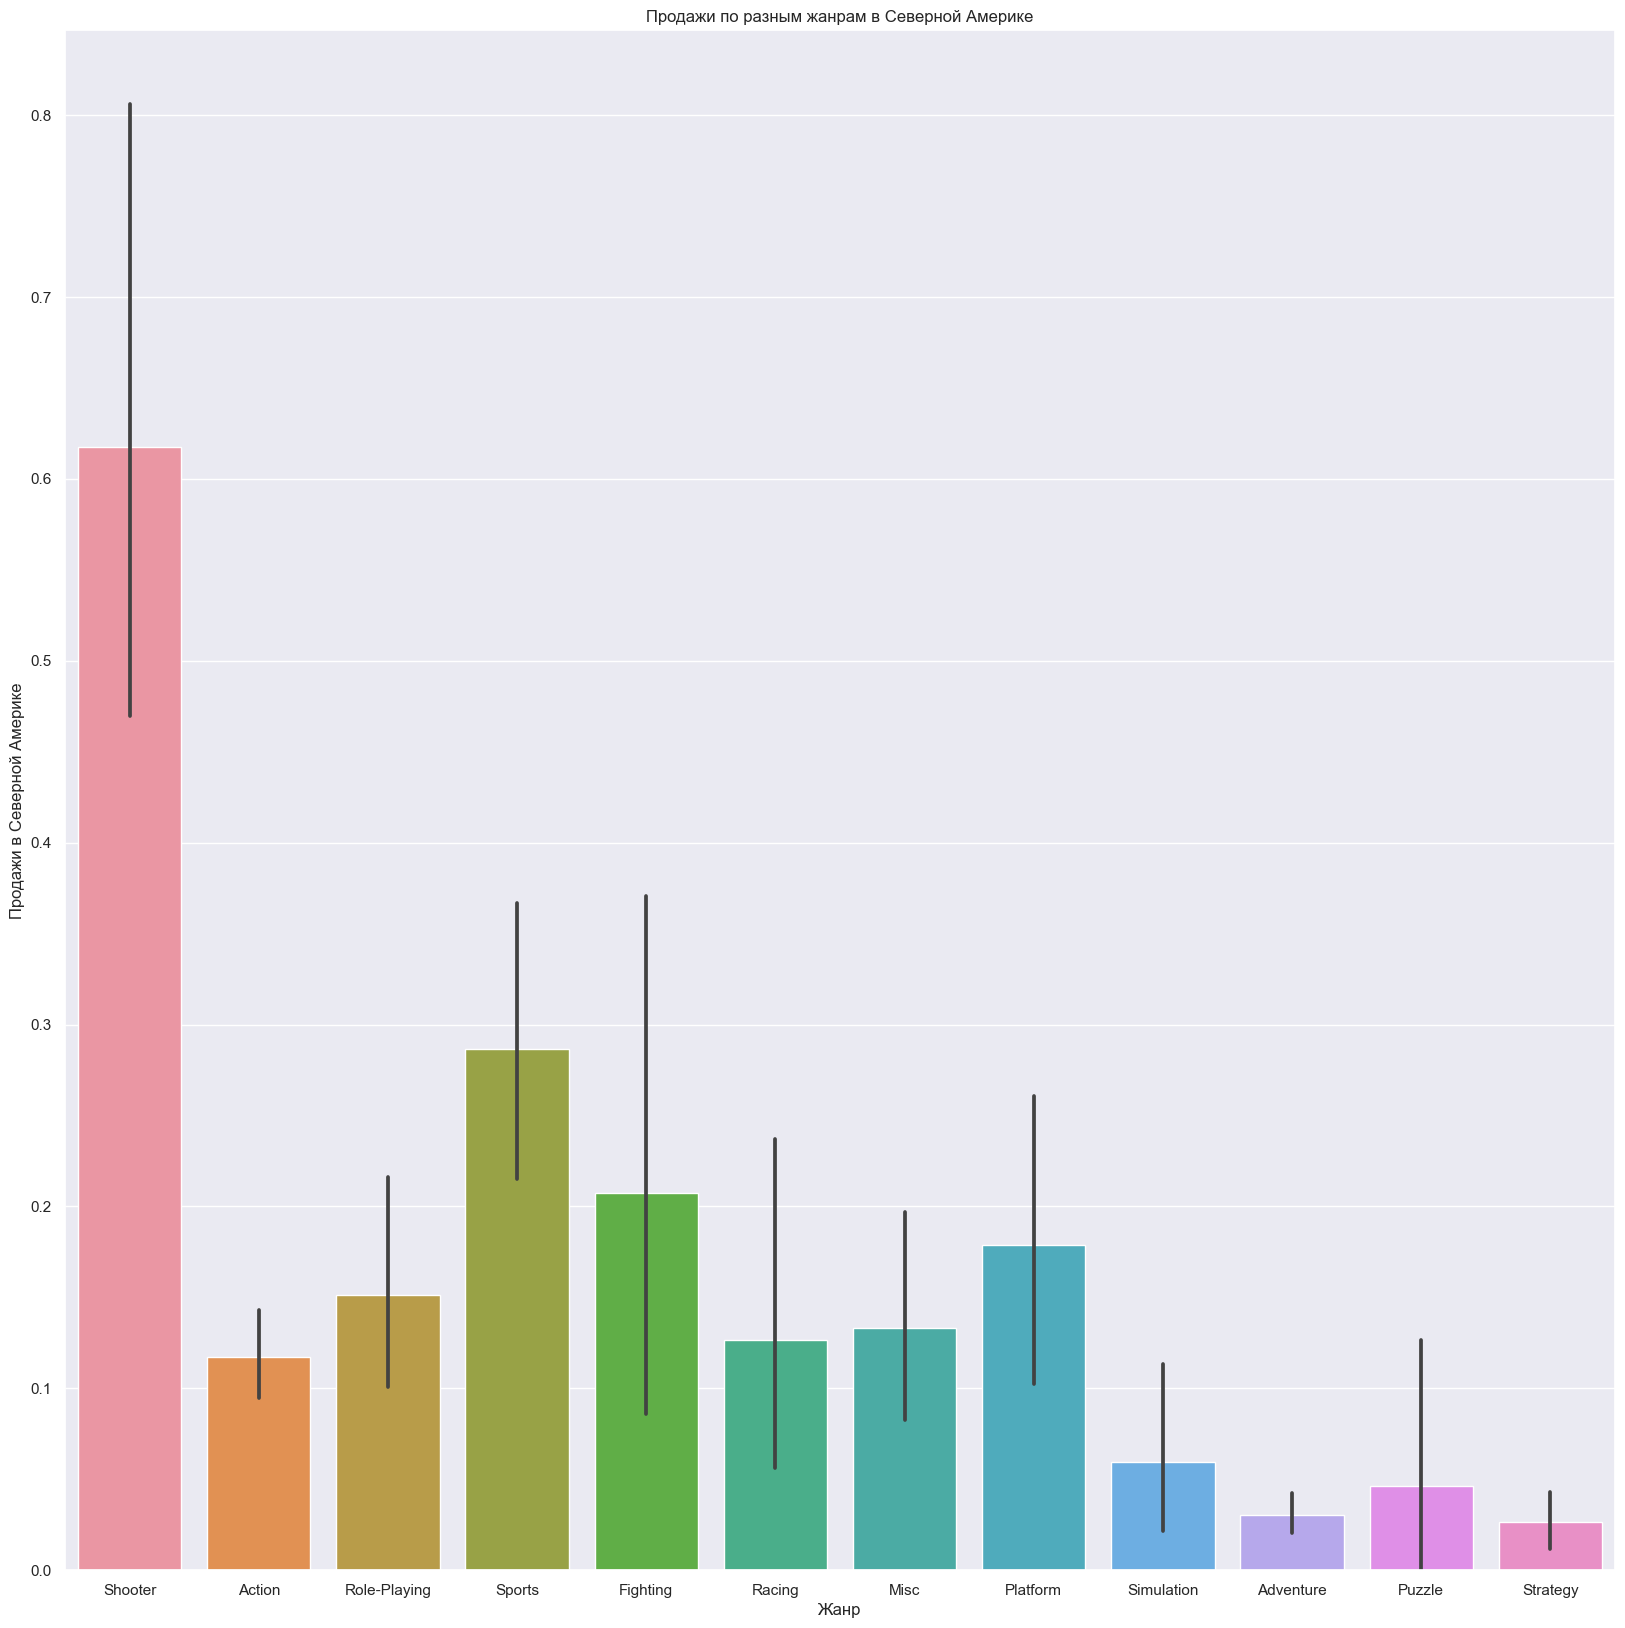

In [47]:
ax = sns.barplot(data=data_actual,x='genre', y='na_sales')

ax.set_title('Продажи по разным жанрам в Северной Америке')
ax.set(xlabel='Жанр', ylabel='Продажи в Северной Америке');

<Axes: title={'center': 'Зависимость продаж от рейтинга в Северной Америке'}, xlabel='rating'>

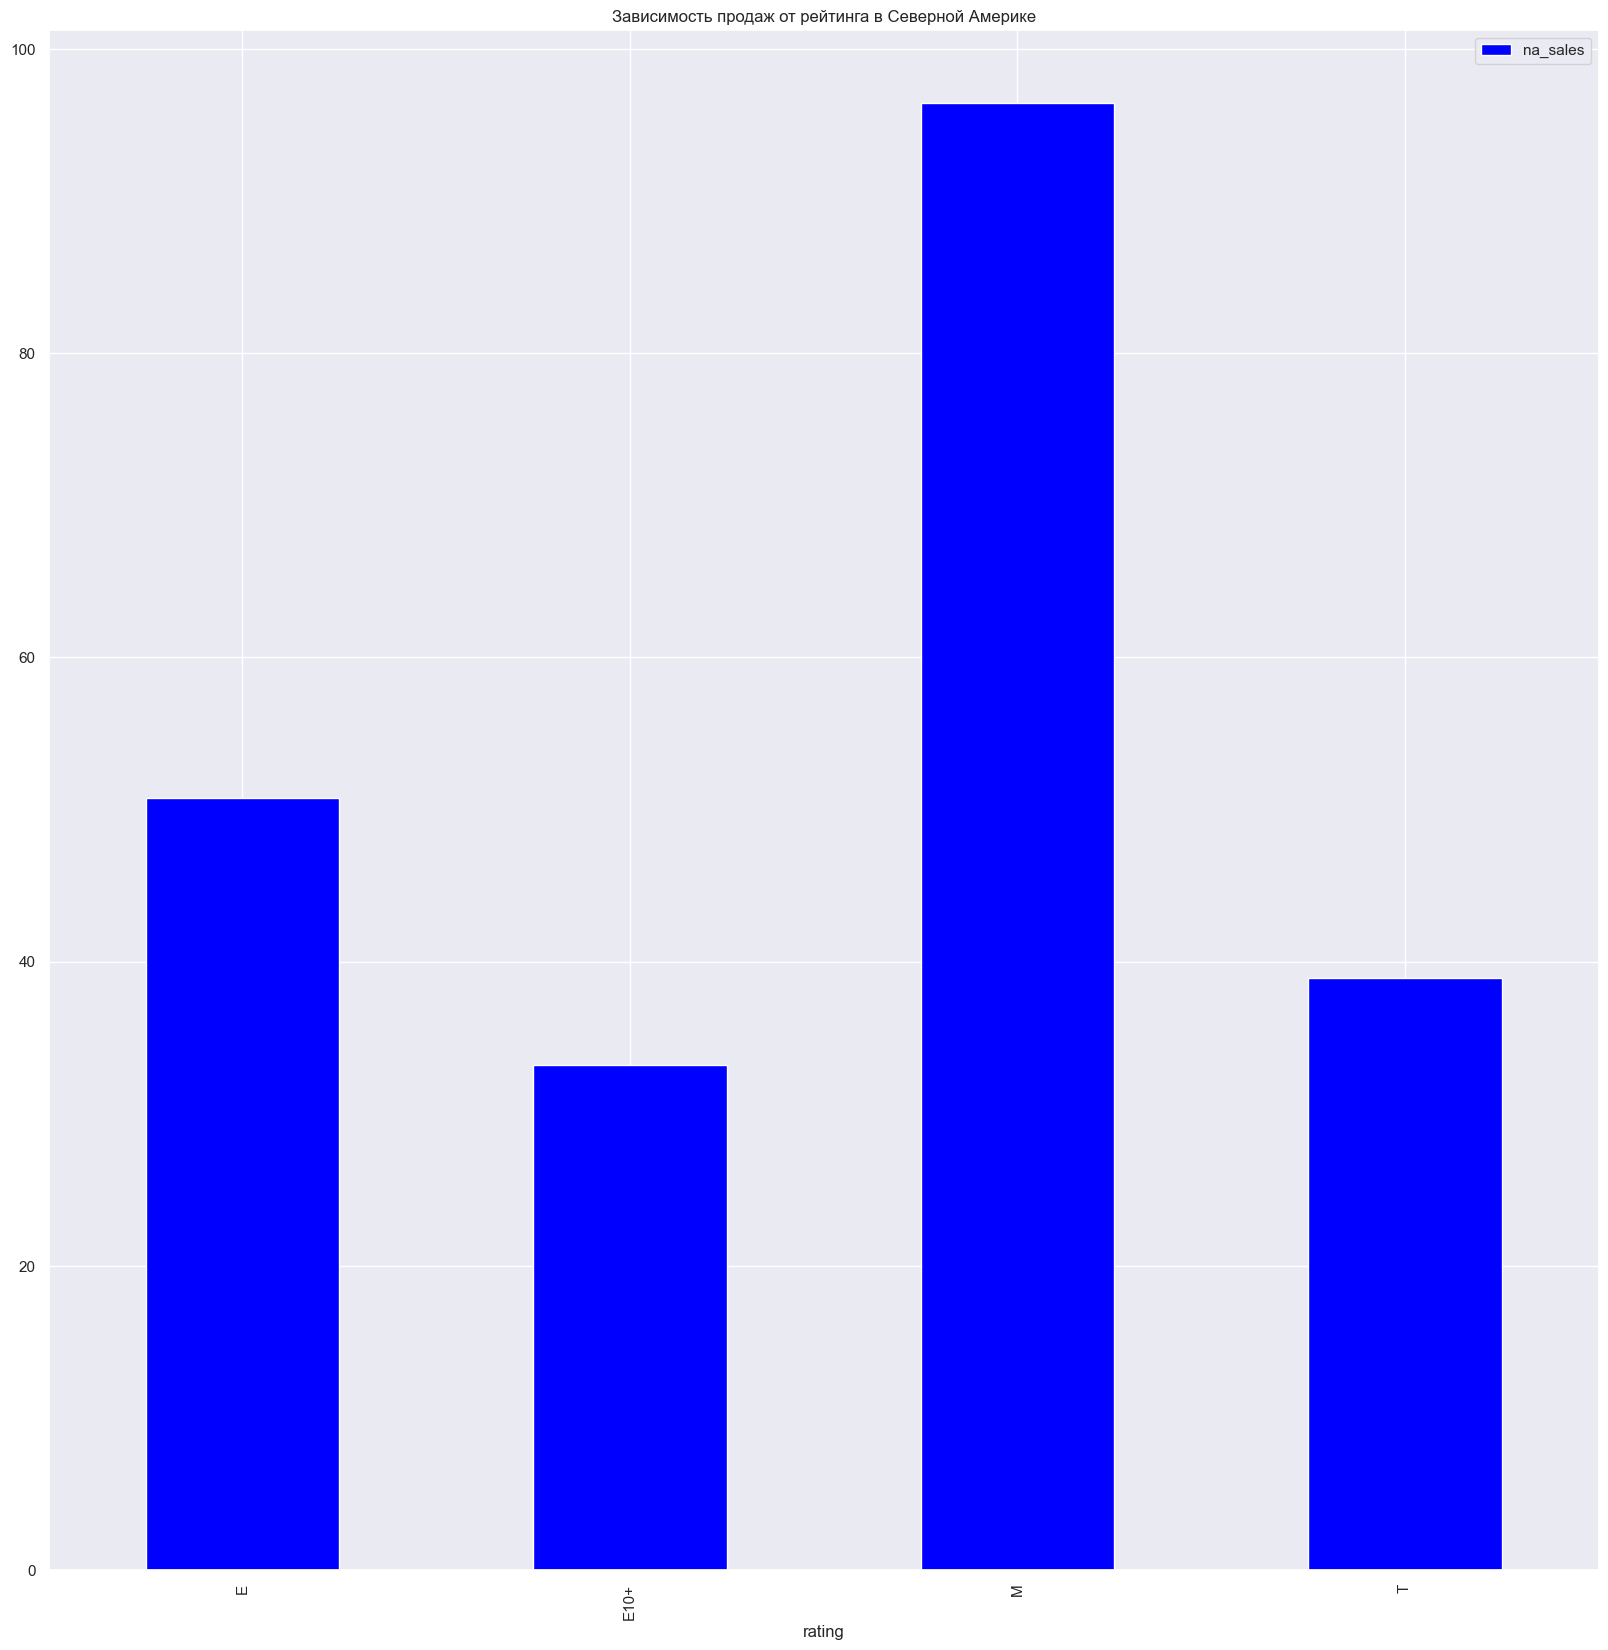

In [48]:
data_actual.groupby(['rating']).agg({'na_sales':'sum'}).plot(kind='bar', color='blue', title='Зависимость продаж от рейтинга в Северной Америке')

Игрок Северной Америки старше 17 лет, играет на XOne или на WiiU, его любимые жанры стрелялки, игры с драками и видами спорта. 

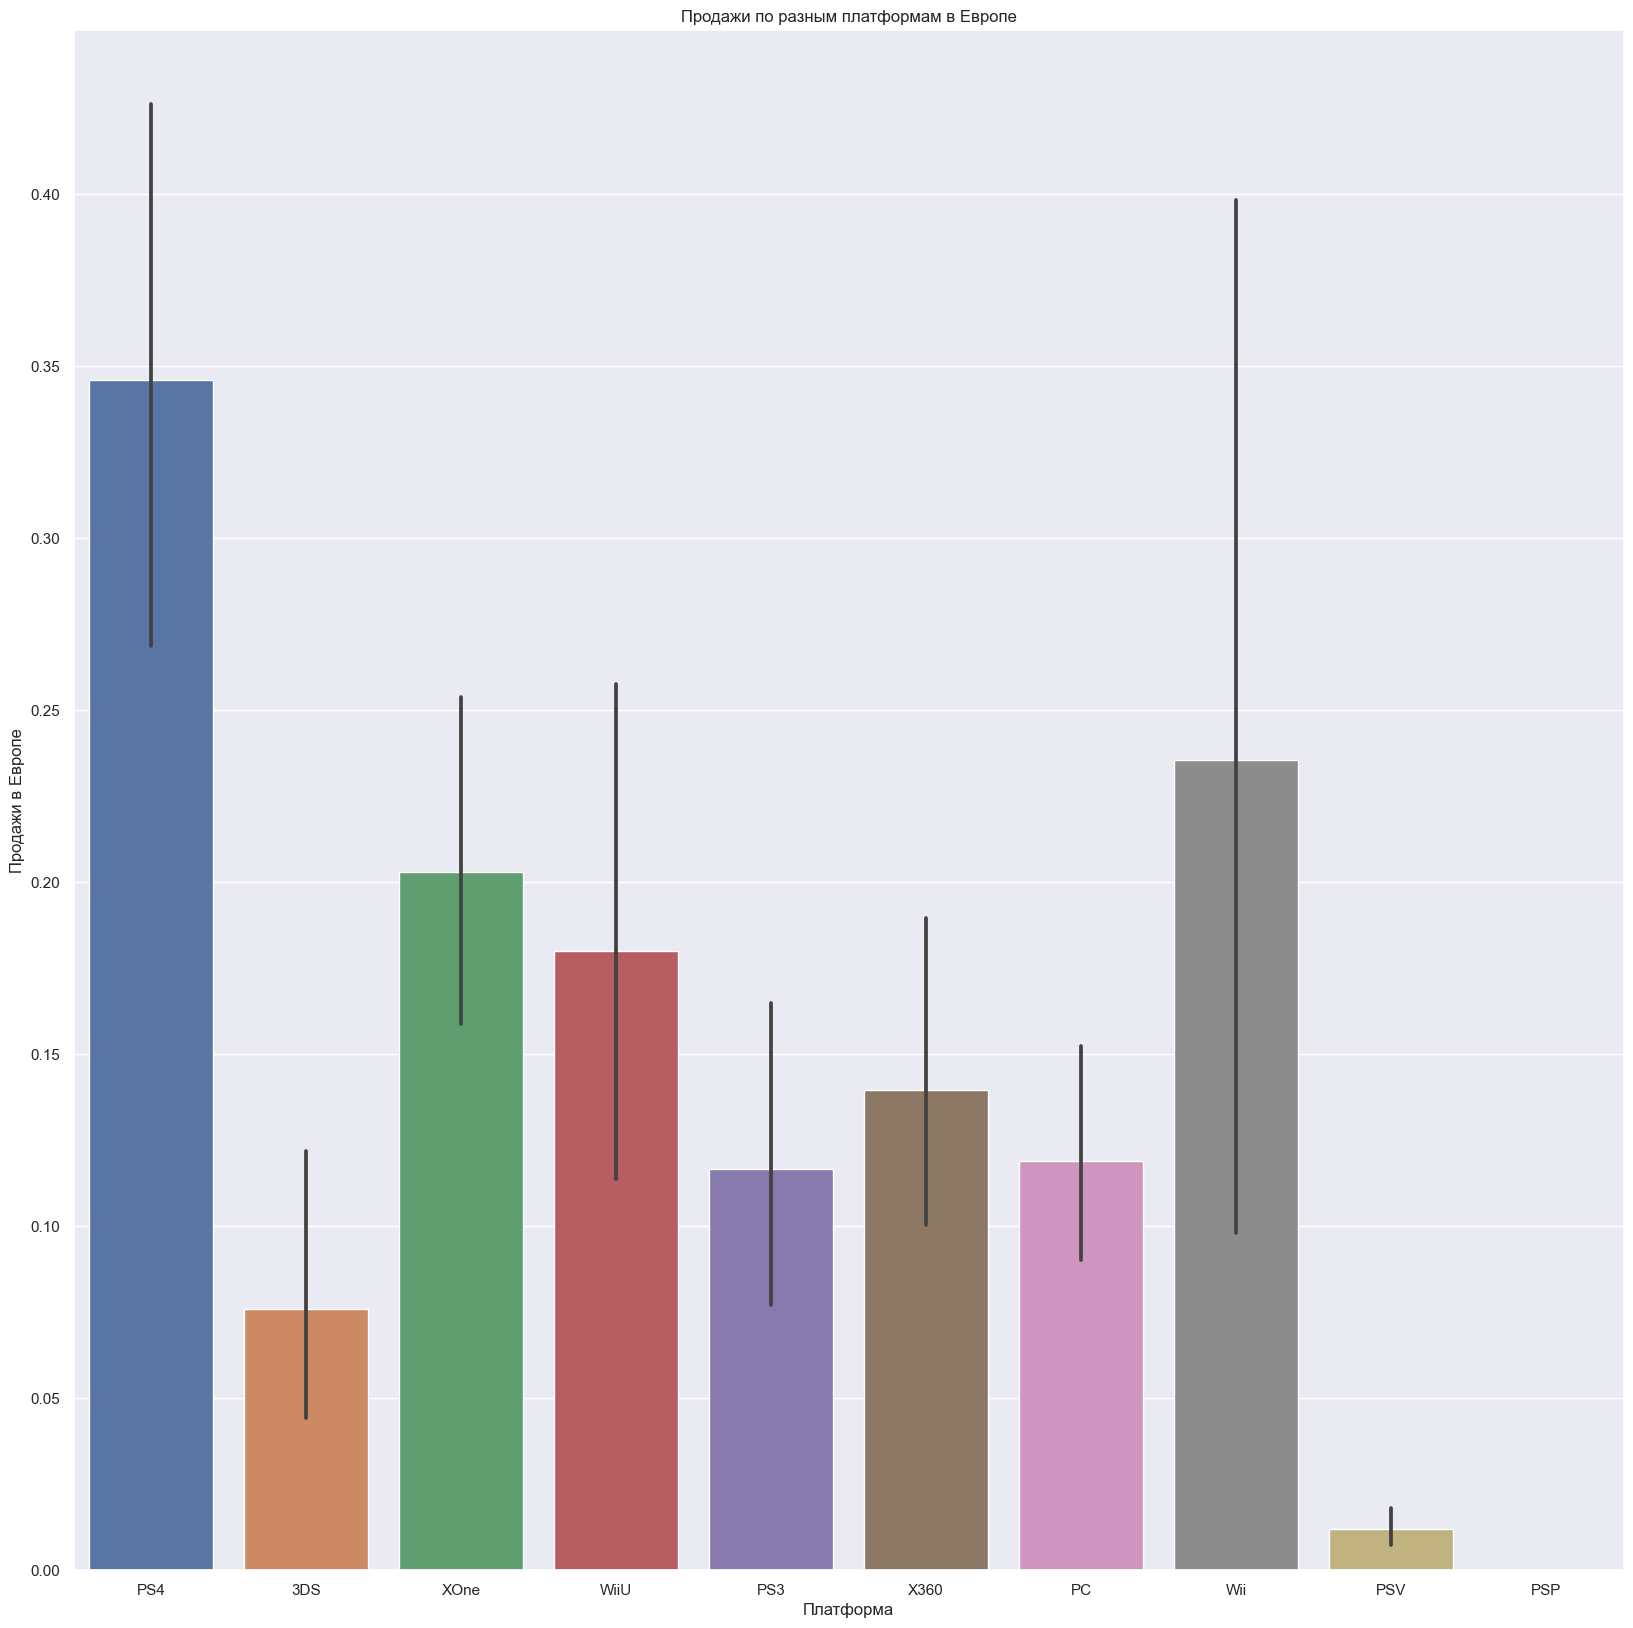

In [49]:
ax = sns.barplot(data=data_actual,x='platform', y='eu_sales')

ax.set_title('Продажи по разным платформам в Европе')
ax.set(xlabel='Платформа', ylabel='Продажи в Европе');

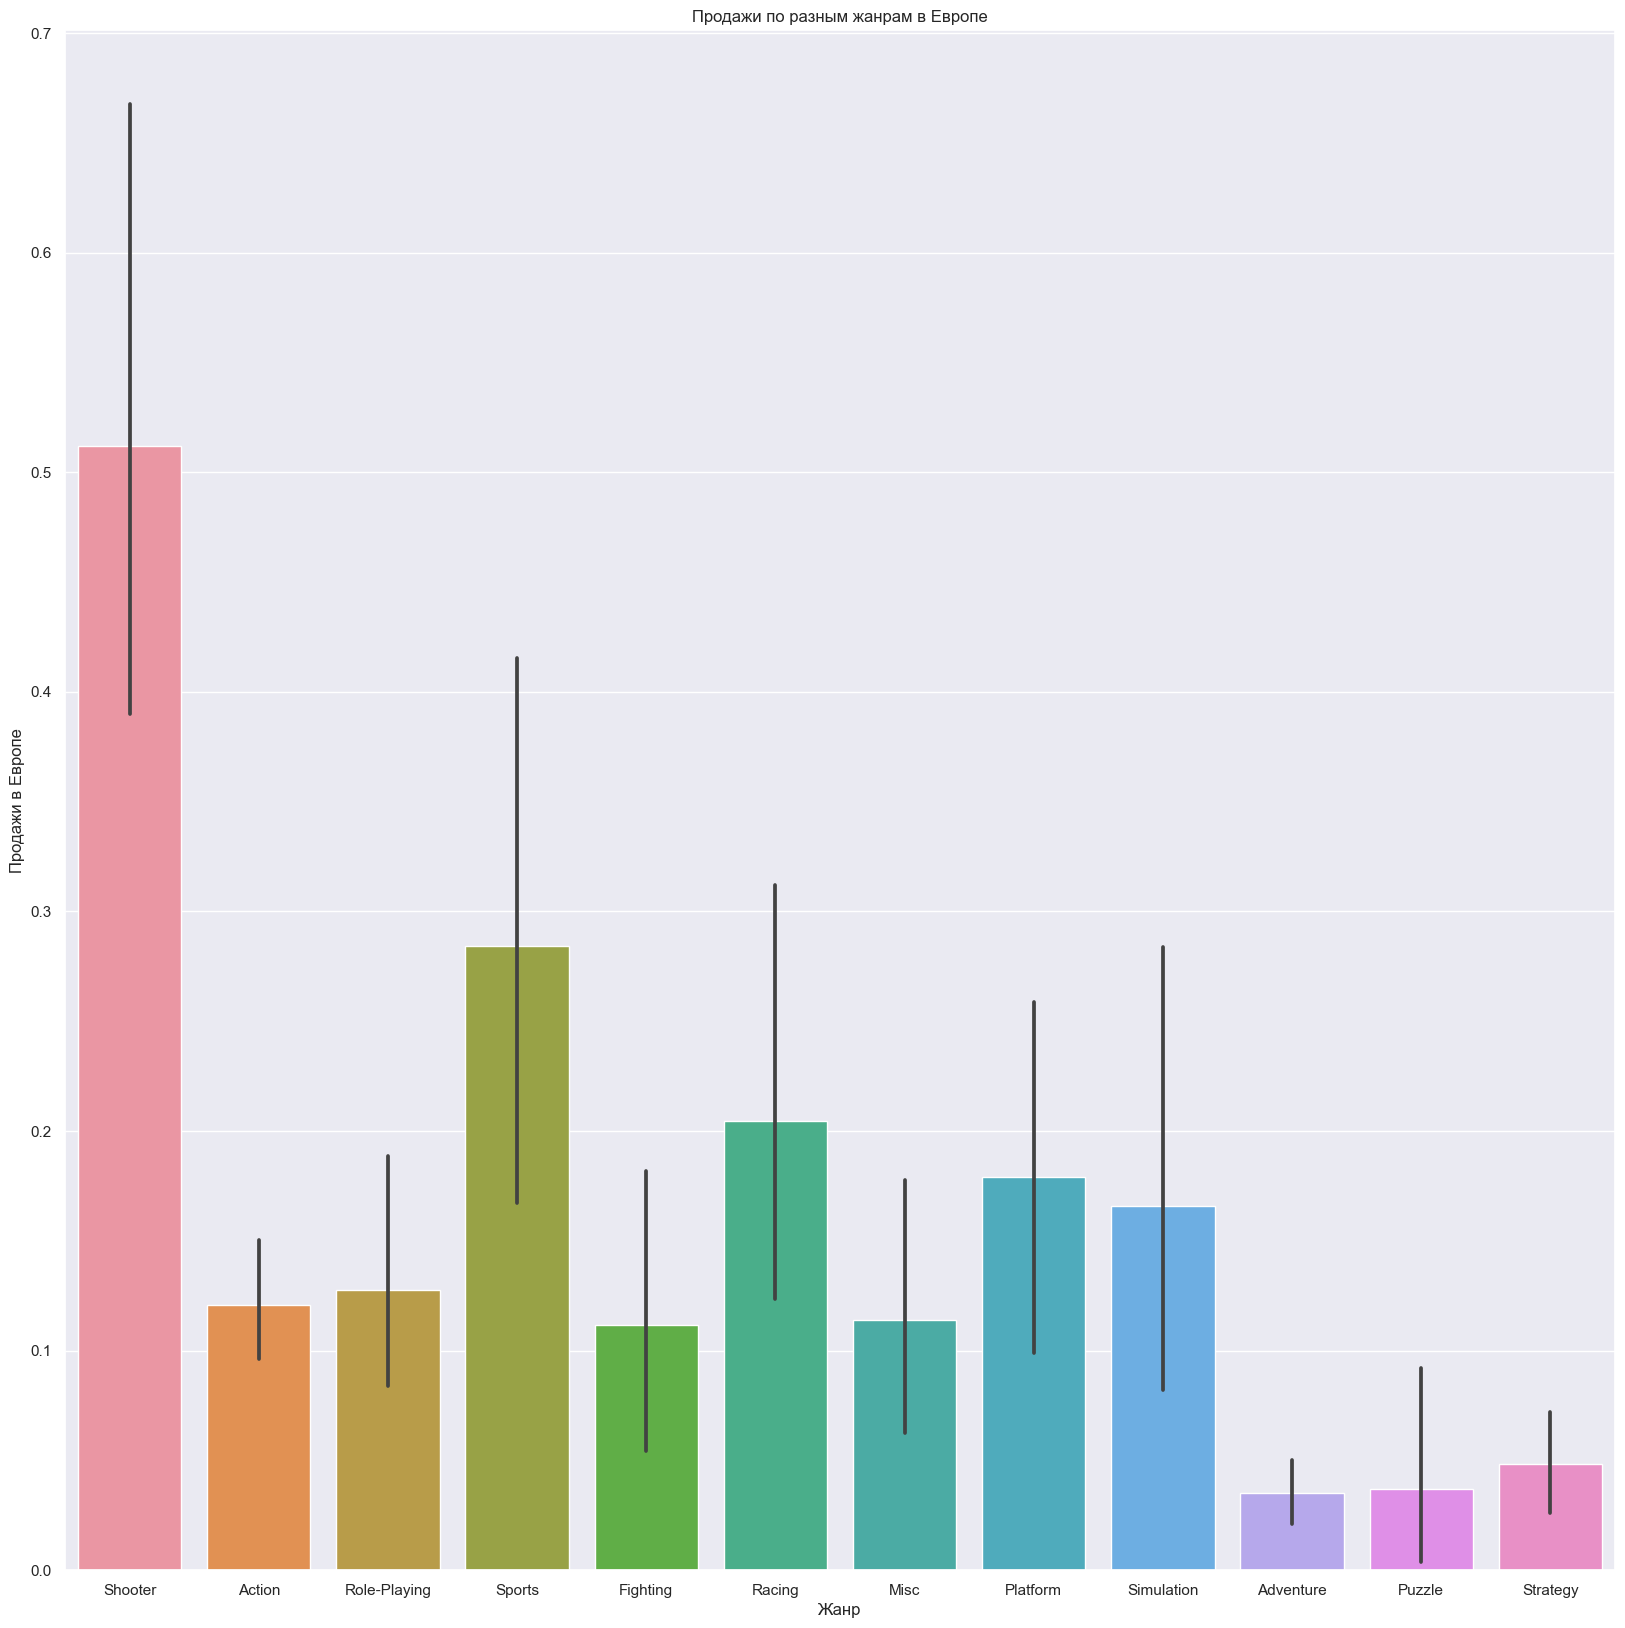

In [50]:
ax = sns.barplot(data=data_actual,x='genre', y='eu_sales')

ax.set_title('Продажи по разным жанрам в Европе')
ax.set(xlabel='Жанр', ylabel='Продажи в Европе');

<Axes: title={'center': 'Зависимость продаж от рейтинга в Европе'}, xlabel='rating'>

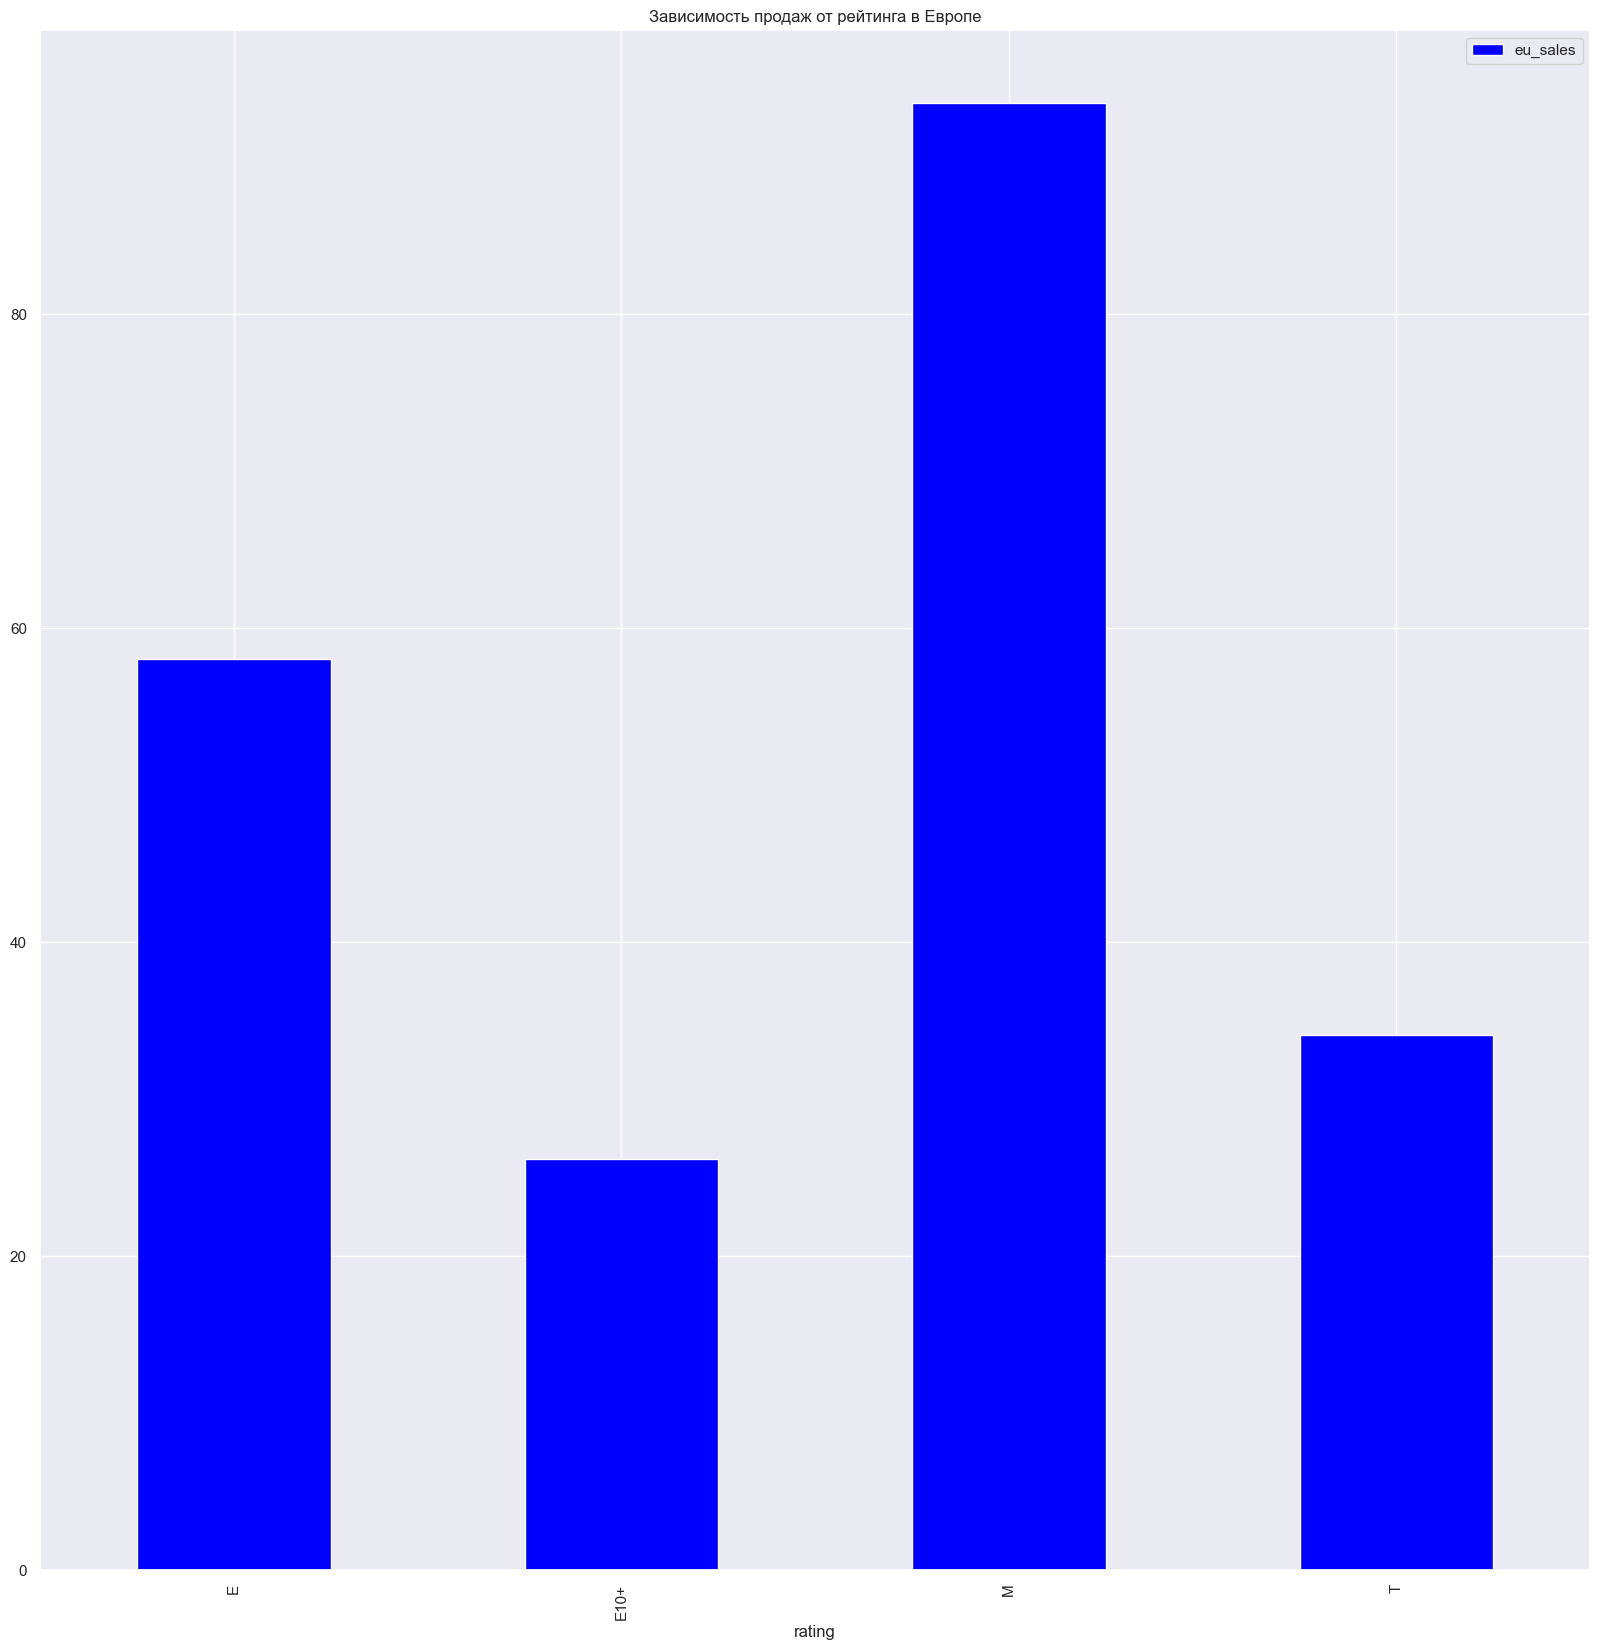

In [51]:
data_actual.groupby(['rating']).agg({'eu_sales':'sum'}).plot(kind='bar', color='blue', title='Зависимость продаж от рейтинга в Европе')

Игрок в Европе старше 17 лет, играет на PS4 или на Wii, его любимые жанры стрелялки и спортивные игры.

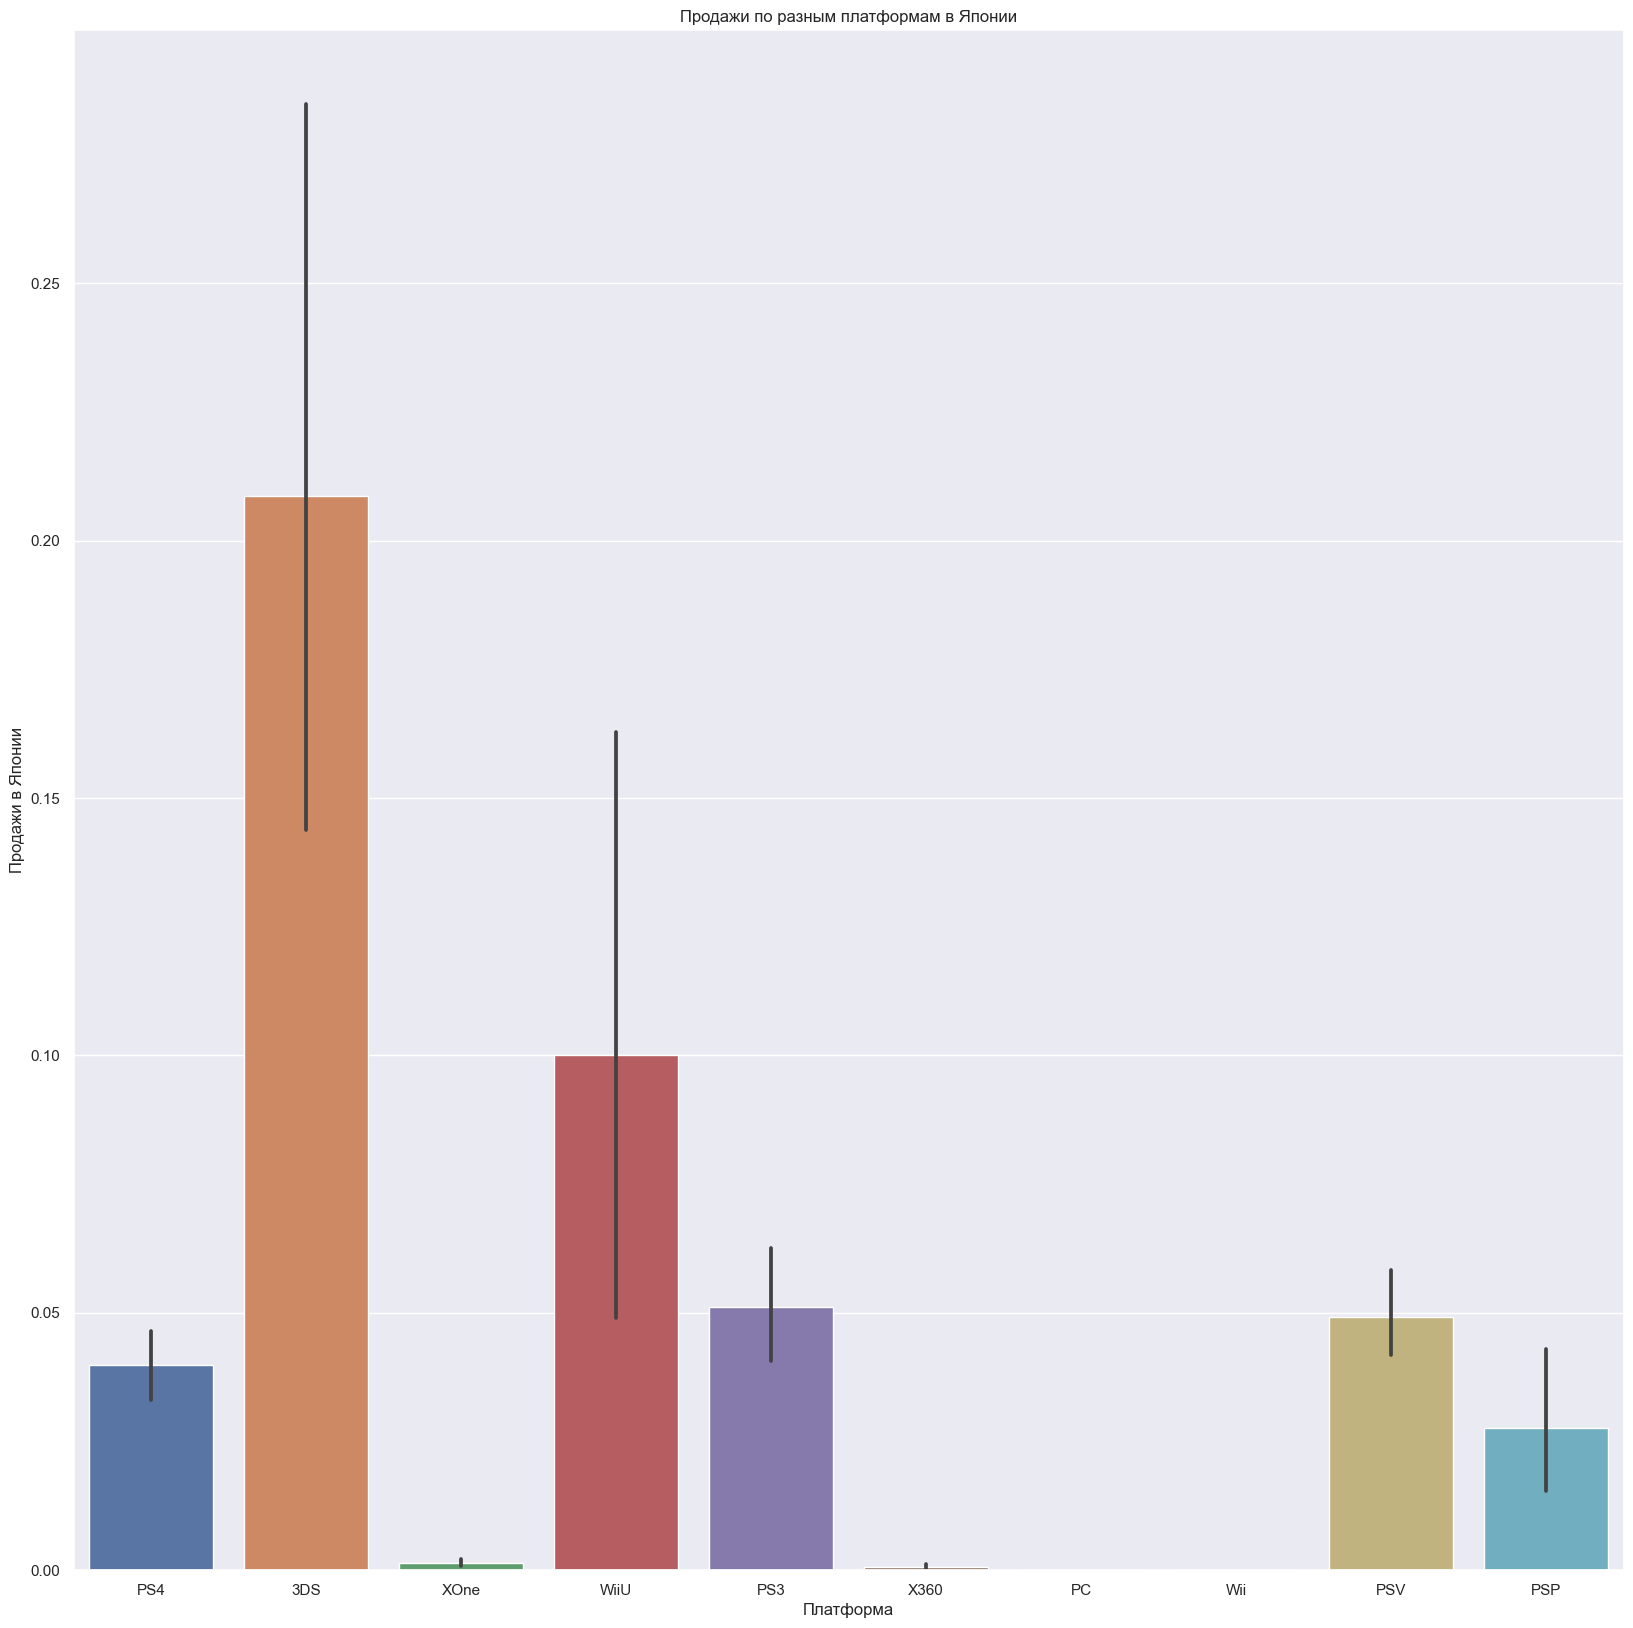

In [52]:
ax = sns.barplot(data=data_actual,x='platform', y='jp_sales')

ax.set_title('Продажи по разным платформам в Японии')
ax.set(xlabel='Платформа', ylabel='Продажи в Японии');

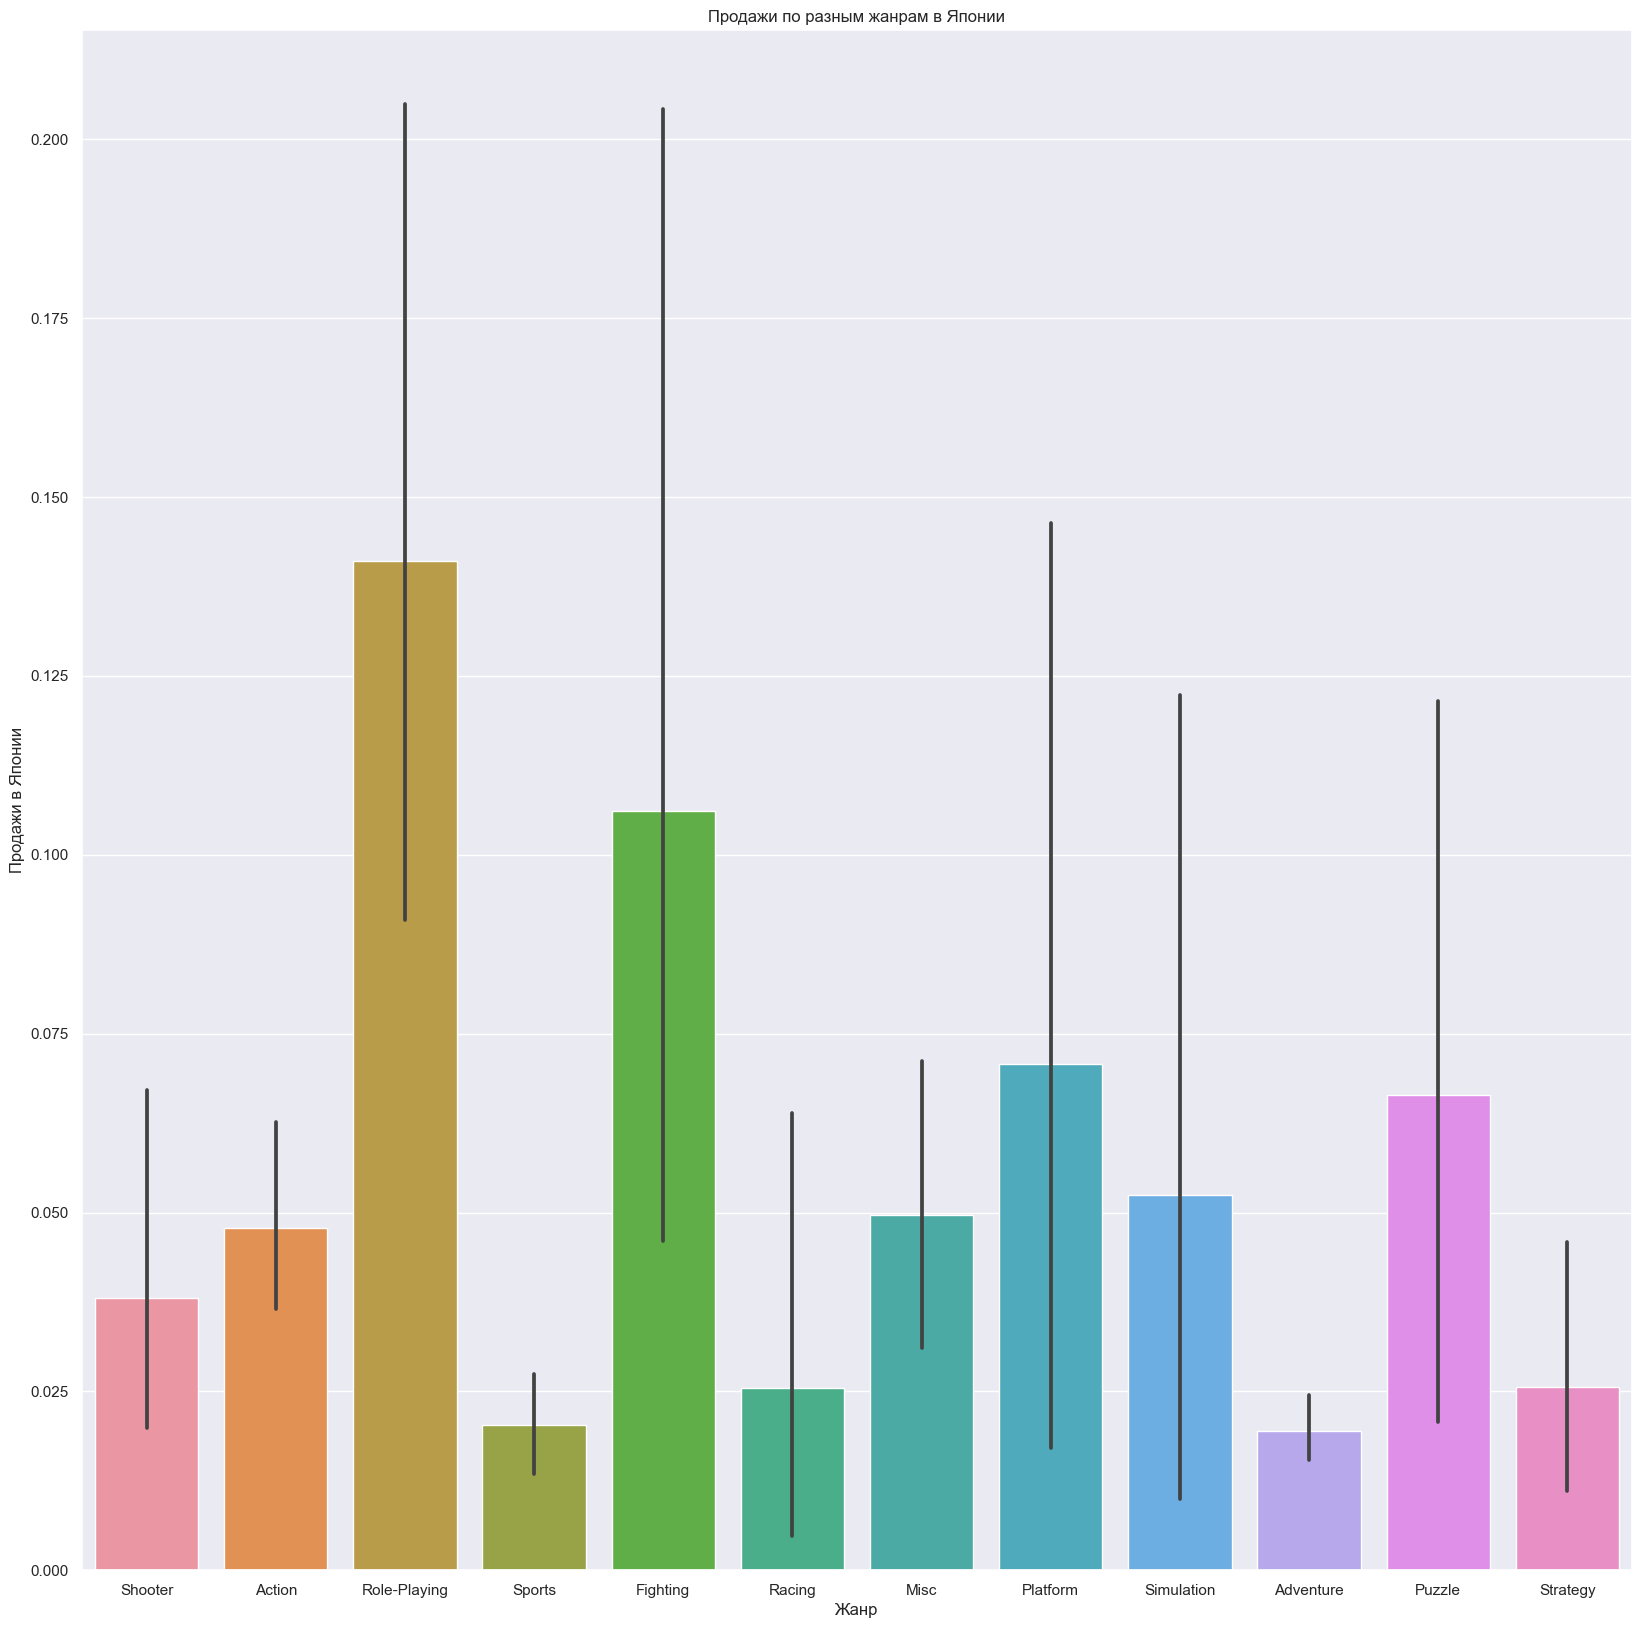

In [53]:
ax = sns.barplot(data=data_actual,x='genre', y='jp_sales')

ax.set_title('Продажи по разным жанрам в Японии')
ax.set(xlabel='Жанр', ylabel='Продажи в Японии');

<Axes: title={'center': 'Зависимость продаж от рейтинга в Японии'}, xlabel='rating'>

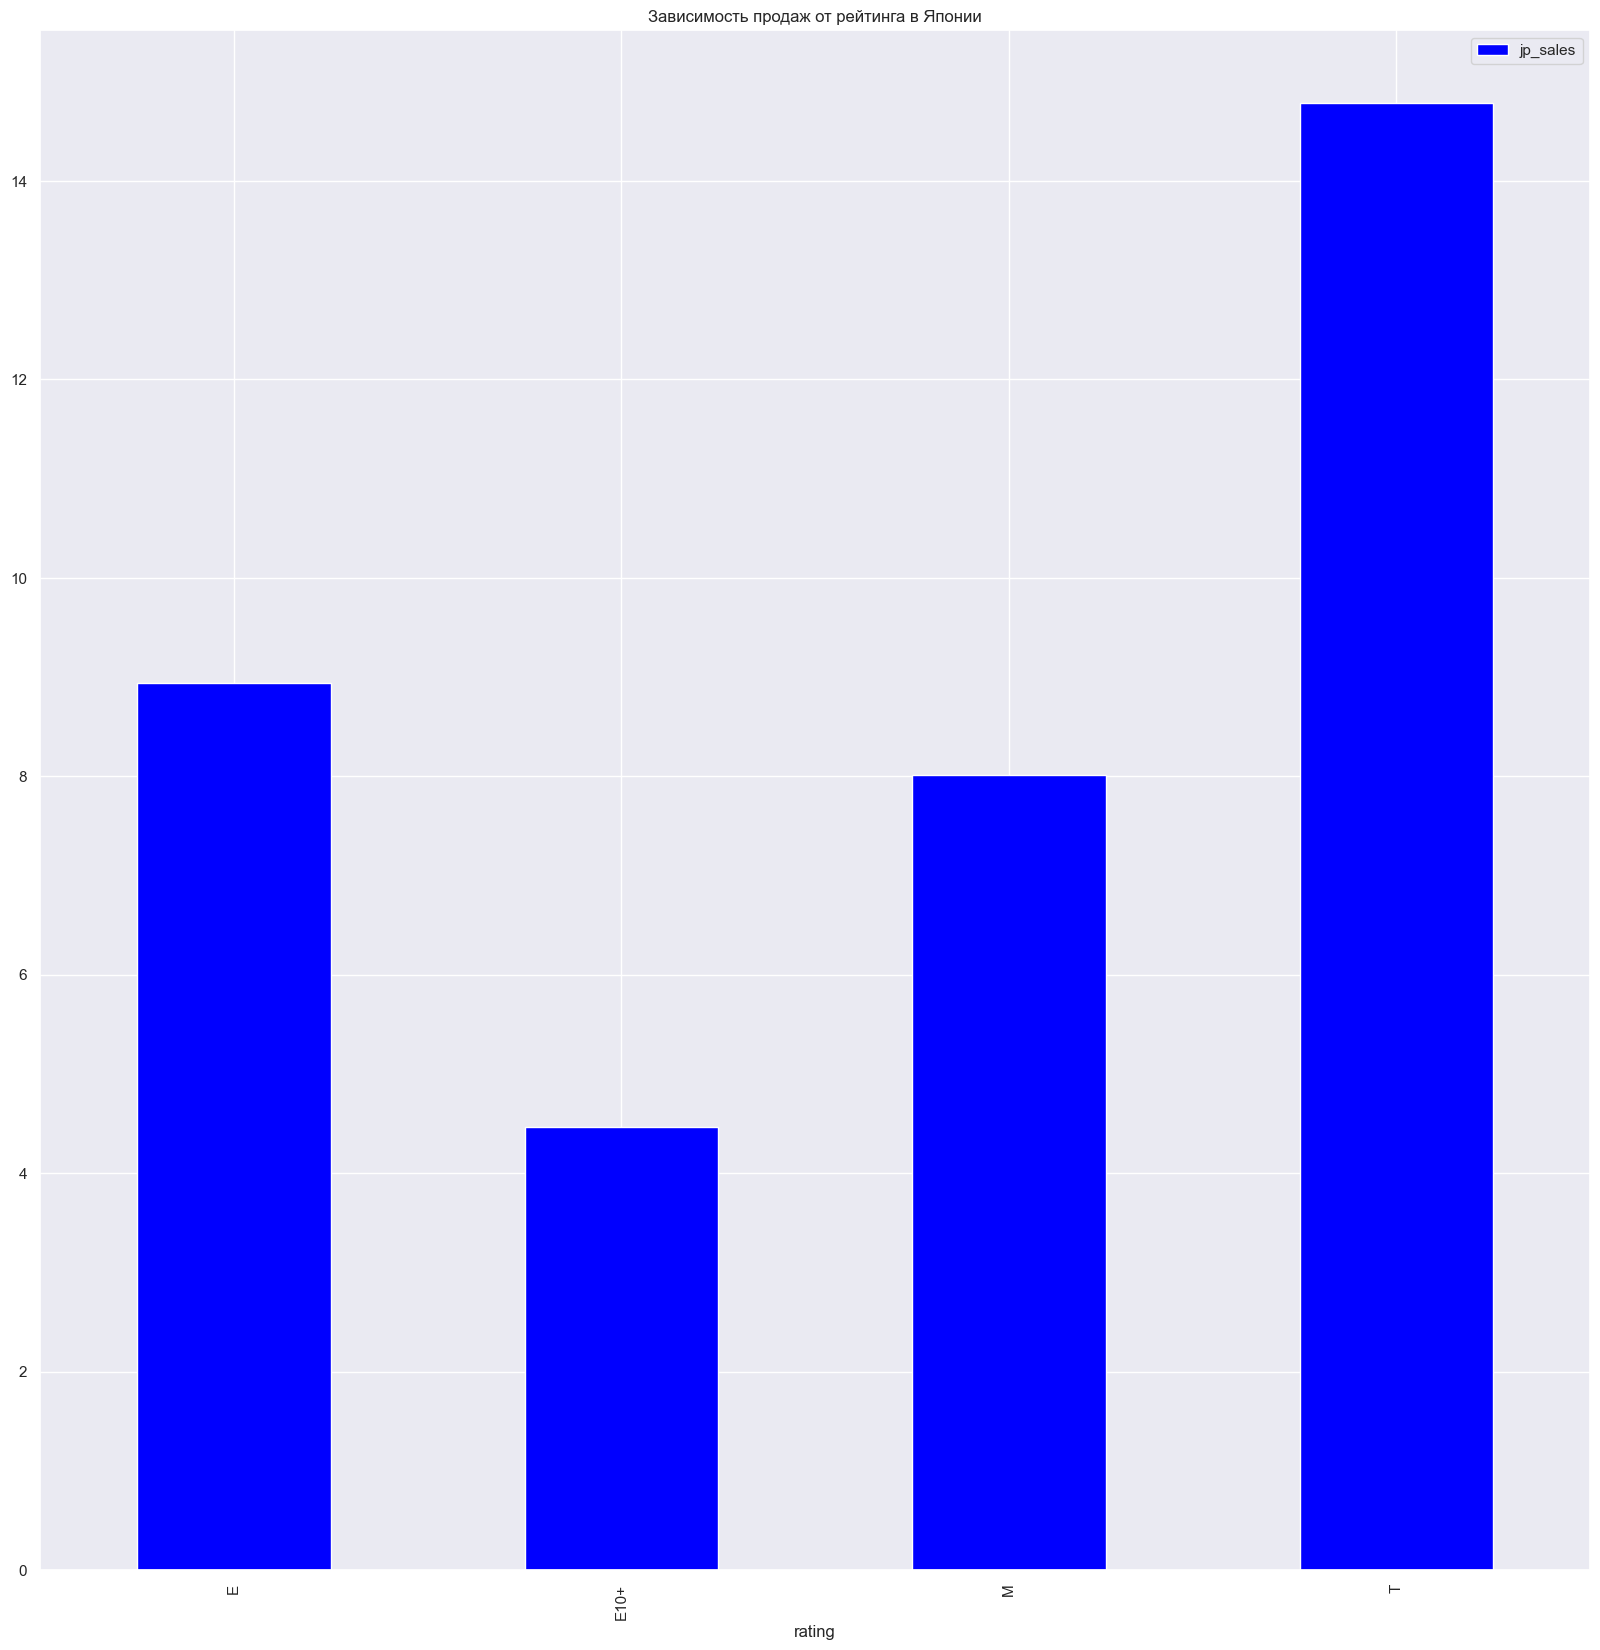

In [54]:
data_actual.groupby(['rating']).agg({'jp_sales':'sum'}).plot(kind='bar', color='blue', title='Зависимость продаж от рейтинга в Японии')

Игрок в Японии старше 13 лет, играет на 3DS, его любимые жанры ролевые игры и игры с драками.

### Проверка гипотез

In [55]:
from scipy import stats as st
import numpy as np

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данное утверждение это нулевая гипотеза. Средние пользовательские рейтинги не равны это альтернативная гипотеза.

In [56]:
#давайте зададим alpha как 0.03
pc = data_actual.query('platform == "PC"')
xbox_one = data_actual.query('platform == "XOne"')
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], equal_var=False, nan_policy='omit') # results = вызов метода для проверки гипотезы

alpha = 0.03 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') # условный оператор с выводом строки с ответом

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Данное утверждение это нулевая гипотеза. Средние пользовательские рейтинги этих жанров равны это альтернативная гипотеза.

In [57]:
#давайте зададим alpha как 0.03
action = data.query('genre == "Action"')
sports = data.query('genre == "Sports"')
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit') # results = вызов метода для проверки гипотезы

alpha = 0.01 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') # условный оператор с выводом строки с ответом

p-значение: 0.07370217419279251
Не получилось отвергнуть нулевую гипотезу


In [58]:
#давайте зададим alpha как 0.03
action = data.query('genre == "Action"')
sports = data.query('genre == "Sports"')
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit') # results = вызов метода для проверки гипотезы

alpha = 0.01 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') # условный оператор с выводом строки с ответом

p-значение: 0.07370217419279251
Не получилось отвергнуть нулевую гипотезу


Вывод: в обоих гипотезах была отвергнута нулевая гипотеза. Пользовательские рейтинги платформ Xbox One и PC неодинаковые. Пользовательские рейтинги жанров Sport и Action одинаковые.

Общий вывод: были изучены данные, далее была проведена предобработка данных, типы данных были заменены, где нужно, столбцы были приведены к нижнему регистру, создан новый столбец для суммы всех продаж, далее был начат анализ данных, проанализированы популярные и непопулярные жанры игр, распредедение по годам, в качестве актуального периода был взят период в три года, далее были опредедены топ 3 платформ по продажам и они были проанализированы. Также были проанализированы пользователи разных регионов, Северной Америки, Японии и Европы. В конце была проведена проверка гипотез.